# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [15]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-01-19 11:06:47,891 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-01-19 11:06:47,894 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-01-19 11:06:47,896 - INFO - 	Setting export engine to 'sqlite'.
2023-01-19 11:06:47,912 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-01-19 11:06:47,913 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-01-19 11:06:47,916 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-01-19 11:06:47,917 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-01-19 11:06:47,920 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-01-19 11:06:47,922 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-01-19 11:06:47,940 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [12]:
#sisepuede.attribute_strategy.table


In [17]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-01-19 11:30:47,077 - INFO - Running AFOLU model
2023-01-19 11:30:47,341 - INFO - AFOLU model run successfully completed
2023-01-19 11:30:47,342 - INFO - Running CircularEconomy model
2023-01-19 11:30:47,440 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:30:47,440 - INFO - Running IPPU model
2023-01-19 11:30:47,543 - INFO - IPPU model run successfully completed
2023-01-19 11:30:47,544 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:30:47,581 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:30:47,741 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:30:47,742 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-19-Jan 11:30:48.875 Started modeling scenario.
2023-19-Jan 11:30:59.628 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:30:59,885 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:30:59,889 - INFO - Model run for primary_id = 22022 successfully completed in 12.81 seconds.
2023-01-19 11:30:59,893 - INFO - Running AFOLU model
2023-01-19 11:31:00,183 - INFO - AFOLU model run successfully completed
2023-01-19 11:31:00,183 - INFO - Running CircularEconomy model
2023-01-19 11:31:00,277 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:31:00,278 - INFO - Running IPPU model
2023-01-19 11:31:00,380 - INFO - IPPU model run successfully completed
2023-01-19 11:31:00,381 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:31:00,419 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:31:00,560 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:31:00,561 - INFO - R

2023-19-Jan 11:31:01.738 Started modeling scenario.
2023-19-Jan 11:31:12.516 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:31:12,782 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:31:12,786 - INFO - Model run for primary_id = 23023 successfully completed in 12.89 seconds.
2023-01-19 11:31:13,181 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:31:13,185 - INFO - Running AFOLU model
2023-01-19 11:31:13,444 - INFO - AFOLU model run successfully completed
2023-01-19 11:31:13,445 - INFO - Running CircularEconomy model
2023-01-19 11:31:13,535 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:31:13,535 - INFO - Running IPPU model
2023-01-19 11:31:13,630 - INFO - IPPU model run successfully completed
2023-01-19 11:31:13,631 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:31:13,666 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:31:13,798 - INFO - NonElectricEnergy without

2023-19-Jan 11:31:14.826 Started modeling scenario.
2023-19-Jan 11:31:26.291 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:31:26,563 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:31:26,567 - INFO - Model run for primary_id = 24024 successfully completed in 13.38 seconds.
2023-01-19 11:31:26,572 - INFO - Running AFOLU model
2023-01-19 11:31:26,843 - INFO - AFOLU model run successfully completed
2023-01-19 11:31:26,844 - INFO - Running CircularEconomy model
2023-01-19 11:31:26,944 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:31:26,945 - INFO - Running IPPU model
2023-01-19 11:31:27,057 - INFO - IPPU model run successfully completed
2023-01-19 11:31:27,058 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:31:27,106 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:31:27,240 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:31:27,241 - INFO - R

2023-19-Jan 11:31:28.300 Started modeling scenario.
2023-19-Jan 11:31:38.176 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:31:38,436 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:31:38,439 - INFO - Model run for primary_id = 25025 successfully completed in 11.87 seconds.
2023-01-19 11:31:38,802 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:31:38,806 - INFO - Running AFOLU model
2023-01-19 11:31:39,073 - INFO - AFOLU model run successfully completed
2023-01-19 11:31:39,074 - INFO - Running CircularEconomy model
2023-01-19 11:31:39,165 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:31:39,166 - INFO - Running IPPU model
2023-01-19 11:31:39,261 - INFO - IPPU model run successfully completed
2023-01-19 11:31:39,261 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:31:39,296 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:31:39,420 - INFO - NonElectricEnergy without

2023-19-Jan 11:31:40.398 Started modeling scenario.
2023-19-Jan 11:31:50.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:31:50,387 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:31:50,391 - INFO - Model run for primary_id = 26026 successfully completed in 11.59 seconds.
2023-01-19 11:31:50,395 - INFO - Running AFOLU model
2023-01-19 11:31:50,663 - INFO - AFOLU model run successfully completed
2023-01-19 11:31:50,664 - INFO - Running CircularEconomy model
2023-01-19 11:31:50,739 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:31:50,739 - INFO - Running IPPU model
2023-01-19 11:31:50,830 - INFO - IPPU model run successfully completed
2023-01-19 11:31:50,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:31:50,864 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:31:50,987 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:31:50,988 - INFO - R

2023-19-Jan 11:31:51.970 Started modeling scenario.
2023-19-Jan 11:32:02.183 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:32:02,455 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:32:02,459 - INFO - Model run for primary_id = 27027 successfully completed in 12.06 seconds.
2023-01-19 11:32:02,847 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:32:02,852 - INFO - Running AFOLU model
2023-01-19 11:32:03,143 - INFO - AFOLU model run successfully completed
2023-01-19 11:32:03,145 - INFO - Running CircularEconomy model
2023-01-19 11:32:03,237 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:32:03,241 - INFO - Running IPPU model
2023-01-19 11:32:03,340 - INFO - IPPU model run successfully completed
2023-01-19 11:32:03,341 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:32:03,378 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:32:03,507 - INFO - NonElectricEnergy without

2023-19-Jan 11:32:04.553 Started modeling scenario.
2023-19-Jan 11:32:14.700 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:32:14,958 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:32:14,962 - INFO - Model run for primary_id = 28028 successfully completed in 12.11 seconds.
2023-01-19 11:32:14,968 - INFO - Running AFOLU model
2023-01-19 11:32:15,235 - INFO - AFOLU model run successfully completed
2023-01-19 11:32:15,235 - INFO - Running CircularEconomy model
2023-01-19 11:32:15,323 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:32:15,323 - INFO - Running IPPU model
2023-01-19 11:32:15,417 - INFO - IPPU model run successfully completed
2023-01-19 11:32:15,418 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:32:15,453 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:32:15,573 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:32:15,573 - INFO - R

2023-19-Jan 11:32:16.541 Started modeling scenario.
2023-19-Jan 11:32:25.962 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:32:26,234 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:32:26,237 - INFO - Model run for primary_id = 31031 successfully completed in 11.27 seconds.
2023-01-19 11:32:26,605 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:32:27,474 - INFO - Running AFOLU model
2023-01-19 11:32:27,743 - INFO - AFOLU model run successfully completed
2023-01-19 11:32:27,744 - INFO - Running CircularEconomy model
2023-01-19 11:32:27,834 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:32:27,835 - INFO - Running IPPU model
2023-01-19 11:32:27,930 - INFO - IPPU model run successfully completed
2023-01-19 11:32:27,931 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:32:27,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:32:28,105 - INFO - NonElectricEnergy without

2023-19-Jan 11:32:29.133 Started modeling scenario.
2023-19-Jan 11:32:53.521 Finished modeling scenario.


2023-01-19 11:32:53,767 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:32:53,850 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:32:53,855 - INFO - Model run for primary_id = 0 successfully completed in 26.38 seconds.
2023-01-19 11:32:53,867 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:32:54,155 - INFO - AFOLU model run successfully completed
2023-01-19 11:32:54,156 - INFO - Running CircularEconomy model
2023-01-19 11:32:54,241 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:32:54,241 - INFO - Running IPPU model
2023-01-19 11:32:54,338 - INFO - IPPU model run successfully completed
2023-01-19 11:32:54,340 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:32:54,377 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:32:54,514 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:32:54,514 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:32:55.903 Started modeling scenario.
2023-19-Jan 11:33:21.030 Finished modeling scenario.


2023-01-19 11:33:21,243 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 11:33:21,266 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:33:21,355 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:33:21,359 - INFO - Model run for primary_id = 5005 successfully completed in 27.49 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:33:21,791 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:33:21,803 - INFO - Running AFOLU model
2023-01-19 11:33:22,077 - INFO - AFOLU model run successfully completed
2023-01-19 11:33:22,078 - INFO - Running CircularEconomy model
2023-01-19 11:33:22,171 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:33:22,171 - INFO - Running IPPU model
2023-01-19 11:33:22,262 - INFO - IPPU model run successfully completed
2023-01-19 11:33:22,262 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:33:22,295 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:33:22,436 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:33:22,437 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:33:23.456 Started modeling scenario.
2023-19-Jan 11:33:44.080 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:33:44,346 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:33:44,349 - INFO - Model run for primary_id = 6006 successfully completed in 22.55 seconds.
2023-01-19 11:33:44,361 - INFO - Running AFOLU model
2023-01-19 11:33:44,645 - INFO - AFOLU model run successfully completed
2023-01-19 11:33:44,646 - INFO - Running CircularEconomy model
2023-01-19 11:33:44,730 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:33:44,731 - INFO - Running IPPU model
2023-01-19 11:33:44,821 - INFO - IPPU model run successfully completed
2023-01-19 11:33:44,822 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:33:44,856 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:33:44,985 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:33:44,985 - INFO - Ru

2023-19-Jan 11:33:46.043 Started modeling scenario.
2023-19-Jan 11:34:05.880 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:34:06,123 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:34:06,127 - INFO - Model run for primary_id = 7007 successfully completed in 21.77 seconds.
2023-01-19 11:34:06,488 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:34:06,492 - INFO - Running AFOLU model
2023-01-19 11:34:06,753 - INFO - AFOLU model run successfully completed
2023-01-19 11:34:06,753 - INFO - Running CircularEconomy model
2023-01-19 11:34:06,837 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:34:06,838 - INFO - Running IPPU model
2023-01-19 11:34:06,934 - INFO - IPPU model run successfully completed
2023-01-19 11:34:06,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:34:06,971 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:34:07,096 - INFO - NonElectricEnergy without 

2023-19-Jan 11:34:08.115 Started modeling scenario.
2023-19-Jan 11:34:32.714 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:34:33,016 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:34:33,021 - INFO - Model run for primary_id = 8008 successfully completed in 26.53 seconds.
2023-01-19 11:34:33,038 - INFO - Running AFOLU model
2023-01-19 11:34:33,314 - INFO - AFOLU model run successfully completed
2023-01-19 11:34:33,315 - INFO - Running CircularEconomy model
2023-01-19 11:34:33,403 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:34:33,404 - INFO - Running IPPU model
2023-01-19 11:34:33,499 - INFO - IPPU model run successfully completed
2023-01-19 11:34:33,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:34:33,536 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:34:33,666 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:34:33,667 - INFO - Ru

2023-19-Jan 11:34:34.733 Started modeling scenario.
2023-19-Jan 11:35:03.253 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:35:03,526 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:35:03,529 - INFO - Model run for primary_id = 9009 successfully completed in 30.49 seconds.
2023-01-19 11:35:03,920 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:35:03,925 - INFO - Running AFOLU model
2023-01-19 11:35:04,192 - INFO - AFOLU model run successfully completed
2023-01-19 11:35:04,193 - INFO - Running CircularEconomy model
2023-01-19 11:35:04,279 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:35:04,280 - INFO - Running IPPU model
2023-01-19 11:35:04,379 - INFO - IPPU model run successfully completed
2023-01-19 11:35:04,379 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:35:04,417 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:35:04,543 - INFO - NonElectricEnergy without 

2023-19-Jan 11:35:05.654 Started modeling scenario.
2023-19-Jan 11:35:30.236 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:35:30,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:35:30,495 - INFO - Model run for primary_id = 10010 successfully completed in 26.57 seconds.
2023-01-19 11:35:30,507 - INFO - Running AFOLU model
2023-01-19 11:35:30,795 - INFO - AFOLU model run successfully completed
2023-01-19 11:35:30,796 - INFO - Running CircularEconomy model
2023-01-19 11:35:30,883 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:35:30,884 - INFO - Running IPPU model
2023-01-19 11:35:30,973 - INFO - IPPU model run successfully completed
2023-01-19 11:35:30,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:35:31,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:35:31,143 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:35:31,143 - INFO - R

2023-19-Jan 11:35:32.128 Started modeling scenario.
2023-19-Jan 11:35:53.372 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:35:53,637 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:35:53,640 - INFO - Model run for primary_id = 11011 successfully completed in 23.13 seconds.
2023-01-19 11:35:54,023 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:35:54,028 - INFO - Running AFOLU model
2023-01-19 11:35:54,286 - INFO - AFOLU model run successfully completed
2023-01-19 11:35:54,287 - INFO - Running CircularEconomy model
2023-01-19 11:35:54,372 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:35:54,373 - INFO - Running IPPU model
2023-01-19 11:35:54,484 - INFO - IPPU model run successfully completed
2023-01-19 11:35:54,485 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:35:54,524 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:35:54,639 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 11:35:55,024 - INFO - AFOLU model run successfully completed
2023-01-19 11:35:55,026 - INFO - Running CircularEconomy model
2023-01-19 11:35:55,108 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:35:55,108 - INFO - Running IPPU model
2023-01-19 11:35:55,198 - INFO - IPPU model run successfully completed
2023-01-19 11:35:55,199 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:35:55,232 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:35:55,355 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:35:55,357 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:35:56.372 Started modeling scenario.
2023-19-Jan 11:36:17.009 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:36:17,267 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:36:17,270 - INFO - Model run for primary_id = 13013 successfully completed in 22.52 seconds.
2023-01-19 11:36:17,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:36:17,690 - INFO - Running AFOLU model
2023-01-19 11:36:17,950 - INFO - AFOLU model run successfully completed
2023-01-19 11:36:17,951 - INFO - Running CircularEconomy model
2023-01-19 11:36:18,048 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:36:18,049 - INFO - Running IPPU model
2023-01-19 11:36:18,150 - INFO - IPPU model run successfully completed
2023-01-19 11:36:18,151 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:36:18,188 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:36:18,314 - INFO - NonElectricEnergy without

2023-19-Jan 11:36:19.324 Started modeling scenario.
2023-19-Jan 11:36:40.261 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:36:40,510 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:36:40,514 - INFO - Model run for primary_id = 14014 successfully completed in 22.82 seconds.
2023-01-19 11:36:40,519 - INFO - Running AFOLU model
2023-01-19 11:36:40,777 - INFO - AFOLU model run successfully completed
2023-01-19 11:36:40,778 - INFO - Running CircularEconomy model
2023-01-19 11:36:40,859 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:36:40,859 - INFO - Running IPPU model
2023-01-19 11:36:40,951 - INFO - IPPU model run successfully completed
2023-01-19 11:36:40,952 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:36:40,986 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:36:41,104 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:36:41,105 - INFO - R

2023-19-Jan 11:36:42.114 Started modeling scenario.
2023-19-Jan 11:37:02.536 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:37:02,792 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:37:02,796 - INFO - Model run for primary_id = 15015 successfully completed in 22.28 seconds.
2023-01-19 11:37:03,179 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:37:03,184 - INFO - Running AFOLU model
2023-01-19 11:37:03,452 - INFO - AFOLU model run successfully completed
2023-01-19 11:37:03,453 - INFO - Running CircularEconomy model
2023-01-19 11:37:03,537 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:37:03,538 - INFO - Running IPPU model
2023-01-19 11:37:03,628 - INFO - IPPU model run successfully completed
2023-01-19 11:37:03,629 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:37:03,664 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:37:03,800 - INFO - NonElectricEnergy without

2023-19-Jan 11:37:04.830 Started modeling scenario.
2023-19-Jan 11:37:27.287 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:37:27,549 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:37:27,553 - INFO - Model run for primary_id = 16016 successfully completed in 24.37 seconds.
2023-01-19 11:37:27,557 - INFO - Running AFOLU model
2023-01-19 11:37:27,822 - INFO - AFOLU model run successfully completed
2023-01-19 11:37:27,823 - INFO - Running CircularEconomy model
2023-01-19 11:37:27,905 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:37:27,905 - INFO - Running IPPU model
2023-01-19 11:37:28,003 - INFO - IPPU model run successfully completed
2023-01-19 11:37:28,003 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:37:28,036 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:37:28,154 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:37:28,155 - INFO - R

2023-19-Jan 11:37:29.193 Started modeling scenario.
2023-19-Jan 11:37:52.859 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:37:53,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:37:53,125 - INFO - Model run for primary_id = 17017 successfully completed in 25.57 seconds.
2023-01-19 11:37:53,489 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:37:53,494 - INFO - Running AFOLU model
2023-01-19 11:37:53,745 - INFO - AFOLU model run successfully completed
2023-01-19 11:37:53,746 - INFO - Running CircularEconomy model
2023-01-19 11:37:53,828 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:37:53,828 - INFO - Running IPPU model
2023-01-19 11:37:53,935 - INFO - IPPU model run successfully completed
2023-01-19 11:37:53,936 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:37:53,987 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:37:54,142 - INFO - NonElectricEnergy without

2023-19-Jan 11:37:55.112 Started modeling scenario.
2023-19-Jan 11:38:17.287 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:38:17,551 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:38:17,554 - INFO - Model run for primary_id = 18018 successfully completed in 24.06 seconds.
2023-01-19 11:38:17,559 - INFO - Running AFOLU model
2023-01-19 11:38:17,825 - INFO - AFOLU model run successfully completed
2023-01-19 11:38:17,826 - INFO - Running CircularEconomy model
2023-01-19 11:38:17,906 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:38:17,906 - INFO - Running IPPU model
2023-01-19 11:38:17,999 - INFO - IPPU model run successfully completed
2023-01-19 11:38:17,999 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:38:18,033 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:38:18,175 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:38:18,176 - INFO - R

2023-19-Jan 11:38:19.187 Started modeling scenario.
2023-19-Jan 11:38:43.641 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:38:43,877 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:38:43,880 - INFO - Model run for primary_id = 19019 successfully completed in 26.32 seconds.
2023-01-19 11:38:44,262 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:38:44,271 - INFO - Running AFOLU model
2023-01-19 11:38:44,538 - INFO - AFOLU model run successfully completed
2023-01-19 11:38:44,540 - INFO - Running CircularEconomy model
2023-01-19 11:38:44,619 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:38:44,619 - INFO - Running IPPU model
2023-01-19 11:38:44,709 - INFO - IPPU model run successfully completed
2023-01-19 11:38:44,709 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:38:44,742 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:38:44,860 - INFO - NonElectricEnergy without

2023-19-Jan 11:38:55.158 Started modeling scenario.
2023-19-Jan 11:39:16.749 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:39:16,979 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:39:16,982 - INFO - Model run for primary_id = 20020 successfully completed in 32.71 seconds.
2023-01-19 11:39:16,991 - INFO - Running AFOLU model
2023-01-19 11:39:17,238 - INFO - AFOLU model run successfully completed
2023-01-19 11:39:17,239 - INFO - Running CircularEconomy model
2023-01-19 11:39:17,313 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:39:17,314 - INFO - Running IPPU model
2023-01-19 11:39:17,395 - INFO - IPPU model run successfully completed
2023-01-19 11:39:17,396 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:39:17,426 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:39:17,541 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:39:17,542 - INFO - R

2023-19-Jan 11:39:18.532 Started modeling scenario.
2023-19-Jan 11:39:45.231 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:39:45,488 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:39:45,491 - INFO - Model run for primary_id = 21021 successfully completed in 28.5 seconds.
2023-01-19 11:39:45,860 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:39:45,865 - INFO - Running AFOLU model
2023-01-19 11:39:46,110 - INFO - AFOLU model run successfully completed
2023-01-19 11:39:46,111 - INFO - Running CircularEconomy model
2023-01-19 11:39:46,190 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:39:46,191 - INFO - Running IPPU model
2023-01-19 11:39:46,288 - INFO - IPPU model run successfully completed
2023-01-19 11:39:46,288 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:39:46,324 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:39:46,463 - INFO - NonElectricEnergy without 

2023-19-Jan 11:39:47.506 Started modeling scenario.
2023-19-Jan 11:40:11.310 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:40:11,567 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:40:11,571 - INFO - Model run for primary_id = 22022 successfully completed in 25.71 seconds.
2023-01-19 11:40:11,579 - INFO - Running AFOLU model
2023-01-19 11:40:11,873 - INFO - AFOLU model run successfully completed
2023-01-19 11:40:11,874 - INFO - Running CircularEconomy model
2023-01-19 11:40:11,962 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:40:11,963 - INFO - Running IPPU model
2023-01-19 11:40:12,078 - INFO - IPPU model run successfully completed
2023-01-19 11:40:12,079 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:40:12,118 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:40:12,280 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:40:12,281 - INFO - R

2023-19-Jan 11:40:13.314 Started modeling scenario.
2023-19-Jan 11:40:37.215 Finished modeling scenario.


2023-01-19 11:40:37,508 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:40:37,512 - INFO - Model run for primary_id = 23023 successfully completed in 25.93 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:40:37,913 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:40:37,922 - INFO - Running AFOLU model
2023-01-19 11:40:38,184 - INFO - AFOLU model run successfully completed
2023-01-19 11:40:38,185 - INFO - Running CircularEconomy model
2023-01-19 11:40:38,265 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:40:38,266 - INFO - Running IPPU model
2023-01-19 11:40:38,351 - INFO - IPPU model run successfully completed
2023-01-19 11:40:38,351 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:40:38,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:40:38,497 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:40:38,498 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:40:39.521 Started modeling scenario.
2023-19-Jan 11:41:01.148 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:41:01,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:41:01,408 - INFO - Model run for primary_id = 24024 successfully completed in 23.49 seconds.
2023-01-19 11:41:01,417 - INFO - Running AFOLU model
2023-01-19 11:41:01,667 - INFO - AFOLU model run successfully completed
2023-01-19 11:41:01,668 - INFO - Running CircularEconomy model
2023-01-19 11:41:01,751 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:41:01,752 - INFO - Running IPPU model
2023-01-19 11:41:01,837 - INFO - IPPU model run successfully completed
2023-01-19 11:41:01,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:41:01,870 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:41:01,995 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:41:01,996 - INFO - R

2023-19-Jan 11:41:03.059 Started modeling scenario.
2023-19-Jan 11:41:24.952 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:41:25,201 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:41:25,203 - INFO - Model run for primary_id = 25025 successfully completed in 23.79 seconds.
2023-01-19 11:41:25,583 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:41:25,594 - INFO - Running AFOLU model
2023-01-19 11:41:25,837 - INFO - AFOLU model run successfully completed
2023-01-19 11:41:25,838 - INFO - Running CircularEconomy model
2023-01-19 11:41:25,910 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:41:25,910 - INFO - Running IPPU model
2023-01-19 11:41:25,994 - INFO - IPPU model run successfully completed
2023-01-19 11:41:25,994 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:41:26,037 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:41:26,185 - INFO - NonElectricEnergy without

2023-19-Jan 11:41:27.144 Started modeling scenario.
2023-19-Jan 11:41:50.738 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:41:50,992 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:41:50,995 - INFO - Model run for primary_id = 26026 successfully completed in 25.4 seconds.
2023-01-19 11:41:51,001 - INFO - Running AFOLU model
2023-01-19 11:41:51,250 - INFO - AFOLU model run successfully completed
2023-01-19 11:41:51,251 - INFO - Running CircularEconomy model
2023-01-19 11:41:51,336 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:41:51,337 - INFO - Running IPPU model
2023-01-19 11:41:51,429 - INFO - IPPU model run successfully completed
2023-01-19 11:41:51,430 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:41:51,469 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:41:51,620 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:41:51,620 - INFO - Ru

2023-19-Jan 11:41:52.636 Started modeling scenario.
2023-19-Jan 11:42:13.112 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:42:13,355 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:42:13,360 - INFO - Model run for primary_id = 27027 successfully completed in 22.36 seconds.
2023-01-19 11:42:13,741 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:42:13,745 - INFO - Running AFOLU model
2023-01-19 11:42:13,988 - INFO - AFOLU model run successfully completed
2023-01-19 11:42:13,989 - INFO - Running CircularEconomy model
2023-01-19 11:42:14,078 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:42:14,078 - INFO - Running IPPU model
2023-01-19 11:42:14,161 - INFO - IPPU model run successfully completed
2023-01-19 11:42:14,162 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:42:14,191 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:42:14,311 - INFO - NonElectricEnergy without

2023-19-Jan 11:42:15.313 Started modeling scenario.
2023-19-Jan 11:42:43.812 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:42:44,060 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:42:44,063 - INFO - Model run for primary_id = 28028 successfully completed in 30.32 seconds.
2023-01-19 11:42:44,070 - INFO - Running AFOLU model
2023-01-19 11:42:44,313 - INFO - AFOLU model run successfully completed
2023-01-19 11:42:44,313 - INFO - Running CircularEconomy model
2023-01-19 11:42:44,389 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:42:44,390 - INFO - Running IPPU model
2023-01-19 11:42:44,483 - INFO - IPPU model run successfully completed
2023-01-19 11:42:44,483 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:42:44,515 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:42:44,627 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:42:44,628 - INFO - R

2023-19-Jan 11:42:45.654 Started modeling scenario.
2023-19-Jan 11:43:16.226 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:43:16,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:43:16,495 - INFO - Model run for primary_id = 31031 successfully completed in 32.42 seconds.
2023-01-19 11:43:16,895 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:43:17,676 - INFO - Running AFOLU model
2023-01-19 11:43:17,977 - INFO - AFOLU model run successfully completed
2023-01-19 11:43:17,977 - INFO - Running CircularEconomy model
2023-01-19 11:43:18,073 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:43:18,074 - INFO - Running IPPU model
2023-01-19 11:43:18,163 - INFO - IPPU model run successfully completed
2023-01-19 11:43:18,164 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:43:18,196 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:43:18,315 - INFO - NonElectricEnergy without

2023-19-Jan 11:43:19.306 Started modeling scenario.
2023-19-Jan 11:43:44.648 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 11:43:44,925 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 11:43:44,977 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:43:45,060 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:43:45,066 - INFO - Model run for primary_id = 0 successfully completed in 27.39 seconds.
2023-01-19 11:43:45,089 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:43:45,411 - INFO - AFOLU model run successfully completed
2023-01-19 11:43:45,411 - INFO - Running CircularEconomy model
2023-01-19 11:43:45,501 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:43:45,502 - INFO - Running IPPU model
2023-01-19 11:43:45,601 - INFO - IPPU model run successfully completed
2023-01-19 11:43:45,602 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:43:45,638 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:43:45,784 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:43:45,785 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 11:43:46.957 Started modeling scenario.
2023-19-Jan 11:44:15.812 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 11:44:16,139 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 11:44:16,165 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:44:16,270 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:44:16,276 - INFO - Model run for primary_id = 5005 successfully completed in 31.19 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:44:16,983 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:44:16,991 - INFO - Running AFOLU model
2023-01-19 11:44:17,394 - INFO - AFOLU model run successfully completed
2023-01-19 11:44:17,395 - INFO - Running CircularEconomy model
2023-01-19 11:44:17,518 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:44:17,519 - INFO - Running IPPU model
2023-01-19 11:44:17,650 - INFO - IPPU model run successfully completed
2023-01-19 11:44:17,651 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:44:17,701 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:44:17,882 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:44:17,883 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:44:19.945 Started modeling scenario.
2023-19-Jan 11:44:40.882 Finished modeling scenario.


2023-01-19 11:44:41,091 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:44:41,167 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:44:41,171 - INFO - Model run for primary_id = 6006 successfully completed in 24.18 seconds.
2023-01-19 11:44:41,175 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:44:41,487 - INFO - AFOLU model run successfully completed
2023-01-19 11:44:41,488 - INFO - Running CircularEconomy model
2023-01-19 11:44:41,576 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:44:41,577 - INFO - Running IPPU model
2023-01-19 11:44:41,671 - INFO - IPPU model run successfully completed
2023-01-19 11:44:41,671 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:44:41,707 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:44:41,843 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:44:41,844 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:44:42.980 Started modeling scenario.
2023-19-Jan 11:45:04.084 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:45:04,362 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:45:04,365 - INFO - Model run for primary_id = 7007 successfully completed in 23.19 seconds.
2023-01-19 11:45:04,842 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:45:04,854 - INFO - Running AFOLU model
2023-01-19 11:45:05,130 - INFO - AFOLU model run successfully completed
2023-01-19 11:45:05,130 - INFO - Running CircularEconomy model
2023-01-19 11:45:05,221 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:45:05,222 - INFO - Running IPPU model
2023-01-19 11:45:05,314 - INFO - IPPU model run successfully completed
2023-01-19 11:45:05,315 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:45:05,353 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:45:05,486 - INFO - NonElectricEnergy without 

2023-19-Jan 11:45:06.565 Started modeling scenario.
2023-19-Jan 11:45:26.741 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:45:26,991 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:45:26,994 - INFO - Model run for primary_id = 8008 successfully completed in 22.14 seconds.
2023-01-19 11:45:27,005 - INFO - Running AFOLU model
2023-01-19 11:45:27,282 - INFO - AFOLU model run successfully completed
2023-01-19 11:45:27,283 - INFO - Running CircularEconomy model
2023-01-19 11:45:27,370 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:45:27,371 - INFO - Running IPPU model
2023-01-19 11:45:27,461 - INFO - IPPU model run successfully completed
2023-01-19 11:45:27,461 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:45:27,497 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:45:27,629 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:45:27,630 - INFO - Ru

2023-19-Jan 11:45:28.722 Started modeling scenario.
2023-19-Jan 11:45:51.661 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:45:51,914 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:45:51,918 - INFO - Model run for primary_id = 9009 successfully completed in 24.91 seconds.
2023-01-19 11:45:52,336 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:45:52,340 - INFO - Running AFOLU model
2023-01-19 11:45:52,641 - INFO - AFOLU model run successfully completed
2023-01-19 11:45:52,642 - INFO - Running CircularEconomy model
2023-01-19 11:45:52,730 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:45:52,730 - INFO - Running IPPU model
2023-01-19 11:45:52,833 - INFO - IPPU model run successfully completed
2023-01-19 11:45:52,834 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:45:52,869 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:45:53,006 - INFO - NonElectricEnergy without 

2023-19-Jan 11:45:54.072 Started modeling scenario.
2023-19-Jan 11:46:15.170 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:46:15,437 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:46:15,441 - INFO - Model run for primary_id = 10010 successfully completed in 23.1 seconds.
2023-01-19 11:46:15,445 - INFO - Running AFOLU model
2023-01-19 11:46:15,726 - INFO - AFOLU model run successfully completed
2023-01-19 11:46:15,727 - INFO - Running CircularEconomy model
2023-01-19 11:46:15,812 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:46:15,812 - INFO - Running IPPU model
2023-01-19 11:46:15,907 - INFO - IPPU model run successfully completed
2023-01-19 11:46:15,908 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:46:15,942 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:46:16,069 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:46:16,070 - INFO - Ru

2023-19-Jan 11:46:17.132 Started modeling scenario.
2023-19-Jan 11:46:38.159 Finished modeling scenario.


2023-01-19 11:46:38,373 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:46:38,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:46:38,456 - INFO - Model run for primary_id = 11011 successfully completed in 23.01 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:46:38,900 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:46:38,904 - INFO - Running AFOLU model
2023-01-19 11:46:39,200 - INFO - AFOLU model run successfully completed
2023-01-19 11:46:39,201 - INFO - Running CircularEconomy model
2023-01-19 11:46:39,297 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:46:39,298 - INFO - Running IPPU model
2023-01-19 11:46:39,394 - INFO - IPPU model run successfully completed
2023-01-19 11:46:39,395 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:46:39,430 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:46:39,535 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-19 


	Running Energy (Fugitive Emissions)


2023-01-19 11:46:39,931 - INFO - AFOLU model run successfully completed
2023-01-19 11:46:39,932 - INFO - Running CircularEconomy model
2023-01-19 11:46:40,018 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:46:40,019 - INFO - Running IPPU model
2023-01-19 11:46:40,117 - INFO - IPPU model run successfully completed
2023-01-19 11:46:40,117 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:46:40,154 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:46:40,289 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:46:40,290 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:46:41.363 Started modeling scenario.
2023-19-Jan 11:47:03.018 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:47:03,288 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:47:03,292 - INFO - Model run for primary_id = 13013 successfully completed in 23.66 seconds.
2023-01-19 11:47:03,764 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:47:03,769 - INFO - Running AFOLU model
2023-01-19 11:47:04,030 - INFO - AFOLU model run successfully completed
2023-01-19 11:47:04,031 - INFO - Running CircularEconomy model
2023-01-19 11:47:04,124 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:47:04,124 - INFO - Running IPPU model
2023-01-19 11:47:04,217 - INFO - IPPU model run successfully completed
2023-01-19 11:47:04,218 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:47:04,257 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:47:04,387 - INFO - NonElectricEnergy without

2023-19-Jan 11:47:05.458 Started modeling scenario.
2023-19-Jan 11:47:28.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:47:28,576 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:47:28,579 - INFO - Model run for primary_id = 14014 successfully completed in 24.81 seconds.
2023-01-19 11:47:28,584 - INFO - Running AFOLU model
2023-01-19 11:47:28,854 - INFO - AFOLU model run successfully completed
2023-01-19 11:47:28,855 - INFO - Running CircularEconomy model
2023-01-19 11:47:28,939 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:47:28,940 - INFO - Running IPPU model
2023-01-19 11:47:29,034 - INFO - IPPU model run successfully completed
2023-01-19 11:47:29,035 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:47:29,077 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:47:29,205 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:47:29,205 - INFO - R

2023-19-Jan 11:47:30.266 Started modeling scenario.
2023-19-Jan 11:47:52.108 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:47:52,372 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:47:52,376 - INFO - Model run for primary_id = 15015 successfully completed in 23.79 seconds.
2023-01-19 11:47:52,800 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:47:52,810 - INFO - Running AFOLU model
2023-01-19 11:47:53,088 - INFO - AFOLU model run successfully completed
2023-01-19 11:47:53,089 - INFO - Running CircularEconomy model
2023-01-19 11:47:53,172 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:47:53,172 - INFO - Running IPPU model
2023-01-19 11:47:53,269 - INFO - IPPU model run successfully completed
2023-01-19 11:47:53,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:47:53,304 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:47:53,427 - INFO - NonElectricEnergy without

2023-19-Jan 11:47:54.516 Started modeling scenario.
2023-19-Jan 11:48:15.008 Finished modeling scenario.


2023-01-19 11:48:15,282 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:48:15,285 - INFO - Model run for primary_id = 16016 successfully completed in 22.48 seconds.
2023-01-19 11:48:15,289 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:48:15,580 - INFO - AFOLU model run successfully completed
2023-01-19 11:48:15,581 - INFO - Running CircularEconomy model
2023-01-19 11:48:15,675 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:48:15,675 - INFO - Running IPPU model
2023-01-19 11:48:15,773 - INFO - IPPU model run successfully completed
2023-01-19 11:48:15,774 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:48:15,812 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:48:15,950 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:48:15,951 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:48:17.248 Started modeling scenario.
2023-19-Jan 11:48:38.873 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:48:39,148 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:48:39,151 - INFO - Model run for primary_id = 17017 successfully completed in 23.86 seconds.
2023-01-19 11:48:39,562 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:48:39,574 - INFO - Running AFOLU model
2023-01-19 11:48:39,836 - INFO - AFOLU model run successfully completed
2023-01-19 11:48:39,837 - INFO - Running CircularEconomy model
2023-01-19 11:48:39,917 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:48:39,917 - INFO - Running IPPU model
2023-01-19 11:48:40,007 - INFO - IPPU model run successfully completed
2023-01-19 11:48:40,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:48:40,042 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:48:40,168 - INFO - NonElectricEnergy without

2023-19-Jan 11:48:41.255 Started modeling scenario.
2023-19-Jan 11:49:05.344 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:49:05,615 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:49:05,618 - INFO - Model run for primary_id = 18018 successfully completed in 26.04 seconds.
2023-01-19 11:49:05,624 - INFO - Running AFOLU model
2023-01-19 11:49:05,904 - INFO - AFOLU model run successfully completed
2023-01-19 11:49:05,905 - INFO - Running CircularEconomy model
2023-01-19 11:49:05,990 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:49:05,991 - INFO - Running IPPU model
2023-01-19 11:49:06,082 - INFO - IPPU model run successfully completed
2023-01-19 11:49:06,083 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:49:06,115 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:49:06,245 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:49:06,246 - INFO - R

2023-19-Jan 11:49:07.309 Started modeling scenario.
2023-19-Jan 11:49:26.579 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:49:26,845 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:49:26,848 - INFO - Model run for primary_id = 19019 successfully completed in 21.22 seconds.
2023-01-19 11:49:27,227 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:49:27,231 - INFO - Running AFOLU model
2023-01-19 11:49:27,509 - INFO - AFOLU model run successfully completed
2023-01-19 11:49:27,510 - INFO - Running CircularEconomy model
2023-01-19 11:49:27,598 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:49:27,598 - INFO - Running IPPU model
2023-01-19 11:49:27,697 - INFO - IPPU model run successfully completed
2023-01-19 11:49:27,697 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:49:27,732 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:49:27,960 - INFO - NonElectricEnergy without

2023-19-Jan 11:49:29.049 Started modeling scenario.
2023-19-Jan 11:49:50.624 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:49:50,883 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:49:50,885 - INFO - Model run for primary_id = 20020 successfully completed in 23.65 seconds.
2023-01-19 11:49:50,897 - INFO - Running AFOLU model
2023-01-19 11:49:51,164 - INFO - AFOLU model run successfully completed
2023-01-19 11:49:51,165 - INFO - Running CircularEconomy model
2023-01-19 11:49:51,251 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:49:51,253 - INFO - Running IPPU model
2023-01-19 11:49:51,346 - INFO - IPPU model run successfully completed
2023-01-19 11:49:51,346 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:49:51,382 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:49:51,512 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:49:51,513 - INFO - R

2023-19-Jan 11:49:52.581 Started modeling scenario.
2023-19-Jan 11:50:12.949 Finished modeling scenario.


2023-01-19 11:50:13,161 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:50:13,233 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:50:13,236 - INFO - Model run for primary_id = 21021 successfully completed in 22.34 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:50:13,632 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:50:13,637 - INFO - Running AFOLU model
2023-01-19 11:50:13,895 - INFO - AFOLU model run successfully completed
2023-01-19 11:50:13,896 - INFO - Running CircularEconomy model
2023-01-19 11:50:13,976 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:50:13,977 - INFO - Running IPPU model
2023-01-19 11:50:14,078 - INFO - IPPU model run successfully completed
2023-01-19 11:50:14,079 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:50:14,113 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:50:14,239 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:50:14,240 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:50:15.289 Started modeling scenario.
2023-19-Jan 11:50:38.095 Finished modeling scenario.


2023-01-19 11:50:38,302 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:50:38,374 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:50:38,377 - INFO - Model run for primary_id = 22022 successfully completed in 24.74 seconds.
2023-01-19 11:50:38,382 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:50:38,660 - INFO - AFOLU model run successfully completed
2023-01-19 11:50:38,661 - INFO - Running CircularEconomy model
2023-01-19 11:50:38,746 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:50:38,746 - INFO - Running IPPU model
2023-01-19 11:50:38,853 - INFO - IPPU model run successfully completed
2023-01-19 11:50:38,853 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:50:38,895 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:50:39,062 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:50:39,063 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:50:40.118 Started modeling scenario.
2023-19-Jan 11:50:59.265 Finished modeling scenario.


2023-01-19 11:50:59,471 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:50:59,550 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:50:59,554 - INFO - Model run for primary_id = 23023 successfully completed in 21.17 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:50:59,988 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:50:59,993 - INFO - Running AFOLU model
2023-01-19 11:51:00,288 - INFO - AFOLU model run successfully completed
2023-01-19 11:51:00,289 - INFO - Running CircularEconomy model
2023-01-19 11:51:00,381 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:51:00,382 - INFO - Running IPPU model
2023-01-19 11:51:00,480 - INFO - IPPU model run successfully completed
2023-01-19 11:51:00,482 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:51:00,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:51:00,658 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:51:00,659 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:51:01.710 Started modeling scenario.
2023-19-Jan 11:51:22.701 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:51:22,963 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:51:22,966 - INFO - Model run for primary_id = 24024 successfully completed in 22.97 seconds.
2023-01-19 11:51:22,971 - INFO - Running AFOLU model
2023-01-19 11:51:23,257 - INFO - AFOLU model run successfully completed
2023-01-19 11:51:23,258 - INFO - Running CircularEconomy model
2023-01-19 11:51:23,342 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:51:23,343 - INFO - Running IPPU model
2023-01-19 11:51:23,436 - INFO - IPPU model run successfully completed
2023-01-19 11:51:23,436 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:51:23,468 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:51:23,597 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:51:23,597 - INFO - R

2023-19-Jan 11:51:24.668 Started modeling scenario.
2023-19-Jan 11:51:45.136 Finished modeling scenario.


2023-01-19 11:51:45,342 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:51:45,412 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:51:45,415 - INFO - Model run for primary_id = 25025 successfully completed in 22.44 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:51:45,824 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:51:45,829 - INFO - Running AFOLU model
2023-01-19 11:51:46,096 - INFO - AFOLU model run successfully completed
2023-01-19 11:51:46,097 - INFO - Running CircularEconomy model
2023-01-19 11:51:46,191 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:51:46,192 - INFO - Running IPPU model
2023-01-19 11:51:46,293 - INFO - IPPU model run successfully completed
2023-01-19 11:51:46,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:51:46,327 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:51:46,457 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:51:46,457 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:51:47.578 Started modeling scenario.
2023-19-Jan 11:52:06.464 Finished modeling scenario.


2023-01-19 11:52:06,686 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:52:06,761 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:52:06,765 - INFO - Model run for primary_id = 26026 successfully completed in 20.94 seconds.
2023-01-19 11:52:06,769 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:52:07,060 - INFO - AFOLU model run successfully completed
2023-01-19 11:52:07,061 - INFO - Running CircularEconomy model
2023-01-19 11:52:07,150 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:52:07,151 - INFO - Running IPPU model
2023-01-19 11:52:07,246 - INFO - IPPU model run successfully completed
2023-01-19 11:52:07,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:52:07,283 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:52:07,421 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:52:07,423 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:52:08.546 Started modeling scenario.
2023-19-Jan 11:52:29.287 Finished modeling scenario.


2023-01-19 11:52:29,488 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:52:29,564 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:52:29,568 - INFO - Model run for primary_id = 27027 successfully completed in 22.8 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:52:29,974 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:52:29,979 - INFO - Running AFOLU model
2023-01-19 11:52:30,252 - INFO - AFOLU model run successfully completed
2023-01-19 11:52:30,253 - INFO - Running CircularEconomy model
2023-01-19 11:52:30,339 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:52:30,341 - INFO - Running IPPU model
2023-01-19 11:52:30,439 - INFO - IPPU model run successfully completed
2023-01-19 11:52:30,440 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:52:30,477 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:52:30,608 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:52:30,609 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:52:31.681 Started modeling scenario.
2023-19-Jan 11:52:55.396 Finished modeling scenario.


2023-01-19 11:52:55,598 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:52:55,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:52:55,679 - INFO - Model run for primary_id = 28028 successfully completed in 25.7 seconds.
2023-01-19 11:52:55,688 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:52:55,994 - INFO - AFOLU model run successfully completed
2023-01-19 11:52:55,994 - INFO - Running CircularEconomy model
2023-01-19 11:52:56,089 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:52:56,089 - INFO - Running IPPU model
2023-01-19 11:52:56,181 - INFO - IPPU model run successfully completed
2023-01-19 11:52:56,182 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:52:56,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:52:56,341 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:52:56,342 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:52:57.402 Started modeling scenario.
2023-19-Jan 11:53:17.754 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:53:18,027 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:53:18,030 - INFO - Model run for primary_id = 31031 successfully completed in 22.34 seconds.
2023-01-19 11:53:18,461 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:53:19,308 - INFO - Running AFOLU model
2023-01-19 11:53:19,624 - INFO - AFOLU model run successfully completed
2023-01-19 11:53:19,625 - INFO - Running CircularEconomy model
2023-01-19 11:53:19,728 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:53:19,728 - INFO - Running IPPU model
2023-01-19 11:53:19,835 - INFO - IPPU model run successfully completed
2023-01-19 11:53:19,836 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:53:19,875 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:53:20,020 - INFO - NonElectricEnergy without

2023-19-Jan 11:53:21.172 Started modeling scenario.
2023-19-Jan 11:53:40.198 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:53:40,460 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:53:40,463 - INFO - Model run for primary_id = 0 successfully completed in 21.16 seconds.
2023-01-19 11:53:40,469 - INFO - Running AFOLU model
2023-01-19 11:53:40,740 - INFO - AFOLU model run successfully completed
2023-01-19 11:53:40,740 - INFO - Running CircularEconomy model
2023-01-19 11:53:40,825 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:53:40,825 - INFO - Running IPPU model
2023-01-19 11:53:40,920 - INFO - IPPU model run successfully completed
2023-01-19 11:53:40,920 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:53:40,955 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:53:41,082 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:53:41,083 - INFO - Runni

2023-19-Jan 11:53:42.139 Started modeling scenario.
2023-19-Jan 11:54:00.350 Finished modeling scenario.


2023-01-19 11:54:00,626 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:54:00,630 - INFO - Model run for primary_id = 5005 successfully completed in 20.16 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:54:01,044 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:54:01,048 - INFO - Running AFOLU model
2023-01-19 11:54:01,322 - INFO - AFOLU model run successfully completed
2023-01-19 11:54:01,322 - INFO - Running CircularEconomy model
2023-01-19 11:54:01,418 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:54:01,419 - INFO - Running IPPU model
2023-01-19 11:54:01,518 - INFO - IPPU model run successfully completed
2023-01-19 11:54:01,519 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:54:01,553 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:54:01,681 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:54:01,682 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:54:02.806 Started modeling scenario.
2023-19-Jan 11:54:21.342 Finished modeling scenario.


2023-01-19 11:54:21,551 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:54:21,630 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:54:21,634 - INFO - Model run for primary_id = 6006 successfully completed in 20.59 seconds.
2023-01-19 11:54:21,638 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:54:21,932 - INFO - AFOLU model run successfully completed
2023-01-19 11:54:21,933 - INFO - Running CircularEconomy model
2023-01-19 11:54:22,024 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:54:22,025 - INFO - Running IPPU model
2023-01-19 11:54:22,122 - INFO - IPPU model run successfully completed
2023-01-19 11:54:22,123 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:54:22,159 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:54:22,289 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:54:22,290 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:54:23.429 Started modeling scenario.
2023-19-Jan 11:54:41.899 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:54:42,165 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:54:42,169 - INFO - Model run for primary_id = 7007 successfully completed in 20.53 seconds.
2023-01-19 11:54:42,572 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:54:42,576 - INFO - Running AFOLU model
2023-01-19 11:54:42,888 - INFO - AFOLU model run successfully completed
2023-01-19 11:54:42,889 - INFO - Running CircularEconomy model
2023-01-19 11:54:42,984 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:54:42,985 - INFO - Running IPPU model
2023-01-19 11:54:43,082 - INFO - IPPU model run successfully completed
2023-01-19 11:54:43,083 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:54:43,115 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:54:43,245 - INFO - NonElectricEnergy without 

2023-19-Jan 11:54:44.300 Started modeling scenario.
2023-19-Jan 11:55:03.703 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:55:03,961 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:55:03,964 - INFO - Model run for primary_id = 8008 successfully completed in 21.39 seconds.
2023-01-19 11:55:03,970 - INFO - Running AFOLU model
2023-01-19 11:55:04,260 - INFO - AFOLU model run successfully completed
2023-01-19 11:55:04,261 - INFO - Running CircularEconomy model
2023-01-19 11:55:04,346 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:55:04,347 - INFO - Running IPPU model
2023-01-19 11:55:04,447 - INFO - IPPU model run successfully completed
2023-01-19 11:55:04,448 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:55:04,485 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:55:04,625 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:55:04,625 - INFO - Ru

2023-19-Jan 11:55:05.692 Started modeling scenario.
2023-19-Jan 11:55:26.647 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:55:26,893 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:55:26,896 - INFO - Model run for primary_id = 9009 successfully completed in 22.93 seconds.
2023-01-19 11:55:27,292 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:55:27,296 - INFO - Running AFOLU model
2023-01-19 11:55:27,578 - INFO - AFOLU model run successfully completed
2023-01-19 11:55:27,578 - INFO - Running CircularEconomy model
2023-01-19 11:55:27,665 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:55:27,666 - INFO - Running IPPU model
2023-01-19 11:55:27,765 - INFO - IPPU model run successfully completed
2023-01-19 11:55:27,766 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:55:27,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:55:27,931 - INFO - NonElectricEnergy without 

2023-19-Jan 11:55:29.025 Started modeling scenario.
2023-19-Jan 11:55:46.975 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:55:47,235 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:55:47,238 - INFO - Model run for primary_id = 10010 successfully completed in 19.94 seconds.
2023-01-19 11:55:47,242 - INFO - Running AFOLU model
2023-01-19 11:55:47,520 - INFO - AFOLU model run successfully completed
2023-01-19 11:55:47,521 - INFO - Running CircularEconomy model
2023-01-19 11:55:47,606 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:55:47,606 - INFO - Running IPPU model
2023-01-19 11:55:47,698 - INFO - IPPU model run successfully completed
2023-01-19 11:55:47,699 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:55:47,732 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:55:47,864 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:55:47,865 - INFO - R

2023-19-Jan 11:55:48.975 Started modeling scenario.
2023-19-Jan 11:56:08.075 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:56:08,339 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:56:08,342 - INFO - Model run for primary_id = 11011 successfully completed in 21.1 seconds.
2023-01-19 11:56:08,739 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:56:08,745 - INFO - Running AFOLU model
2023-01-19 11:56:09,023 - INFO - AFOLU model run successfully completed
2023-01-19 11:56:09,024 - INFO - Running CircularEconomy model
2023-01-19 11:56:09,120 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:56:09,120 - INFO - Running IPPU model
2023-01-19 11:56:09,220 - INFO - IPPU model run successfully completed
2023-01-19 11:56:09,220 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:56:09,256 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:56:09,358 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-19 11:56:09,745 - INFO - AFOLU model run successfully completed
2023-01-19 11:56:09,746 - INFO - Running CircularEconomy model
2023-01-19 11:56:09,834 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:56:09,835 - INFO - Running IPPU model
2023-01-19 11:56:09,927 - INFO - IPPU model run successfully completed
2023-01-19 11:56:09,928 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:56:09,963 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:56:10,091 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:56:10,091 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:56:19.914 Started modeling scenario.
2023-19-Jan 11:56:40.885 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:56:41,139 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:56:41,142 - INFO - Model run for primary_id = 13013 successfully completed in 31.69 seconds.
2023-01-19 11:56:41,603 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:56:41,609 - INFO - Running AFOLU model
2023-01-19 11:56:41,866 - INFO - AFOLU model run successfully completed
2023-01-19 11:56:41,867 - INFO - Running CircularEconomy model
2023-01-19 11:56:41,945 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:56:41,946 - INFO - Running IPPU model
2023-01-19 11:56:42,041 - INFO - IPPU model run successfully completed
2023-01-19 11:56:42,041 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:56:42,075 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:56:42,201 - INFO - NonElectricEnergy without

2023-19-Jan 11:56:43.292 Started modeling scenario.
2023-19-Jan 11:57:03.113 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:57:03,383 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:57:03,386 - INFO - Model run for primary_id = 14014 successfully completed in 21.78 seconds.
2023-01-19 11:57:03,393 - INFO - Running AFOLU model
2023-01-19 11:57:03,683 - INFO - AFOLU model run successfully completed
2023-01-19 11:57:03,684 - INFO - Running CircularEconomy model
2023-01-19 11:57:03,773 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:57:03,773 - INFO - Running IPPU model
2023-01-19 11:57:03,882 - INFO - IPPU model run successfully completed
2023-01-19 11:57:03,883 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:57:03,923 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:57:04,088 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:57:04,089 - INFO - R

2023-19-Jan 11:57:05.168 Started modeling scenario.
2023-19-Jan 11:57:23.857 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:57:24,120 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:57:24,123 - INFO - Model run for primary_id = 15015 successfully completed in 20.73 seconds.
2023-01-19 11:57:24,524 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:57:24,529 - INFO - Running AFOLU model
2023-01-19 11:57:24,793 - INFO - AFOLU model run successfully completed
2023-01-19 11:57:24,794 - INFO - Running CircularEconomy model
2023-01-19 11:57:24,875 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:57:24,876 - INFO - Running IPPU model
2023-01-19 11:57:24,963 - INFO - IPPU model run successfully completed
2023-01-19 11:57:24,964 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:57:24,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:57:25,123 - INFO - NonElectricEnergy without

2023-19-Jan 11:57:26.184 Started modeling scenario.
2023-19-Jan 11:57:45.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:57:46,206 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:57:46,210 - INFO - Model run for primary_id = 16016 successfully completed in 21.68 seconds.
2023-01-19 11:57:46,214 - INFO - Running AFOLU model
2023-01-19 11:57:46,495 - INFO - AFOLU model run successfully completed
2023-01-19 11:57:46,496 - INFO - Running CircularEconomy model
2023-01-19 11:57:46,580 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:57:46,581 - INFO - Running IPPU model
2023-01-19 11:57:46,670 - INFO - IPPU model run successfully completed
2023-01-19 11:57:46,671 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:57:46,702 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:57:46,828 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:57:46,829 - INFO - R

2023-19-Jan 11:57:47.919 Started modeling scenario.
2023-19-Jan 11:58:09.411 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:58:09,678 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:58:09,681 - INFO - Model run for primary_id = 17017 successfully completed in 23.47 seconds.
2023-01-19 11:58:10,095 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:58:10,104 - INFO - Running AFOLU model
2023-01-19 11:58:10,381 - INFO - AFOLU model run successfully completed
2023-01-19 11:58:10,382 - INFO - Running CircularEconomy model
2023-01-19 11:58:10,467 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:58:10,468 - INFO - Running IPPU model
2023-01-19 11:58:10,561 - INFO - IPPU model run successfully completed
2023-01-19 11:58:10,562 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:58:10,597 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:58:10,728 - INFO - NonElectricEnergy without

2023-19-Jan 11:58:11.841 Started modeling scenario.
2023-19-Jan 11:58:30.063 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 11:58:30,335 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:58:30,339 - INFO - Model run for primary_id = 18018 successfully completed in 20.23 seconds.
2023-01-19 11:58:30,350 - INFO - Running AFOLU model
2023-01-19 11:58:30,627 - INFO - AFOLU model run successfully completed
2023-01-19 11:58:30,627 - INFO - Running CircularEconomy model
2023-01-19 11:58:30,713 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:58:30,713 - INFO - Running IPPU model
2023-01-19 11:58:30,804 - INFO - IPPU model run successfully completed
2023-01-19 11:58:30,804 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:58:30,840 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:58:30,972 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:58:30,972 - INFO - R

2023-19-Jan 11:58:32.112 Started modeling scenario.
2023-19-Jan 11:58:53.406 Finished modeling scenario.


2023-01-19 11:58:53,685 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:58:53,689 - INFO - Model run for primary_id = 19019 successfully completed in 23.34 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:58:54,124 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:58:54,129 - INFO - Running AFOLU model
2023-01-19 11:58:54,449 - INFO - AFOLU model run successfully completed
2023-01-19 11:58:54,450 - INFO - Running CircularEconomy model
2023-01-19 11:58:54,558 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:58:54,559 - INFO - Running IPPU model
2023-01-19 11:58:54,656 - INFO - IPPU model run successfully completed
2023-01-19 11:58:54,657 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:58:54,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:58:54,826 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:58:54,826 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:58:55.957 Started modeling scenario.
2023-19-Jan 11:59:15.590 Finished modeling scenario.


2023-01-19 11:59:15,793 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:59:15,867 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:59:15,871 - INFO - Model run for primary_id = 20020 successfully completed in 21.74 seconds.
2023-01-19 11:59:15,885 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 11:59:16,169 - INFO - AFOLU model run successfully completed
2023-01-19 11:59:16,170 - INFO - Running CircularEconomy model
2023-01-19 11:59:16,254 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:59:16,255 - INFO - Running IPPU model
2023-01-19 11:59:16,349 - INFO - IPPU model run successfully completed
2023-01-19 11:59:16,350 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:59:16,384 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:59:16,512 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:59:16,513 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 11:59:17.665 Started modeling scenario.
2023-19-Jan 11:59:39.298 Finished modeling scenario.


2023-01-19 11:59:39,505 - INFO - ElectricEnergy model run successfully completed
2023-01-19 11:59:39,582 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 11:59:39,586 - INFO - Model run for primary_id = 21021 successfully completed in 23.7 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 11:59:40,028 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 11:59:40,033 - INFO - Running AFOLU model
2023-01-19 11:59:40,314 - INFO - AFOLU model run successfully completed
2023-01-19 11:59:40,314 - INFO - Running CircularEconomy model
2023-01-19 11:59:40,421 - INFO - CircularEconomy model run successfully completed
2023-01-19 11:59:40,422 - INFO - Running IPPU model
2023-01-19 11:59:40,535 - INFO - IPPU model run successfully completed
2023-01-19 11:59:40,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 11:59:40,577 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 11:59:40,713 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 11:59:40,714 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 11:59:41.795 Started modeling scenario.
2023-19-Jan 12:00:01.067 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:00:01,334 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:00:01,339 - INFO - Model run for primary_id = 22022 successfully completed in 21.31 seconds.
2023-01-19 12:00:01,344 - INFO - Running AFOLU model
2023-01-19 12:00:01,621 - INFO - AFOLU model run successfully completed
2023-01-19 12:00:01,621 - INFO - Running CircularEconomy model
2023-01-19 12:00:01,704 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:00:01,705 - INFO - Running IPPU model
2023-01-19 12:00:01,797 - INFO - IPPU model run successfully completed
2023-01-19 12:00:01,798 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:00:01,833 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:00:01,962 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:00:01,963 - INFO - R

2023-19-Jan 12:00:03.044 Started modeling scenario.
2023-19-Jan 12:00:24.149 Finished modeling scenario.


2023-01-19 12:00:24,426 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:00:24,430 - INFO - Model run for primary_id = 23023 successfully completed in 23.09 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:00:24,862 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:00:24,873 - INFO - Running AFOLU model
2023-01-19 12:00:25,183 - INFO - AFOLU model run successfully completed
2023-01-19 12:00:25,184 - INFO - Running CircularEconomy model
2023-01-19 12:00:25,298 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:00:25,299 - INFO - Running IPPU model
2023-01-19 12:00:25,400 - INFO - IPPU model run successfully completed
2023-01-19 12:00:25,401 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:00:25,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:00:25,578 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:00:25,579 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:00:26.700 Started modeling scenario.
2023-19-Jan 12:00:46.443 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:00:46,711 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:00:46,714 - INFO - Model run for primary_id = 24024 successfully completed in 21.84 seconds.
2023-01-19 12:00:46,719 - INFO - Running AFOLU model
2023-01-19 12:00:46,995 - INFO - AFOLU model run successfully completed
2023-01-19 12:00:46,996 - INFO - Running CircularEconomy model
2023-01-19 12:00:47,094 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:00:47,095 - INFO - Running IPPU model
2023-01-19 12:00:47,233 - INFO - IPPU model run successfully completed
2023-01-19 12:00:47,236 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:00:47,289 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:00:47,429 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:00:47,430 - INFO - R

2023-19-Jan 12:00:48.575 Started modeling scenario.
2023-19-Jan 12:01:08.096 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:01:08,366 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:01:08,370 - INFO - Model run for primary_id = 25025 successfully completed in 21.65 seconds.
2023-01-19 12:01:08,794 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:01:08,798 - INFO - Running AFOLU model
2023-01-19 12:01:09,056 - INFO - AFOLU model run successfully completed
2023-01-19 12:01:09,057 - INFO - Running CircularEconomy model
2023-01-19 12:01:09,152 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:01:09,153 - INFO - Running IPPU model
2023-01-19 12:01:09,253 - INFO - IPPU model run successfully completed
2023-01-19 12:01:09,253 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:01:09,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:01:09,418 - INFO - NonElectricEnergy without

2023-19-Jan 12:01:10.533 Started modeling scenario.
2023-19-Jan 12:01:30.122 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:01:30,398 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:01:30,401 - INFO - Model run for primary_id = 26026 successfully completed in 21.6 seconds.
2023-01-19 12:01:30,406 - INFO - Running AFOLU model
2023-01-19 12:01:30,700 - INFO - AFOLU model run successfully completed
2023-01-19 12:01:30,701 - INFO - Running CircularEconomy model
2023-01-19 12:01:30,786 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:01:30,787 - INFO - Running IPPU model
2023-01-19 12:01:30,879 - INFO - IPPU model run successfully completed
2023-01-19 12:01:30,880 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:01:30,914 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:01:31,041 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:01:31,042 - INFO - Ru

2023-19-Jan 12:01:32.086 Started modeling scenario.
2023-19-Jan 12:01:53.154 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:01:53,429 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:01:53,432 - INFO - Model run for primary_id = 27027 successfully completed in 23.03 seconds.
2023-01-19 12:01:53,875 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:01:53,880 - INFO - Running AFOLU model
2023-01-19 12:01:54,181 - INFO - AFOLU model run successfully completed
2023-01-19 12:01:54,182 - INFO - Running CircularEconomy model
2023-01-19 12:01:54,281 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:01:54,282 - INFO - Running IPPU model
2023-01-19 12:01:54,375 - INFO - IPPU model run successfully completed
2023-01-19 12:01:54,376 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:01:54,410 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:01:54,538 - INFO - NonElectricEnergy without

2023-19-Jan 12:01:55.623 Started modeling scenario.
2023-19-Jan 12:02:14.745 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:02:15,004 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:02:15,007 - INFO - Model run for primary_id = 28028 successfully completed in 21.13 seconds.
2023-01-19 12:02:15,013 - INFO - Running AFOLU model
2023-01-19 12:02:15,285 - INFO - AFOLU model run successfully completed
2023-01-19 12:02:15,286 - INFO - Running CircularEconomy model
2023-01-19 12:02:15,371 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:02:15,371 - INFO - Running IPPU model
2023-01-19 12:02:15,462 - INFO - IPPU model run successfully completed
2023-01-19 12:02:15,462 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:02:15,496 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:02:15,630 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:02:15,631 - INFO - R

2023-19-Jan 12:02:16.751 Started modeling scenario.
2023-19-Jan 12:02:38.637 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:02:38,909 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:02:38,912 - INFO - Model run for primary_id = 31031 successfully completed in 23.9 seconds.
2023-01-19 12:02:39,342 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:02:40,330 - INFO - Running AFOLU model
2023-01-19 12:02:40,610 - INFO - AFOLU model run successfully completed
2023-01-19 12:02:40,611 - INFO - Running CircularEconomy model
2023-01-19 12:02:40,708 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:02:40,709 - INFO - Running IPPU model
2023-01-19 12:02:40,808 - INFO - IPPU model run successfully completed
2023-01-19 12:02:40,810 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:02:40,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:02:40,996 - INFO - NonElectricEnergy without 

2023-19-Jan 12:02:42.188 Started modeling scenario.
2023-19-Jan 12:03:03.059 Finished modeling scenario.


2023-01-19 12:03:03,283 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:03:03,359 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:03:03,363 - INFO - Model run for primary_id = 0 successfully completed in 23.03 seconds.
2023-01-19 12:03:03,369 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 12:03:03,659 - INFO - AFOLU model run successfully completed
2023-01-19 12:03:03,660 - INFO - Running CircularEconomy model
2023-01-19 12:03:03,753 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:03:03,754 - INFO - Running IPPU model
2023-01-19 12:03:03,863 - INFO - IPPU model run successfully completed
2023-01-19 12:03:03,863 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:03:03,903 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:03:04,055 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:03:04,056 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:03:05.119 Started modeling scenario.
2023-19-Jan 12:03:26.347 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:03:26,616 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:03:26,619 - INFO - Model run for primary_id = 5005 successfully completed in 23.25 seconds.
2023-01-19 12:03:27,033 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:03:27,037 - INFO - Running AFOLU model
2023-01-19 12:03:27,309 - INFO - AFOLU model run successfully completed
2023-01-19 12:03:27,310 - INFO - Running CircularEconomy model
2023-01-19 12:03:27,396 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:03:27,396 - INFO - Running IPPU model
2023-01-19 12:03:27,494 - INFO - IPPU model run successfully completed
2023-01-19 12:03:27,494 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:03:27,528 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:03:27,653 - INFO - NonElectricEnergy without 

2023-19-Jan 12:03:28.729 Started modeling scenario.
2023-19-Jan 12:03:50.237 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:03:50,502 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:03:50,505 - INFO - Model run for primary_id = 6006 successfully completed in 23.47 seconds.
2023-01-19 12:03:50,509 - INFO - Running AFOLU model
2023-01-19 12:03:50,787 - INFO - AFOLU model run successfully completed
2023-01-19 12:03:50,788 - INFO - Running CircularEconomy model
2023-01-19 12:03:50,870 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:03:50,870 - INFO - Running IPPU model
2023-01-19 12:03:50,960 - INFO - IPPU model run successfully completed
2023-01-19 12:03:50,960 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:03:50,993 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:03:51,119 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:03:51,120 - INFO - Ru

2023-19-Jan 12:03:52.188 Started modeling scenario.
2023-19-Jan 12:04:14.895 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:04:15,149 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:04:15,153 - INFO - Model run for primary_id = 7007 successfully completed in 24.64 seconds.
2023-01-19 12:04:15,555 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:04:15,560 - INFO - Running AFOLU model
2023-01-19 12:04:15,815 - INFO - AFOLU model run successfully completed
2023-01-19 12:04:15,815 - INFO - Running CircularEconomy model
2023-01-19 12:04:15,892 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:04:15,893 - INFO - Running IPPU model
2023-01-19 12:04:15,981 - INFO - IPPU model run successfully completed
2023-01-19 12:04:15,982 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:04:16,016 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:04:16,140 - INFO - NonElectricEnergy without 

2023-19-Jan 12:04:17.202 Started modeling scenario.
2023-19-Jan 12:04:38.429 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:04:38,694 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:04:38,698 - INFO - Model run for primary_id = 8008 successfully completed in 23.14 seconds.
2023-01-19 12:04:38,702 - INFO - Running AFOLU model
2023-01-19 12:04:38,981 - INFO - AFOLU model run successfully completed
2023-01-19 12:04:38,982 - INFO - Running CircularEconomy model
2023-01-19 12:04:39,074 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:04:39,074 - INFO - Running IPPU model
2023-01-19 12:04:39,168 - INFO - IPPU model run successfully completed
2023-01-19 12:04:39,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:04:39,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:04:39,329 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:04:39,330 - INFO - Ru

2023-19-Jan 12:04:40.392 Started modeling scenario.
2023-19-Jan 12:05:01.278 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:05:01,557 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:05:01,560 - INFO - Model run for primary_id = 9009 successfully completed in 22.86 seconds.
2023-01-19 12:05:01,976 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:05:01,980 - INFO - Running AFOLU model
2023-01-19 12:05:02,294 - INFO - AFOLU model run successfully completed
2023-01-19 12:05:02,295 - INFO - Running CircularEconomy model
2023-01-19 12:05:02,402 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:05:02,403 - INFO - Running IPPU model
2023-01-19 12:05:02,501 - INFO - IPPU model run successfully completed
2023-01-19 12:05:02,503 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:05:02,543 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:05:02,688 - INFO - NonElectricEnergy without 

2023-19-Jan 12:05:03.809 Started modeling scenario.
2023-19-Jan 12:05:24.895 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:05:25,170 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:05:25,174 - INFO - Model run for primary_id = 10010 successfully completed in 23.19 seconds.
2023-01-19 12:05:25,178 - INFO - Running AFOLU model
2023-01-19 12:05:25,459 - INFO - AFOLU model run successfully completed
2023-01-19 12:05:25,460 - INFO - Running CircularEconomy model
2023-01-19 12:05:25,546 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:05:25,547 - INFO - Running IPPU model
2023-01-19 12:05:25,637 - INFO - IPPU model run successfully completed
2023-01-19 12:05:25,638 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:05:25,671 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:05:25,798 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:05:25,799 - INFO - R

2023-19-Jan 12:05:26.930 Started modeling scenario.
2023-19-Jan 12:05:48.441 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:05:48,704 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:05:48,707 - INFO - Model run for primary_id = 11011 successfully completed in 23.53 seconds.
2023-01-19 12:05:49,130 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:05:49,135 - INFO - Running AFOLU model
2023-01-19 12:05:49,408 - INFO - AFOLU model run successfully completed
2023-01-19 12:05:49,409 - INFO - Running CircularEconomy model
2023-01-19 12:05:49,494 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:05:49,495 - INFO - Running IPPU model
2023-01-19 12:05:49,592 - INFO - IPPU model run successfully completed
2023-01-19 12:05:49,593 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:05:49,626 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:05:49,726 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:05:50,112 - INFO - AFOLU model run successfully completed
2023-01-19 12:05:50,114 - INFO - Running CircularEconomy model
2023-01-19 12:05:50,203 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:05:50,204 - INFO - Running IPPU model
2023-01-19 12:05:50,296 - INFO - IPPU model run successfully completed
2023-01-19 12:05:50,297 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:05:50,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:05:50,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:05:50,464 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:05:51.514 Started modeling scenario.
2023-19-Jan 12:06:15.014 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:06:15,278 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:06:15,281 - INFO - Model run for primary_id = 13013 successfully completed in 25.46 seconds.
2023-01-19 12:06:15,748 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:06:15,752 - INFO - Running AFOLU model
2023-01-19 12:06:16,021 - INFO - AFOLU model run successfully completed
2023-01-19 12:06:16,021 - INFO - Running CircularEconomy model
2023-01-19 12:06:16,109 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:06:16,110 - INFO - Running IPPU model
2023-01-19 12:06:16,203 - INFO - IPPU model run successfully completed
2023-01-19 12:06:16,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:06:16,238 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:06:16,364 - INFO - NonElectricEnergy without

2023-19-Jan 12:06:17.453 Started modeling scenario.
2023-19-Jan 12:06:40.719 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:06:40,980 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:06:40,984 - INFO - Model run for primary_id = 14014 successfully completed in 25.23 seconds.
2023-01-19 12:06:40,992 - INFO - Running AFOLU model
2023-01-19 12:06:41,272 - INFO - AFOLU model run successfully completed
2023-01-19 12:06:41,273 - INFO - Running CircularEconomy model
2023-01-19 12:06:41,358 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:06:41,359 - INFO - Running IPPU model
2023-01-19 12:06:41,448 - INFO - IPPU model run successfully completed
2023-01-19 12:06:41,449 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:06:41,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:06:41,609 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:06:41,610 - INFO - R

2023-19-Jan 12:06:42.677 Started modeling scenario.
2023-19-Jan 12:07:04.431 Finished modeling scenario.


2023-01-19 12:07:04,710 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:07:04,714 - INFO - Model run for primary_id = 15015 successfully completed in 23.72 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:07:05,125 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:07:05,137 - INFO - Running AFOLU model
2023-01-19 12:07:05,463 - INFO - AFOLU model run successfully completed
2023-01-19 12:07:05,464 - INFO - Running CircularEconomy model
2023-01-19 12:07:05,571 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:07:05,572 - INFO - Running IPPU model
2023-01-19 12:07:05,676 - INFO - IPPU model run successfully completed
2023-01-19 12:07:05,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:07:05,720 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:07:05,850 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:07:05,851 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:07:06.932 Started modeling scenario.
2023-19-Jan 12:07:27.426 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:07:27,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:07:27,705 - INFO - Model run for primary_id = 16016 successfully completed in 22.57 seconds.
2023-01-19 12:07:27,709 - INFO - Running AFOLU model
2023-01-19 12:07:28,023 - INFO - AFOLU model run successfully completed
2023-01-19 12:07:28,024 - INFO - Running CircularEconomy model
2023-01-19 12:07:28,122 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:07:28,123 - INFO - Running IPPU model
2023-01-19 12:07:28,225 - INFO - IPPU model run successfully completed
2023-01-19 12:07:28,226 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:07:28,263 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:07:28,402 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:07:28,403 - INFO - R

2023-19-Jan 12:07:29.518 Started modeling scenario.
2023-19-Jan 12:07:51.302 Finished modeling scenario.


2023-01-19 12:07:51,505 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:07:51,577 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:07:51,580 - INFO - Model run for primary_id = 17017 successfully completed in 23.87 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:07:51,977 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:07:51,982 - INFO - Running AFOLU model
2023-01-19 12:07:52,259 - INFO - AFOLU model run successfully completed
2023-01-19 12:07:52,260 - INFO - Running CircularEconomy model
2023-01-19 12:07:52,351 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:07:52,352 - INFO - Running IPPU model
2023-01-19 12:07:52,460 - INFO - IPPU model run successfully completed
2023-01-19 12:07:52,461 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:07:52,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:07:52,638 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:07:52,639 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:07:53.736 Started modeling scenario.
2023-19-Jan 12:08:16.906 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:08:17,169 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:08:17,172 - INFO - Model run for primary_id = 18018 successfully completed in 25.19 seconds.
2023-01-19 12:08:17,177 - INFO - Running AFOLU model
2023-01-19 12:08:17,457 - INFO - AFOLU model run successfully completed
2023-01-19 12:08:17,458 - INFO - Running CircularEconomy model
2023-01-19 12:08:17,551 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:08:17,552 - INFO - Running IPPU model
2023-01-19 12:08:17,649 - INFO - IPPU model run successfully completed
2023-01-19 12:08:17,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:08:17,683 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:08:17,811 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:08:17,811 - INFO - R

2023-19-Jan 12:08:18.897 Started modeling scenario.
2023-19-Jan 12:08:39.928 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:08:40,185 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:08:40,189 - INFO - Model run for primary_id = 19019 successfully completed in 23.01 seconds.
2023-01-19 12:08:40,572 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:08:40,577 - INFO - Running AFOLU model
2023-01-19 12:08:40,841 - INFO - AFOLU model run successfully completed
2023-01-19 12:08:40,842 - INFO - Running CircularEconomy model
2023-01-19 12:08:40,921 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:08:40,921 - INFO - Running IPPU model
2023-01-19 12:08:41,005 - INFO - IPPU model run successfully completed
2023-01-19 12:08:41,006 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:08:41,038 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:08:41,163 - INFO - NonElectricEnergy without

2023-19-Jan 12:08:42.216 Started modeling scenario.
2023-19-Jan 12:09:04.679 Finished modeling scenario.


2023-01-19 12:09:04,953 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:09:04,957 - INFO - Model run for primary_id = 20020 successfully completed in 24.38 seconds.
2023-01-19 12:09:04,961 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 12:09:05,246 - INFO - AFOLU model run successfully completed
2023-01-19 12:09:05,246 - INFO - Running CircularEconomy model
2023-01-19 12:09:05,332 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:09:05,333 - INFO - Running IPPU model
2023-01-19 12:09:05,424 - INFO - IPPU model run successfully completed
2023-01-19 12:09:05,424 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:09:05,458 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:09:05,585 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:09:05,586 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:09:06.710 Started modeling scenario.
2023-19-Jan 12:09:27.755 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:09:28,031 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:09:28,036 - INFO - Model run for primary_id = 21021 successfully completed in 23.07 seconds.
2023-01-19 12:09:28,446 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:09:28,451 - INFO - Running AFOLU model
2023-01-19 12:09:28,728 - INFO - AFOLU model run successfully completed
2023-01-19 12:09:28,729 - INFO - Running CircularEconomy model
2023-01-19 12:09:28,820 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:09:28,821 - INFO - Running IPPU model
2023-01-19 12:09:28,919 - INFO - IPPU model run successfully completed
2023-01-19 12:09:28,920 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:09:28,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:09:29,094 - INFO - NonElectricEnergy without

2023-19-Jan 12:09:30.203 Started modeling scenario.
2023-19-Jan 12:09:51.902 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:09:52,168 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:09:52,172 - INFO - Model run for primary_id = 22022 successfully completed in 23.72 seconds.
2023-01-19 12:09:52,176 - INFO - Running AFOLU model
2023-01-19 12:09:52,453 - INFO - AFOLU model run successfully completed
2023-01-19 12:09:52,453 - INFO - Running CircularEconomy model
2023-01-19 12:09:52,542 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:09:52,542 - INFO - Running IPPU model
2023-01-19 12:09:52,637 - INFO - IPPU model run successfully completed
2023-01-19 12:09:52,637 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:09:52,675 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:09:52,810 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:09:52,811 - INFO - R

2023-19-Jan 12:09:53.889 Started modeling scenario.
2023-19-Jan 12:10:14.026 Finished modeling scenario.


2023-01-19 12:10:14,237 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:10:14,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:10:14,316 - INFO - Model run for primary_id = 23023 successfully completed in 22.14 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:10:14,716 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:10:14,724 - INFO - Running AFOLU model
2023-01-19 12:10:14,977 - INFO - AFOLU model run successfully completed
2023-01-19 12:10:14,977 - INFO - Running CircularEconomy model
2023-01-19 12:10:15,062 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:10:15,063 - INFO - Running IPPU model
2023-01-19 12:10:15,163 - INFO - IPPU model run successfully completed
2023-01-19 12:10:15,164 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:10:15,199 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:10:15,329 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:10:15,330 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:10:16.452 Started modeling scenario.
2023-19-Jan 12:10:38.044 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:10:38,308 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:10:38,312 - INFO - Model run for primary_id = 24024 successfully completed in 23.59 seconds.
2023-01-19 12:10:38,316 - INFO - Running AFOLU model
2023-01-19 12:10:38,598 - INFO - AFOLU model run successfully completed
2023-01-19 12:10:38,599 - INFO - Running CircularEconomy model
2023-01-19 12:10:38,685 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:10:38,686 - INFO - Running IPPU model
2023-01-19 12:10:38,778 - INFO - IPPU model run successfully completed
2023-01-19 12:10:38,779 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:10:38,813 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:10:38,938 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:10:38,939 - INFO - R

2023-19-Jan 12:10:39.983 Started modeling scenario.
2023-19-Jan 12:11:00.894 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:11:01,159 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:11:01,162 - INFO - Model run for primary_id = 25025 successfully completed in 22.85 seconds.
2023-01-19 12:11:01,570 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:11:01,578 - INFO - Running AFOLU model
2023-01-19 12:11:01,836 - INFO - AFOLU model run successfully completed
2023-01-19 12:11:01,837 - INFO - Running CircularEconomy model
2023-01-19 12:11:01,916 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:11:01,916 - INFO - Running IPPU model
2023-01-19 12:11:02,006 - INFO - IPPU model run successfully completed
2023-01-19 12:11:02,007 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:11:02,042 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:11:02,172 - INFO - NonElectricEnergy without

2023-19-Jan 12:11:03.240 Started modeling scenario.
2023-19-Jan 12:11:21.653 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:11:21,904 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:11:21,907 - INFO - Model run for primary_id = 26026 successfully completed in 20.33 seconds.
2023-01-19 12:11:21,911 - INFO - Running AFOLU model
2023-01-19 12:11:22,183 - INFO - AFOLU model run successfully completed
2023-01-19 12:11:22,185 - INFO - Running CircularEconomy model
2023-01-19 12:11:22,270 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:11:22,270 - INFO - Running IPPU model
2023-01-19 12:11:22,364 - INFO - IPPU model run successfully completed
2023-01-19 12:11:22,365 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:11:22,398 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:11:22,540 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:11:22,541 - INFO - R

2023-19-Jan 12:11:23.623 Started modeling scenario.
2023-19-Jan 12:11:43.599 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:11:43,852 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:11:43,855 - INFO - Model run for primary_id = 27027 successfully completed in 21.94 seconds.
2023-01-19 12:11:44,250 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:11:44,257 - INFO - Running AFOLU model
2023-01-19 12:11:44,539 - INFO - AFOLU model run successfully completed
2023-01-19 12:11:44,540 - INFO - Running CircularEconomy model
2023-01-19 12:11:44,624 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:11:44,625 - INFO - Running IPPU model
2023-01-19 12:11:44,720 - INFO - IPPU model run successfully completed
2023-01-19 12:11:44,721 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:11:44,754 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:11:44,881 - INFO - NonElectricEnergy without

2023-19-Jan 12:11:45.940 Started modeling scenario.
2023-19-Jan 12:12:07.486 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:12:07,755 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:12:07,759 - INFO - Model run for primary_id = 28028 successfully completed in 23.5 seconds.
2023-01-19 12:12:07,767 - INFO - Running AFOLU model
2023-01-19 12:12:08,057 - INFO - AFOLU model run successfully completed
2023-01-19 12:12:08,058 - INFO - Running CircularEconomy model
2023-01-19 12:12:08,146 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:12:08,146 - INFO - Running IPPU model
2023-01-19 12:12:08,242 - INFO - IPPU model run successfully completed
2023-01-19 12:12:08,243 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:12:08,277 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:12:08,408 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:12:08,408 - INFO - Ru

2023-19-Jan 12:12:09.502 Started modeling scenario.
2023-19-Jan 12:12:33.325 Finished modeling scenario.


2023-01-19 12:12:33,545 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:12:33,622 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:12:33,625 - INFO - Model run for primary_id = 31031 successfully completed in 25.86 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:12:34,062 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:12:35,018 - INFO - Running AFOLU model
2023-01-19 12:12:35,302 - INFO - AFOLU model run successfully completed
2023-01-19 12:12:35,303 - INFO - Running CircularEconomy model
2023-01-19 12:12:35,402 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:12:35,403 - INFO - Running IPPU model
2023-01-19 12:12:35,500 - INFO - IPPU model run successfully completed
2023-01-19 12:12:35,501 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:12:35,535 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:12:35,666 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:12:35,667 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:12:36.733 Started modeling scenario.
2023-19-Jan 12:12:50.835 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:12:51,084 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:12:51,088 - INFO - Model run for primary_id = 0 successfully completed in 16.07 seconds.
2023-01-19 12:12:51,098 - INFO - Running AFOLU model
2023-01-19 12:12:51,375 - INFO - AFOLU model run successfully completed
2023-01-19 12:12:51,376 - INFO - Running CircularEconomy model
2023-01-19 12:12:51,460 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:12:51,460 - INFO - Running IPPU model
2023-01-19 12:12:51,553 - INFO - IPPU model run successfully completed
2023-01-19 12:12:51,554 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:12:51,588 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:12:51,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:12:51,719 - INFO - Runni

2023-19-Jan 12:12:52.846 Started modeling scenario.
2023-19-Jan 12:13:08.239 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:13:08,517 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:13:08,521 - INFO - Model run for primary_id = 5005 successfully completed in 17.42 seconds.
2023-01-19 12:13:08,939 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:13:08,942 - INFO - Running AFOLU model
2023-01-19 12:13:09,225 - INFO - AFOLU model run successfully completed
2023-01-19 12:13:09,226 - INFO - Running CircularEconomy model
2023-01-19 12:13:09,315 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:13:09,316 - INFO - Running IPPU model
2023-01-19 12:13:09,424 - INFO - IPPU model run successfully completed
2023-01-19 12:13:09,425 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:13:09,466 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:13:09,621 - INFO - NonElectricEnergy without 

2023-19-Jan 12:13:19.525 Started modeling scenario.
2023-19-Jan 12:13:32.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:13:32,893 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:13:32,896 - INFO - Model run for primary_id = 6006 successfully completed in 23.95 seconds.
2023-01-19 12:13:32,903 - INFO - Running AFOLU model
2023-01-19 12:13:33,184 - INFO - AFOLU model run successfully completed
2023-01-19 12:13:33,184 - INFO - Running CircularEconomy model
2023-01-19 12:13:33,269 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:13:33,269 - INFO - Running IPPU model
2023-01-19 12:13:33,360 - INFO - IPPU model run successfully completed
2023-01-19 12:13:33,360 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:13:33,394 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:13:33,523 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:13:33,523 - INFO - Ru

2023-19-Jan 12:13:34.619 Started modeling scenario.
2023-19-Jan 12:13:51.424 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:13:51,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:13:51,678 - INFO - Model run for primary_id = 7007 successfully completed in 18.77 seconds.
2023-01-19 12:13:52,072 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:13:52,089 - INFO - Running AFOLU model
2023-01-19 12:13:52,333 - INFO - AFOLU model run successfully completed
2023-01-19 12:13:52,334 - INFO - Running CircularEconomy model
2023-01-19 12:13:52,403 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:13:52,403 - INFO - Running IPPU model
2023-01-19 12:13:52,500 - INFO - IPPU model run successfully completed
2023-01-19 12:13:52,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:13:52,534 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:13:52,642 - INFO - NonElectricEnergy without 

2023-19-Jan 12:13:53.525 Started modeling scenario.
2023-19-Jan 12:14:06.784 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:14:06,995 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:14:06,999 - INFO - Model run for primary_id = 8008 successfully completed in 14.91 seconds.
2023-01-19 12:14:07,004 - INFO - Running AFOLU model
2023-01-19 12:14:07,239 - INFO - AFOLU model run successfully completed
2023-01-19 12:14:07,239 - INFO - Running CircularEconomy model
2023-01-19 12:14:07,306 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:14:07,307 - INFO - Running IPPU model
2023-01-19 12:14:07,380 - INFO - IPPU model run successfully completed
2023-01-19 12:14:07,380 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:14:07,407 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:14:07,515 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:14:07,515 - INFO - Ru

2023-19-Jan 12:14:08.472 Started modeling scenario.
2023-19-Jan 12:14:20.259 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:14:20,463 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:14:20,466 - INFO - Model run for primary_id = 9009 successfully completed in 13.46 seconds.
2023-01-19 12:14:20,813 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:14:20,817 - INFO - Running AFOLU model
2023-01-19 12:14:21,047 - INFO - AFOLU model run successfully completed
2023-01-19 12:14:21,048 - INFO - Running CircularEconomy model
2023-01-19 12:14:21,116 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:14:21,117 - INFO - Running IPPU model
2023-01-19 12:14:21,191 - INFO - IPPU model run successfully completed
2023-01-19 12:14:21,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:14:21,218 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:14:21,325 - INFO - NonElectricEnergy without 

2023-19-Jan 12:14:22.256 Started modeling scenario.
2023-19-Jan 12:14:33.333 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:14:33,537 - INFO - Running AFOLU model
2023-01-19 12:14:33,773 - INFO - AFOLU model run successfully completed
2023-01-19 12:14:33,774 - INFO - Running CircularEconomy model
2023-01-19 12:14:33,841 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:14:33,841 - INFO - Running IPPU model
2023-01-19 12:14:33,913 - INFO - IPPU model run successfully completed
2023-01-19 12:14:33,913 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:14:33,943 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:14:34,045 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:14:34,046 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-19-Jan 12:14:34.920 Started modeling scenario.
2023-19-Jan 12:14:46.193 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:14:46,408 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:14:46,410 - INFO - Model run for primary_id = 11011 successfully completed in 12.87 seconds.
2023-01-19 12:14:46,740 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:14:46,745 - INFO - Running AFOLU model
2023-01-19 12:14:46,974 - INFO - AFOLU model run successfully completed
2023-01-19 12:14:46,975 - INFO - Running CircularEconomy model
2023-01-19 12:14:47,042 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:14:47,042 - INFO - Running IPPU model
2023-01-19 12:14:47,115 - INFO - IPPU model run successfully completed
2023-01-19 12:14:47,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:14:47,143 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:14:47,223 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:14:47,573 - INFO - AFOLU model run successfully completed
2023-01-19 12:14:47,574 - INFO - Running CircularEconomy model
2023-01-19 12:14:47,642 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:14:47,642 - INFO - Running IPPU model
2023-01-19 12:14:47,715 - INFO - IPPU model run successfully completed
2023-01-19 12:14:47,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:14:47,741 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:14:47,845 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:14:47,846 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:14:48.722 Started modeling scenario.
2023-19-Jan 12:15:00.998 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:15:01,589 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:15:01,592 - INFO - Running AFOLU model
2023-01-19 12:15:01,817 - INFO - AFOLU model run successfully completed
2023-01-19 12:15:01,818 - INFO - Running CircularEconomy model
2023-01-19 12:15:01,886 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:15:01,886 - INFO - Running IPPU model
2023-01-19 12:15:01,961 - INFO - IPPU model run successfully completed
2023-01-19 12:15:01,962 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:15:01,988 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:15:02,094 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:15:02,095 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:15:02.950 Started modeling scenario.
2023-19-Jan 12:15:14.130 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:15:14,336 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:15:14,339 - INFO - Model run for primary_id = 14014 successfully completed in 12.75 seconds.
2023-01-19 12:15:14,343 - INFO - Running AFOLU model
2023-01-19 12:15:14,577 - INFO - AFOLU model run successfully completed
2023-01-19 12:15:14,578 - INFO - Running CircularEconomy model
2023-01-19 12:15:14,646 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:15:14,647 - INFO - Running IPPU model
2023-01-19 12:15:14,718 - INFO - IPPU model run successfully completed
2023-01-19 12:15:14,718 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:15:14,744 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:15:14,853 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:15:14,854 - INFO - R

2023-19-Jan 12:15:15.715 Started modeling scenario.
2023-19-Jan 12:15:27.475 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:15:27,700 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:15:27,703 - INFO - Model run for primary_id = 15015 successfully completed in 13.36 seconds.
2023-01-19 12:15:28,080 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:15:28,085 - INFO - Running AFOLU model
2023-01-19 12:15:28,334 - INFO - AFOLU model run successfully completed
2023-01-19 12:15:28,335 - INFO - Running CircularEconomy model
2023-01-19 12:15:28,406 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:15:28,406 - INFO - Running IPPU model
2023-01-19 12:15:28,485 - INFO - IPPU model run successfully completed
2023-01-19 12:15:28,486 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:15:28,516 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:15:28,642 - INFO - NonElectricEnergy without

2023-19-Jan 12:15:29.542 Started modeling scenario.
2023-19-Jan 12:15:41.669 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:15:41,876 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:15:41,879 - INFO - Model run for primary_id = 16016 successfully completed in 13.79 seconds.
2023-01-19 12:15:41,883 - INFO - Running AFOLU model
2023-01-19 12:15:42,117 - INFO - AFOLU model run successfully completed
2023-01-19 12:15:42,117 - INFO - Running CircularEconomy model
2023-01-19 12:15:42,186 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:15:42,186 - INFO - Running IPPU model
2023-01-19 12:15:42,258 - INFO - IPPU model run successfully completed
2023-01-19 12:15:42,258 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:15:42,285 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:15:42,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:15:42,389 - INFO - R

2023-19-Jan 12:15:43.314 Started modeling scenario.
2023-19-Jan 12:15:55.920 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:15:56,141 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:15:56,144 - INFO - Model run for primary_id = 17017 successfully completed in 14.26 seconds.
2023-01-19 12:15:56,500 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:15:56,507 - INFO - Running AFOLU model
2023-01-19 12:15:56,749 - INFO - AFOLU model run successfully completed
2023-01-19 12:15:56,750 - INFO - Running CircularEconomy model
2023-01-19 12:15:56,817 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:15:56,818 - INFO - Running IPPU model
2023-01-19 12:15:56,890 - INFO - IPPU model run successfully completed
2023-01-19 12:15:56,890 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:15:56,917 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:15:57,032 - INFO - NonElectricEnergy without

2023-19-Jan 12:15:57.903 Started modeling scenario.
2023-19-Jan 12:16:10.439 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:16:10,655 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:16:10,658 - INFO - Model run for primary_id = 18018 successfully completed in 14.15 seconds.
2023-01-19 12:16:10,662 - INFO - Running AFOLU model
2023-01-19 12:16:10,904 - INFO - AFOLU model run successfully completed
2023-01-19 12:16:10,905 - INFO - Running CircularEconomy model
2023-01-19 12:16:10,980 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:16:10,981 - INFO - Running IPPU model
2023-01-19 12:16:11,054 - INFO - IPPU model run successfully completed
2023-01-19 12:16:11,055 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:16:11,081 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:16:11,184 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:16:11,184 - INFO - R

2023-19-Jan 12:16:12.035 Started modeling scenario.
2023-19-Jan 12:16:24.286 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:16:24,492 - INFO - Model run for primary_id = 19019 successfully completed in 13.83 seconds.
2023-01-19 12:16:24,838 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:16:24,842 - INFO - Running AFOLU model
2023-01-19 12:16:25,075 - INFO - AFOLU model run successfully completed
2023-01-19 12:16:25,075 - INFO - Running CircularEconomy model
2023-01-19 12:16:25,141 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:16:25,142 - INFO - Running IPPU model
2023-01-19 12:16:25,215 - INFO - IPPU model run successfully completed
2023-01-19 12:16:25,215 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:16:25,243 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:16:25,347 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:16:25,348 - INFO - Running Ene

2023-19-Jan 12:16:26.203 Started modeling scenario.
2023-19-Jan 12:16:37.944 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:16:38,181 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:16:38,184 - INFO - Model run for primary_id = 20020 successfully completed in 13.34 seconds.
2023-01-19 12:16:38,187 - INFO - Running AFOLU model
2023-01-19 12:16:38,416 - INFO - AFOLU model run successfully completed
2023-01-19 12:16:38,417 - INFO - Running CircularEconomy model
2023-01-19 12:16:38,490 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:16:38,491 - INFO - Running IPPU model
2023-01-19 12:16:38,563 - INFO - IPPU model run successfully completed
2023-01-19 12:16:38,564 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:16:38,589 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:16:38,691 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:16:38,692 - INFO - R

2023-19-Jan 12:16:39.589 Started modeling scenario.
2023-19-Jan 12:16:53.130 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:16:53,350 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:16:53,352 - INFO - Model run for primary_id = 21021 successfully completed in 15.17 seconds.
2023-01-19 12:16:53,742 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:16:53,750 - INFO - Running AFOLU model
2023-01-19 12:16:53,985 - INFO - AFOLU model run successfully completed
2023-01-19 12:16:53,985 - INFO - Running CircularEconomy model
2023-01-19 12:16:54,054 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:16:54,055 - INFO - Running IPPU model
2023-01-19 12:16:54,141 - INFO - IPPU model run successfully completed
2023-01-19 12:16:54,142 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:16:54,169 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:16:54,273 - INFO - NonElectricEnergy without

2023-19-Jan 12:16:55.140 Started modeling scenario.
2023-19-Jan 12:17:07.893 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:17:08,104 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:17:08,108 - INFO - Model run for primary_id = 22022 successfully completed in 14.36 seconds.
2023-01-19 12:17:08,112 - INFO - Running AFOLU model
2023-01-19 12:17:08,342 - INFO - AFOLU model run successfully completed
2023-01-19 12:17:08,343 - INFO - Running CircularEconomy model
2023-01-19 12:17:08,409 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:17:08,410 - INFO - Running IPPU model
2023-01-19 12:17:08,485 - INFO - IPPU model run successfully completed
2023-01-19 12:17:08,485 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:17:08,511 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:17:08,612 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:17:08,613 - INFO - R

2023-19-Jan 12:17:09.474 Started modeling scenario.
2023-19-Jan 12:17:22.230 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:17:22,464 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:17:22,468 - INFO - Model run for primary_id = 23023 successfully completed in 14.36 seconds.
2023-01-19 12:17:22,831 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:17:22,835 - INFO - Running AFOLU model
2023-01-19 12:17:23,088 - INFO - AFOLU model run successfully completed
2023-01-19 12:17:23,089 - INFO - Running CircularEconomy model
2023-01-19 12:17:23,160 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:17:23,160 - INFO - Running IPPU model
2023-01-19 12:17:23,236 - INFO - IPPU model run successfully completed
2023-01-19 12:17:23,237 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:17:23,264 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:17:23,372 - INFO - NonElectricEnergy without

2023-19-Jan 12:17:24.278 Started modeling scenario.
2023-19-Jan 12:17:36.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:17:36,603 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:17:36,605 - INFO - Model run for primary_id = 24024 successfully completed in 13.77 seconds.
2023-01-19 12:17:36,615 - INFO - Running AFOLU model
2023-01-19 12:17:36,848 - INFO - AFOLU model run successfully completed
2023-01-19 12:17:36,848 - INFO - Running CircularEconomy model
2023-01-19 12:17:36,921 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:17:36,922 - INFO - Running IPPU model
2023-01-19 12:17:37,002 - INFO - IPPU model run successfully completed
2023-01-19 12:17:37,003 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:17:37,033 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:17:37,142 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:17:37,143 - INFO - R

2023-19-Jan 12:17:37.999 Started modeling scenario.
2023-19-Jan 12:17:49.708 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:17:50,295 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:17:50,299 - INFO - Running AFOLU model
2023-01-19 12:17:50,532 - INFO - AFOLU model run successfully completed
2023-01-19 12:17:50,533 - INFO - Running CircularEconomy model
2023-01-19 12:17:50,599 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:17:50,600 - INFO - Running IPPU model
2023-01-19 12:17:50,671 - INFO - IPPU model run successfully completed
2023-01-19 12:17:50,672 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:17:50,698 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:17:50,829 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:17:50,830 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:17:51.708 Started modeling scenario.
2023-19-Jan 12:18:03.513 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:18:03,943 - INFO - AFOLU model run successfully completed
2023-01-19 12:18:03,944 - INFO - Running CircularEconomy model
2023-01-19 12:18:04,013 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:18:04,013 - INFO - Running IPPU model
2023-01-19 12:18:04,099 - INFO - IPPU model run successfully completed
2023-01-19 12:18:04,100 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:18:04,126 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:18:04,232 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:18:04,232 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:18:05.093 Started modeling scenario.
2023-19-Jan 12:18:17.059 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:18:17,283 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:18:17,286 - INFO - Model run for primary_id = 27027 successfully completed in 13.57 seconds.
2023-01-19 12:18:17,660 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:18:17,666 - INFO - Running AFOLU model
2023-01-19 12:18:17,913 - INFO - AFOLU model run successfully completed
2023-01-19 12:18:17,914 - INFO - Running CircularEconomy model
2023-01-19 12:18:17,985 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:18:17,985 - INFO - Running IPPU model
2023-01-19 12:18:18,073 - INFO - IPPU model run successfully completed
2023-01-19 12:18:18,074 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:18:18,102 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:18:18,214 - INFO - NonElectricEnergy without

2023-19-Jan 12:18:19.200 Started modeling scenario.
2023-19-Jan 12:18:30.824 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:18:31,036 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:18:31,039 - INFO - Model run for primary_id = 28028 successfully completed in 13.37 seconds.
2023-01-19 12:18:31,045 - INFO - Running AFOLU model
2023-01-19 12:18:31,284 - INFO - AFOLU model run successfully completed
2023-01-19 12:18:31,285 - INFO - Running CircularEconomy model
2023-01-19 12:18:31,354 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:18:31,354 - INFO - Running IPPU model
2023-01-19 12:18:31,427 - INFO - IPPU model run successfully completed
2023-01-19 12:18:31,428 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:18:31,456 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:18:31,563 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:18:31,564 - INFO - R

2023-19-Jan 12:18:32.469 Started modeling scenario.
2023-19-Jan 12:18:43.982 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:18:44,206 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:18:44,209 - INFO - Model run for primary_id = 31031 successfully completed in 13.16 seconds.
2023-01-19 12:18:44,543 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:18:45,378 - INFO - Running AFOLU model
2023-01-19 12:18:45,609 - INFO - AFOLU model run successfully completed
2023-01-19 12:18:45,609 - INFO - Running CircularEconomy model
2023-01-19 12:18:45,687 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:18:45,688 - INFO - Running IPPU model
2023-01-19 12:18:45,765 - INFO - IPPU model run successfully completed
2023-01-19 12:18:45,766 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:18:45,846 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:18:45,960 - INFO - NonElectricEnergy without

2023-19-Jan 12:18:46.837 Started modeling scenario.
2023-19-Jan 12:19:05.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:19:05,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:19:05,685 - INFO - Model run for primary_id = 0 successfully completed in 20.31 seconds.
2023-01-19 12:19:05,690 - INFO - Running AFOLU model
2023-01-19 12:19:05,922 - INFO - AFOLU model run successfully completed
2023-01-19 12:19:05,922 - INFO - Running CircularEconomy model
2023-01-19 12:19:05,991 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:19:05,992 - INFO - Running IPPU model
2023-01-19 12:19:06,067 - INFO - IPPU model run successfully completed
2023-01-19 12:19:06,068 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:19:06,113 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:19:06,219 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:19:06,220 - INFO - Runni

2023-19-Jan 12:19:07.095 Started modeling scenario.
2023-19-Jan 12:19:25.947 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:19:26,169 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:19:26,171 - INFO - Model run for primary_id = 5005 successfully completed in 20.48 seconds.
2023-01-19 12:19:26,502 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:19:26,505 - INFO - Running AFOLU model
2023-01-19 12:19:26,736 - INFO - AFOLU model run successfully completed
2023-01-19 12:19:26,736 - INFO - Running CircularEconomy model
2023-01-19 12:19:26,803 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:19:26,803 - INFO - Running IPPU model
2023-01-19 12:19:26,877 - INFO - IPPU model run successfully completed
2023-01-19 12:19:26,877 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:19:26,919 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:19:27,031 - INFO - NonElectricEnergy without 

2023-19-Jan 12:19:27.911 Started modeling scenario.
2023-19-Jan 12:19:45.771 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:19:45,995 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:19:45,999 - INFO - Model run for primary_id = 6006 successfully completed in 19.49 seconds.
2023-01-19 12:19:46,002 - INFO - Running AFOLU model
2023-01-19 12:19:46,237 - INFO - AFOLU model run successfully completed
2023-01-19 12:19:46,237 - INFO - Running CircularEconomy model
2023-01-19 12:19:46,312 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:19:46,313 - INFO - Running IPPU model
2023-01-19 12:19:46,384 - INFO - IPPU model run successfully completed
2023-01-19 12:19:46,385 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:19:46,429 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:19:46,534 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:19:46,534 - INFO - Ru

2023-19-Jan 12:19:47.409 Started modeling scenario.
2023-19-Jan 12:20:05.781 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:20:06,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:20:06,014 - INFO - Model run for primary_id = 7007 successfully completed in 20.01 seconds.
2023-01-19 12:20:06,361 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:20:06,366 - INFO - Running AFOLU model
2023-01-19 12:20:06,607 - INFO - AFOLU model run successfully completed
2023-01-19 12:20:06,608 - INFO - Running CircularEconomy model
2023-01-19 12:20:06,675 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:20:06,676 - INFO - Running IPPU model
2023-01-19 12:20:06,749 - INFO - IPPU model run successfully completed
2023-01-19 12:20:06,750 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:20:06,796 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:20:06,901 - INFO - NonElectricEnergy without 

2023-19-Jan 12:20:07.787 Started modeling scenario.
2023-19-Jan 12:20:26.419 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:20:26,650 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:20:26,653 - INFO - Model run for primary_id = 8008 successfully completed in 20.29 seconds.
2023-01-19 12:20:26,656 - INFO - Running AFOLU model
2023-01-19 12:20:26,894 - INFO - AFOLU model run successfully completed
2023-01-19 12:20:26,895 - INFO - Running CircularEconomy model
2023-01-19 12:20:26,965 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:20:26,966 - INFO - Running IPPU model
2023-01-19 12:20:27,041 - INFO - IPPU model run successfully completed
2023-01-19 12:20:27,042 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:20:27,084 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:20:27,187 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:20:27,188 - INFO - Ru

2023-19-Jan 12:20:28.073 Started modeling scenario.
2023-19-Jan 12:20:45.935 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:20:46,158 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:20:46,160 - INFO - Model run for primary_id = 9009 successfully completed in 19.5 seconds.
2023-01-19 12:20:46,492 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:20:46,496 - INFO - Running AFOLU model
2023-01-19 12:20:46,726 - INFO - AFOLU model run successfully completed
2023-01-19 12:20:46,727 - INFO - Running CircularEconomy model
2023-01-19 12:20:46,793 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:20:46,793 - INFO - Running IPPU model
2023-01-19 12:20:46,867 - INFO - IPPU model run successfully completed
2023-01-19 12:20:46,867 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:20:46,910 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:20:47,018 - INFO - NonElectricEnergy without F

2023-19-Jan 12:20:47.877 Started modeling scenario.
2023-19-Jan 12:21:03.250 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:21:03,485 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:21:03,488 - INFO - Model run for primary_id = 10010 successfully completed in 16.99 seconds.
2023-01-19 12:21:03,491 - INFO - Running AFOLU model
2023-01-19 12:21:03,712 - INFO - AFOLU model run successfully completed
2023-01-19 12:21:03,713 - INFO - Running CircularEconomy model
2023-01-19 12:21:03,780 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:21:03,781 - INFO - Running IPPU model
2023-01-19 12:21:03,870 - INFO - IPPU model run successfully completed
2023-01-19 12:21:03,870 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:21:03,919 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:21:04,024 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:21:04,024 - INFO - R

2023-19-Jan 12:21:04.949 Started modeling scenario.
2023-19-Jan 12:21:24.101 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:21:24,341 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:21:24,344 - INFO - Model run for primary_id = 11011 successfully completed in 20.85 seconds.
2023-01-19 12:21:24,714 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:21:24,723 - INFO - Running AFOLU model
2023-01-19 12:21:24,957 - INFO - AFOLU model run successfully completed
2023-01-19 12:21:24,957 - INFO - Running CircularEconomy model
2023-01-19 12:21:25,029 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:21:25,031 - INFO - Running IPPU model
2023-01-19 12:21:25,116 - INFO - IPPU model run successfully completed
2023-01-19 12:21:25,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:21:25,163 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:21:25,247 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:21:25,630 - INFO - AFOLU model run successfully completed
2023-01-19 12:21:25,631 - INFO - Running CircularEconomy model
2023-01-19 12:21:25,710 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:21:25,711 - INFO - Running IPPU model
2023-01-19 12:21:25,788 - INFO - IPPU model run successfully completed
2023-01-19 12:21:25,789 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:21:25,838 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:21:25,944 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:21:25,944 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:21:26.813 Started modeling scenario.
2023-19-Jan 12:21:45.141 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:21:45,361 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:21:45,364 - INFO - Model run for primary_id = 13013 successfully completed in 19.99 seconds.
2023-01-19 12:21:45,733 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:21:45,737 - INFO - Running AFOLU model
2023-01-19 12:21:45,970 - INFO - AFOLU model run successfully completed
2023-01-19 12:21:45,971 - INFO - Running CircularEconomy model
2023-01-19 12:21:46,039 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:21:46,040 - INFO - Running IPPU model
2023-01-19 12:21:46,114 - INFO - IPPU model run successfully completed
2023-01-19 12:21:46,115 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:21:46,162 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:21:46,271 - INFO - NonElectricEnergy without

2023-19-Jan 12:21:47.130 Started modeling scenario.
2023-19-Jan 12:22:04.829 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:22:05,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:22:05,054 - INFO - Model run for primary_id = 14014 successfully completed in 19.32 seconds.
2023-01-19 12:22:05,057 - INFO - Running AFOLU model
2023-01-19 12:22:05,283 - INFO - AFOLU model run successfully completed
2023-01-19 12:22:05,283 - INFO - Running CircularEconomy model
2023-01-19 12:22:05,349 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:22:05,350 - INFO - Running IPPU model
2023-01-19 12:22:05,425 - INFO - IPPU model run successfully completed
2023-01-19 12:22:05,425 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:22:05,469 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:22:05,570 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:22:05,571 - INFO - R

2023-19-Jan 12:22:06.435 Started modeling scenario.
2023-19-Jan 12:22:24.482 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:22:24,705 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:22:24,707 - INFO - Model run for primary_id = 15015 successfully completed in 19.65 seconds.
2023-01-19 12:22:25,041 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:22:25,044 - INFO - Running AFOLU model
2023-01-19 12:22:25,275 - INFO - AFOLU model run successfully completed
2023-01-19 12:22:25,275 - INFO - Running CircularEconomy model
2023-01-19 12:22:25,346 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:22:25,346 - INFO - Running IPPU model
2023-01-19 12:22:25,421 - INFO - IPPU model run successfully completed
2023-01-19 12:22:25,422 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:22:25,474 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:22:25,578 - INFO - NonElectricEnergy without

2023-19-Jan 12:22:26.466 Started modeling scenario.
2023-19-Jan 12:22:44.916 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:22:45,129 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:22:45,132 - INFO - Model run for primary_id = 16016 successfully completed in 20.09 seconds.
2023-01-19 12:22:45,135 - INFO - Running AFOLU model
2023-01-19 12:22:45,365 - INFO - AFOLU model run successfully completed
2023-01-19 12:22:45,365 - INFO - Running CircularEconomy model
2023-01-19 12:22:45,433 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:22:45,434 - INFO - Running IPPU model
2023-01-19 12:22:45,507 - INFO - IPPU model run successfully completed
2023-01-19 12:22:45,508 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:22:45,557 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:22:45,665 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:22:45,665 - INFO - R

2023-19-Jan 12:22:46.528 Started modeling scenario.
2023-19-Jan 12:23:03.144 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:23:03,372 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:23:03,374 - INFO - Model run for primary_id = 17017 successfully completed in 18.24 seconds.
2023-01-19 12:23:03,712 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:23:03,716 - INFO - Running AFOLU model
2023-01-19 12:23:03,953 - INFO - AFOLU model run successfully completed
2023-01-19 12:23:03,954 - INFO - Running CircularEconomy model
2023-01-19 12:23:04,021 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:23:04,022 - INFO - Running IPPU model
2023-01-19 12:23:04,112 - INFO - IPPU model run successfully completed
2023-01-19 12:23:04,112 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:23:04,156 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:23:04,259 - INFO - NonElectricEnergy without

2023-19-Jan 12:23:05.140 Started modeling scenario.
2023-19-Jan 12:23:22.172 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:23:22,401 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:23:22,405 - INFO - Model run for primary_id = 18018 successfully completed in 18.69 seconds.
2023-01-19 12:23:22,413 - INFO - Running AFOLU model
2023-01-19 12:23:22,685 - INFO - AFOLU model run successfully completed
2023-01-19 12:23:22,685 - INFO - Running CircularEconomy model
2023-01-19 12:23:22,755 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:23:22,755 - INFO - Running IPPU model
2023-01-19 12:23:22,832 - INFO - IPPU model run successfully completed
2023-01-19 12:23:22,832 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:23:22,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:23:22,990 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:23:22,991 - INFO - R

2023-19-Jan 12:23:23.886 Started modeling scenario.
2023-19-Jan 12:23:39.614 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:23:39,856 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:23:39,860 - INFO - Model run for primary_id = 19019 successfully completed in 17.45 seconds.
2023-01-19 12:23:40,221 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:23:40,226 - INFO - Running AFOLU model
2023-01-19 12:23:40,473 - INFO - AFOLU model run successfully completed
2023-01-19 12:23:40,473 - INFO - Running CircularEconomy model
2023-01-19 12:23:40,556 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:23:40,556 - INFO - Running IPPU model
2023-01-19 12:23:40,635 - INFO - IPPU model run successfully completed
2023-01-19 12:23:40,635 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:23:40,683 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:23:40,791 - INFO - NonElectricEnergy without

2023-19-Jan 12:23:41.664 Started modeling scenario.
2023-19-Jan 12:23:59.873 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:24:00,106 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:24:00,109 - INFO - Model run for primary_id = 20020 successfully completed in 19.88 seconds.
2023-01-19 12:24:00,113 - INFO - Running AFOLU model
2023-01-19 12:24:00,343 - INFO - AFOLU model run successfully completed
2023-01-19 12:24:00,344 - INFO - Running CircularEconomy model
2023-01-19 12:24:00,412 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:24:00,413 - INFO - Running IPPU model
2023-01-19 12:24:00,485 - INFO - IPPU model run successfully completed
2023-01-19 12:24:00,485 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:24:00,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:24:00,640 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:24:00,640 - INFO - R

2023-19-Jan 12:24:01.519 Started modeling scenario.
2023-19-Jan 12:24:18.300 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:24:18,528 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:24:18,531 - INFO - Model run for primary_id = 21021 successfully completed in 18.42 seconds.
2023-01-19 12:24:18,865 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:24:18,869 - INFO - Running AFOLU model
2023-01-19 12:24:19,126 - INFO - AFOLU model run successfully completed
2023-01-19 12:24:19,127 - INFO - Running CircularEconomy model
2023-01-19 12:24:19,203 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:24:19,203 - INFO - Running IPPU model
2023-01-19 12:24:19,283 - INFO - IPPU model run successfully completed
2023-01-19 12:24:19,285 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:24:19,336 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:24:19,462 - INFO - NonElectricEnergy without

2023-19-Jan 12:24:20.466 Started modeling scenario.
2023-19-Jan 12:24:36.928 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:24:37,161 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:24:37,164 - INFO - Model run for primary_id = 22022 successfully completed in 18.29 seconds.
2023-01-19 12:24:37,167 - INFO - Running AFOLU model
2023-01-19 12:24:37,398 - INFO - AFOLU model run successfully completed
2023-01-19 12:24:37,398 - INFO - Running CircularEconomy model
2023-01-19 12:24:37,463 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:24:37,464 - INFO - Running IPPU model
2023-01-19 12:24:37,534 - INFO - IPPU model run successfully completed
2023-01-19 12:24:37,535 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:24:37,577 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:24:37,677 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:24:37,680 - INFO - R

2023-19-Jan 12:24:38.585 Started modeling scenario.
2023-19-Jan 12:24:55.889 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:24:56,125 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:24:56,128 - INFO - Model run for primary_id = 23023 successfully completed in 18.96 seconds.
2023-01-19 12:24:56,478 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:24:56,482 - INFO - Running AFOLU model
2023-01-19 12:24:56,719 - INFO - AFOLU model run successfully completed
2023-01-19 12:24:56,720 - INFO - Running CircularEconomy model
2023-01-19 12:24:56,787 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:24:56,788 - INFO - Running IPPU model
2023-01-19 12:24:56,858 - INFO - IPPU model run successfully completed
2023-01-19 12:24:56,859 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:24:56,901 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:24:57,004 - INFO - NonElectricEnergy without

2023-19-Jan 12:24:57.873 Started modeling scenario.
2023-19-Jan 12:25:15.900 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:25:16,115 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:25:16,118 - INFO - Model run for primary_id = 24024 successfully completed in 19.64 seconds.
2023-01-19 12:25:16,122 - INFO - Running AFOLU model
2023-01-19 12:25:16,355 - INFO - AFOLU model run successfully completed
2023-01-19 12:25:16,356 - INFO - Running CircularEconomy model
2023-01-19 12:25:16,423 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:25:16,424 - INFO - Running IPPU model
2023-01-19 12:25:16,496 - INFO - IPPU model run successfully completed
2023-01-19 12:25:16,496 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:25:16,539 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:25:16,651 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:25:16,651 - INFO - R

2023-19-Jan 12:25:17.533 Started modeling scenario.
2023-19-Jan 12:25:36.252 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:25:36,516 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:25:36,519 - INFO - Model run for primary_id = 25025 successfully completed in 20.4 seconds.
2023-01-19 12:25:36,875 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:25:36,879 - INFO - Running AFOLU model
2023-01-19 12:25:37,112 - INFO - AFOLU model run successfully completed
2023-01-19 12:25:37,113 - INFO - Running CircularEconomy model
2023-01-19 12:25:37,183 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:25:37,184 - INFO - Running IPPU model
2023-01-19 12:25:37,258 - INFO - IPPU model run successfully completed
2023-01-19 12:25:37,259 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:25:37,303 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:25:37,428 - INFO - NonElectricEnergy without 

2023-19-Jan 12:25:38.382 Started modeling scenario.
2023-19-Jan 12:25:55.874 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:25:56,120 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:25:56,123 - INFO - Model run for primary_id = 26026 successfully completed in 19.24 seconds.
2023-01-19 12:25:56,128 - INFO - Running AFOLU model
2023-01-19 12:25:56,360 - INFO - AFOLU model run successfully completed
2023-01-19 12:25:56,361 - INFO - Running CircularEconomy model
2023-01-19 12:25:56,428 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:25:56,429 - INFO - Running IPPU model
2023-01-19 12:25:56,501 - INFO - IPPU model run successfully completed
2023-01-19 12:25:56,502 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:25:56,546 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:25:56,655 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:25:56,656 - INFO - R

2023-19-Jan 12:25:57.562 Started modeling scenario.
2023-19-Jan 12:26:15.893 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:26:16,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:26:16,125 - INFO - Model run for primary_id = 27027 successfully completed in 20.0 seconds.
2023-01-19 12:26:16,469 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:26:16,476 - INFO - Running AFOLU model
2023-01-19 12:26:16,718 - INFO - AFOLU model run successfully completed
2023-01-19 12:26:16,719 - INFO - Running CircularEconomy model
2023-01-19 12:26:16,785 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:26:16,786 - INFO - Running IPPU model
2023-01-19 12:26:16,863 - INFO - IPPU model run successfully completed
2023-01-19 12:26:16,864 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:26:16,912 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:26:17,018 - INFO - NonElectricEnergy without 

2023-19-Jan 12:26:17.891 Started modeling scenario.
2023-19-Jan 12:26:38.031 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:26:38,277 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:26:38,280 - INFO - Model run for primary_id = 28028 successfully completed in 21.8 seconds.
2023-01-19 12:26:38,289 - INFO - Running AFOLU model
2023-01-19 12:26:38,527 - INFO - AFOLU model run successfully completed
2023-01-19 12:26:38,527 - INFO - Running CircularEconomy model
2023-01-19 12:26:38,596 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:26:38,597 - INFO - Running IPPU model
2023-01-19 12:26:38,672 - INFO - IPPU model run successfully completed
2023-01-19 12:26:38,672 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:26:38,715 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:26:38,816 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:26:38,817 - INFO - Ru

2023-19-Jan 12:26:49.247 Started modeling scenario.
2023-19-Jan 12:27:06.789 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:27:07,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:27:07,013 - INFO - Model run for primary_id = 31031 successfully completed in 28.72 seconds.
2023-01-19 12:27:07,352 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:27:08,166 - INFO - Running AFOLU model
2023-01-19 12:27:08,399 - INFO - AFOLU model run successfully completed
2023-01-19 12:27:08,400 - INFO - Running CircularEconomy model
2023-01-19 12:27:08,471 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:27:08,471 - INFO - Running IPPU model
2023-01-19 12:27:08,547 - INFO - IPPU model run successfully completed
2023-01-19 12:27:08,548 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:27:08,574 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:27:08,679 - INFO - NonElectricEnergy without

2023-19-Jan 12:27:09.571 Started modeling scenario.
2023-19-Jan 12:27:23.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:27:23,607 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:27:23,610 - INFO - Model run for primary_id = 0 successfully completed in 15.44 seconds.
2023-01-19 12:27:23,616 - INFO - Running AFOLU model
2023-01-19 12:27:23,855 - INFO - AFOLU model run successfully completed
2023-01-19 12:27:23,856 - INFO - Running CircularEconomy model
2023-01-19 12:27:23,923 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:27:23,924 - INFO - Running IPPU model
2023-01-19 12:27:23,997 - INFO - IPPU model run successfully completed
2023-01-19 12:27:23,997 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:27:24,023 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:27:24,142 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:27:24,143 - INFO - Runni

2023-19-Jan 12:27:25.004 Started modeling scenario.
2023-19-Jan 12:27:38.628 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:27:38,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:27:38,844 - INFO - Model run for primary_id = 5005 successfully completed in 15.23 seconds.
2023-01-19 12:27:39,191 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:27:39,195 - INFO - Running AFOLU model
2023-01-19 12:27:39,432 - INFO - AFOLU model run successfully completed
2023-01-19 12:27:39,433 - INFO - Running CircularEconomy model
2023-01-19 12:27:39,509 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:27:39,509 - INFO - Running IPPU model
2023-01-19 12:27:39,587 - INFO - IPPU model run successfully completed
2023-01-19 12:27:39,588 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:27:39,614 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:27:39,717 - INFO - NonElectricEnergy without 

2023-19-Jan 12:27:40.598 Started modeling scenario.
2023-19-Jan 12:27:54.749 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:27:54,954 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:27:54,958 - INFO - Model run for primary_id = 6006 successfully completed in 15.76 seconds.
2023-01-19 12:27:54,961 - INFO - Running AFOLU model
2023-01-19 12:27:55,201 - INFO - AFOLU model run successfully completed
2023-01-19 12:27:55,202 - INFO - Running CircularEconomy model
2023-01-19 12:27:55,268 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:27:55,269 - INFO - Running IPPU model
2023-01-19 12:27:55,346 - INFO - IPPU model run successfully completed
2023-01-19 12:27:55,347 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:27:55,379 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:27:55,487 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:27:55,488 - INFO - Ru

2023-19-Jan 12:27:56.399 Started modeling scenario.
2023-19-Jan 12:28:09.921 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:28:10,131 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:28:10,134 - INFO - Model run for primary_id = 7007 successfully completed in 15.17 seconds.
2023-01-19 12:28:10,478 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:28:10,482 - INFO - Running AFOLU model
2023-01-19 12:28:10,718 - INFO - AFOLU model run successfully completed
2023-01-19 12:28:10,719 - INFO - Running CircularEconomy model
2023-01-19 12:28:10,788 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:28:10,788 - INFO - Running IPPU model
2023-01-19 12:28:10,860 - INFO - IPPU model run successfully completed
2023-01-19 12:28:10,861 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:28:10,886 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:28:10,987 - INFO - NonElectricEnergy without 

2023-19-Jan 12:28:11.844 Started modeling scenario.
2023-19-Jan 12:28:25.820 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:28:26,025 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:28:26,028 - INFO - Model run for primary_id = 8008 successfully completed in 15.55 seconds.
2023-01-19 12:28:26,031 - INFO - Running AFOLU model
2023-01-19 12:28:26,255 - INFO - AFOLU model run successfully completed
2023-01-19 12:28:26,256 - INFO - Running CircularEconomy model
2023-01-19 12:28:26,329 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:28:26,329 - INFO - Running IPPU model
2023-01-19 12:28:26,401 - INFO - IPPU model run successfully completed
2023-01-19 12:28:26,402 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:28:26,429 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:28:26,534 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:28:26,535 - INFO - Ru

2023-19-Jan 12:28:27.398 Started modeling scenario.
2023-19-Jan 12:28:41.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:28:41,885 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:28:41,888 - INFO - Model run for primary_id = 9009 successfully completed in 15.86 seconds.
2023-01-19 12:28:42,247 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:28:42,251 - INFO - Running AFOLU model
2023-01-19 12:28:42,484 - INFO - AFOLU model run successfully completed
2023-01-19 12:28:42,484 - INFO - Running CircularEconomy model
2023-01-19 12:28:42,550 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:28:42,551 - INFO - Running IPPU model
2023-01-19 12:28:42,627 - INFO - IPPU model run successfully completed
2023-01-19 12:28:42,628 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:28:42,654 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:28:42,777 - INFO - NonElectricEnergy without 

2023-19-Jan 12:28:43.675 Started modeling scenario.
2023-19-Jan 12:28:58.065 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:28:58,309 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:28:58,313 - INFO - Model run for primary_id = 10010 successfully completed in 16.06 seconds.
2023-01-19 12:28:58,316 - INFO - Running AFOLU model
2023-01-19 12:28:58,564 - INFO - AFOLU model run successfully completed
2023-01-19 12:28:58,564 - INFO - Running CircularEconomy model
2023-01-19 12:28:58,639 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:28:58,640 - INFO - Running IPPU model
2023-01-19 12:28:58,729 - INFO - IPPU model run successfully completed
2023-01-19 12:28:58,730 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:28:58,758 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:28:58,868 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:28:58,869 - INFO - R

2023-19-Jan 12:28:59.833 Started modeling scenario.
2023-19-Jan 12:29:13.332 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:29:13,591 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:29:13,596 - INFO - Model run for primary_id = 11011 successfully completed in 15.28 seconds.
2023-01-19 12:29:14,015 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:29:14,025 - INFO - Running AFOLU model
2023-01-19 12:29:14,273 - INFO - AFOLU model run successfully completed
2023-01-19 12:29:14,274 - INFO - Running CircularEconomy model
2023-01-19 12:29:14,340 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:29:14,340 - INFO - Running IPPU model
2023-01-19 12:29:14,422 - INFO - IPPU model run successfully completed
2023-01-19 12:29:14,424 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:29:14,455 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:29:14,536 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:29:14,860 - INFO - AFOLU model run successfully completed
2023-01-19 12:29:14,861 - INFO - Running CircularEconomy model
2023-01-19 12:29:14,927 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:29:14,928 - INFO - Running IPPU model
2023-01-19 12:29:15,000 - INFO - IPPU model run successfully completed
2023-01-19 12:29:15,000 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:29:15,026 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:29:15,134 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:29:15,134 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:29:16.032 Started modeling scenario.
2023-19-Jan 12:29:29.091 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:29:29,311 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:29:29,313 - INFO - Model run for primary_id = 13013 successfully completed in 14.7 seconds.
2023-01-19 12:29:29,714 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:29:29,717 - INFO - Running AFOLU model
2023-01-19 12:29:29,956 - INFO - AFOLU model run successfully completed
2023-01-19 12:29:29,957 - INFO - Running CircularEconomy model
2023-01-19 12:29:30,026 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:29:30,027 - INFO - Running IPPU model
2023-01-19 12:29:30,100 - INFO - IPPU model run successfully completed
2023-01-19 12:29:30,100 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:29:30,126 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:29:30,229 - INFO - NonElectricEnergy without 

2023-19-Jan 12:29:31.124 Started modeling scenario.
2023-19-Jan 12:29:45.156 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:29:45,365 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:29:45,368 - INFO - Model run for primary_id = 14014 successfully completed in 15.65 seconds.
2023-01-19 12:29:45,372 - INFO - Running AFOLU model
2023-01-19 12:29:45,613 - INFO - AFOLU model run successfully completed
2023-01-19 12:29:45,613 - INFO - Running CircularEconomy model
2023-01-19 12:29:45,680 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:29:45,681 - INFO - Running IPPU model
2023-01-19 12:29:45,754 - INFO - IPPU model run successfully completed
2023-01-19 12:29:45,754 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:29:45,780 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:29:45,884 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:29:45,885 - INFO - R

2023-19-Jan 12:29:46.747 Started modeling scenario.
2023-19-Jan 12:30:00.765 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:30:00,975 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:30:00,978 - INFO - Model run for primary_id = 15015 successfully completed in 15.61 seconds.
2023-01-19 12:30:01,326 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:30:01,329 - INFO - Running AFOLU model
2023-01-19 12:30:01,560 - INFO - AFOLU model run successfully completed
2023-01-19 12:30:01,560 - INFO - Running CircularEconomy model
2023-01-19 12:30:01,629 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:30:01,629 - INFO - Running IPPU model
2023-01-19 12:30:01,702 - INFO - IPPU model run successfully completed
2023-01-19 12:30:01,703 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:30:01,730 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:30:01,839 - INFO - NonElectricEnergy without

2023-19-Jan 12:30:02.718 Started modeling scenario.
2023-19-Jan 12:30:17.516 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:30:17,738 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:30:17,741 - INFO - Model run for primary_id = 16016 successfully completed in 16.41 seconds.
2023-01-19 12:30:17,745 - INFO - Running AFOLU model
2023-01-19 12:30:17,976 - INFO - AFOLU model run successfully completed
2023-01-19 12:30:17,976 - INFO - Running CircularEconomy model
2023-01-19 12:30:18,053 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:30:18,053 - INFO - Running IPPU model
2023-01-19 12:30:18,126 - INFO - IPPU model run successfully completed
2023-01-19 12:30:18,127 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:30:18,153 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:30:18,256 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:30:18,256 - INFO - R

2023-19-Jan 12:30:19.121 Started modeling scenario.
2023-19-Jan 12:30:34.677 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:30:34,897 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:30:34,901 - INFO - Model run for primary_id = 17017 successfully completed in 17.16 seconds.
2023-01-19 12:30:35,262 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:30:35,270 - INFO - Running AFOLU model
2023-01-19 12:30:35,500 - INFO - AFOLU model run successfully completed
2023-01-19 12:30:35,501 - INFO - Running CircularEconomy model
2023-01-19 12:30:35,568 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:30:35,568 - INFO - Running IPPU model
2023-01-19 12:30:35,644 - INFO - IPPU model run successfully completed
2023-01-19 12:30:35,644 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:30:35,674 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:30:35,786 - INFO - NonElectricEnergy without

2023-19-Jan 12:30:36.640 Started modeling scenario.
2023-19-Jan 12:30:52.359 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:30:52,617 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:30:52,620 - INFO - Model run for primary_id = 18018 successfully completed in 17.35 seconds.
2023-01-19 12:30:52,624 - INFO - Running AFOLU model
2023-01-19 12:30:52,856 - INFO - AFOLU model run successfully completed
2023-01-19 12:30:52,856 - INFO - Running CircularEconomy model
2023-01-19 12:30:52,926 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:30:52,927 - INFO - Running IPPU model
2023-01-19 12:30:53,008 - INFO - IPPU model run successfully completed
2023-01-19 12:30:53,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:30:53,040 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:30:53,146 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:30:53,146 - INFO - R

2023-19-Jan 12:30:54.020 Started modeling scenario.
2023-19-Jan 12:31:07.719 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:31:07,927 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:31:07,930 - INFO - Model run for primary_id = 19019 successfully completed in 15.31 seconds.
2023-01-19 12:31:08,294 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:31:08,299 - INFO - Running AFOLU model
2023-01-19 12:31:08,535 - INFO - AFOLU model run successfully completed
2023-01-19 12:31:08,535 - INFO - Running CircularEconomy model
2023-01-19 12:31:08,604 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:31:08,605 - INFO - Running IPPU model
2023-01-19 12:31:08,678 - INFO - IPPU model run successfully completed
2023-01-19 12:31:08,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:31:08,709 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:31:08,814 - INFO - NonElectricEnergy without

2023-19-Jan 12:31:09.688 Started modeling scenario.
2023-19-Jan 12:31:22.541 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:31:22,757 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:31:22,760 - INFO - Model run for primary_id = 20020 successfully completed in 14.46 seconds.
2023-01-19 12:31:22,763 - INFO - Running AFOLU model
2023-01-19 12:31:23,005 - INFO - AFOLU model run successfully completed
2023-01-19 12:31:23,006 - INFO - Running CircularEconomy model
2023-01-19 12:31:23,082 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:31:23,083 - INFO - Running IPPU model
2023-01-19 12:31:23,158 - INFO - IPPU model run successfully completed
2023-01-19 12:31:23,158 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:31:23,185 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:31:23,295 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:31:23,296 - INFO - R

2023-19-Jan 12:31:24.162 Started modeling scenario.
2023-19-Jan 12:31:38.351 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:31:38,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:31:38,570 - INFO - Model run for primary_id = 21021 successfully completed in 15.81 seconds.
2023-01-19 12:31:38,905 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:31:38,909 - INFO - Running AFOLU model
2023-01-19 12:31:39,154 - INFO - AFOLU model run successfully completed
2023-01-19 12:31:39,155 - INFO - Running CircularEconomy model
2023-01-19 12:31:39,227 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:31:39,227 - INFO - Running IPPU model
2023-01-19 12:31:39,303 - INFO - IPPU model run successfully completed
2023-01-19 12:31:39,303 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:31:39,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:31:39,443 - INFO - NonElectricEnergy without

2023-19-Jan 12:31:40.359 Started modeling scenario.
2023-19-Jan 12:31:54.698 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:31:54,902 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:31:54,905 - INFO - Model run for primary_id = 22022 successfully completed in 16.0 seconds.
2023-01-19 12:31:54,911 - INFO - Running AFOLU model
2023-01-19 12:31:55,151 - INFO - AFOLU model run successfully completed
2023-01-19 12:31:55,151 - INFO - Running CircularEconomy model
2023-01-19 12:31:55,217 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:31:55,218 - INFO - Running IPPU model
2023-01-19 12:31:55,295 - INFO - IPPU model run successfully completed
2023-01-19 12:31:55,296 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:31:55,321 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:31:55,425 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:31:55,426 - INFO - Ru

2023-19-Jan 12:31:56.281 Started modeling scenario.
2023-19-Jan 12:32:10.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:32:10,462 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:32:10,464 - INFO - Model run for primary_id = 23023 successfully completed in 15.55 seconds.
2023-01-19 12:32:10,821 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:32:10,826 - INFO - Running AFOLU model
2023-01-19 12:32:11,061 - INFO - AFOLU model run successfully completed
2023-01-19 12:32:11,063 - INFO - Running CircularEconomy model
2023-01-19 12:32:11,133 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:32:11,134 - INFO - Running IPPU model
2023-01-19 12:32:11,218 - INFO - IPPU model run successfully completed
2023-01-19 12:32:11,219 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:32:11,245 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:32:11,347 - INFO - NonElectricEnergy without

2023-19-Jan 12:32:12.225 Started modeling scenario.
2023-19-Jan 12:32:27.222 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:32:27,439 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:32:27,442 - INFO - Model run for primary_id = 24024 successfully completed in 16.62 seconds.
2023-01-19 12:32:27,447 - INFO - Running AFOLU model
2023-01-19 12:32:27,679 - INFO - AFOLU model run successfully completed
2023-01-19 12:32:27,680 - INFO - Running CircularEconomy model
2023-01-19 12:32:27,747 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:32:27,748 - INFO - Running IPPU model
2023-01-19 12:32:27,824 - INFO - IPPU model run successfully completed
2023-01-19 12:32:27,825 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:32:27,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:32:27,956 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:32:27,957 - INFO - R

2023-19-Jan 12:32:28.849 Started modeling scenario.
2023-19-Jan 12:32:42.660 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:32:42,927 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:32:42,931 - INFO - Model run for primary_id = 25025 successfully completed in 15.48 seconds.
2023-01-19 12:32:43,357 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:32:43,362 - INFO - Running AFOLU model
2023-01-19 12:32:43,621 - INFO - AFOLU model run successfully completed
2023-01-19 12:32:43,622 - INFO - Running CircularEconomy model
2023-01-19 12:32:43,705 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:32:43,706 - INFO - Running IPPU model
2023-01-19 12:32:43,789 - INFO - IPPU model run successfully completed
2023-01-19 12:32:43,790 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:32:43,820 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:32:43,956 - INFO - NonElectricEnergy without

2023-19-Jan 12:32:44.908 Started modeling scenario.
2023-19-Jan 12:32:58.354 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:32:58,592 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:32:58,594 - INFO - Model run for primary_id = 26026 successfully completed in 15.23 seconds.
2023-01-19 12:32:58,601 - INFO - Running AFOLU model
2023-01-19 12:32:58,835 - INFO - AFOLU model run successfully completed
2023-01-19 12:32:58,836 - INFO - Running CircularEconomy model
2023-01-19 12:32:58,902 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:32:58,903 - INFO - Running IPPU model
2023-01-19 12:32:58,980 - INFO - IPPU model run successfully completed
2023-01-19 12:32:58,980 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:32:59,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:32:59,130 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:32:59,130 - INFO - R

2023-19-Jan 12:33:00.005 Started modeling scenario.
2023-19-Jan 12:33:13.391 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:33:13,599 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:33:13,602 - INFO - Model run for primary_id = 27027 successfully completed in 15.0 seconds.
2023-01-19 12:33:13,934 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:33:13,938 - INFO - Running AFOLU model
2023-01-19 12:33:14,181 - INFO - AFOLU model run successfully completed
2023-01-19 12:33:14,182 - INFO - Running CircularEconomy model
2023-01-19 12:33:14,247 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:33:14,248 - INFO - Running IPPU model
2023-01-19 12:33:14,321 - INFO - IPPU model run successfully completed
2023-01-19 12:33:14,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:33:14,348 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:33:14,455 - INFO - NonElectricEnergy without 

2023-19-Jan 12:33:15.304 Started modeling scenario.
2023-19-Jan 12:33:30.114 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:33:30,325 - INFO - Running AFOLU model
2023-01-19 12:33:30,555 - INFO - AFOLU model run successfully completed
2023-01-19 12:33:30,556 - INFO - Running CircularEconomy model
2023-01-19 12:33:30,624 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:33:30,625 - INFO - Running IPPU model
2023-01-19 12:33:30,698 - INFO - IPPU model run successfully completed
2023-01-19 12:33:30,698 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:33:30,725 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:33:30,828 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:33:30,829 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-19-Jan 12:33:31.761 Started modeling scenario.
2023-19-Jan 12:33:49.345 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:33:49,583 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:33:49,586 - INFO - Model run for primary_id = 31031 successfully completed in 19.26 seconds.
2023-01-19 12:33:49,912 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:33:51,054 - INFO - Running AFOLU model
2023-01-19 12:33:51,289 - INFO - AFOLU model run successfully completed
2023-01-19 12:33:51,290 - INFO - Running CircularEconomy model
2023-01-19 12:33:51,361 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:33:51,362 - INFO - Running IPPU model
2023-01-19 12:33:51,437 - INFO - IPPU model run successfully completed
2023-01-19 12:33:51,438 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:33:51,464 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:33:51,565 - INFO - NonElectricEnergy without

2023-19-Jan 12:33:52.445 Started modeling scenario.
2023-19-Jan 12:34:06.798 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:34:07,008 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:34:07,011 - INFO - Model run for primary_id = 0 successfully completed in 15.96 seconds.
2023-01-19 12:34:07,016 - INFO - Running AFOLU model
2023-01-19 12:34:07,250 - INFO - AFOLU model run successfully completed
2023-01-19 12:34:07,251 - INFO - Running CircularEconomy model
2023-01-19 12:34:07,320 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:34:07,320 - INFO - Running IPPU model
2023-01-19 12:34:07,393 - INFO - IPPU model run successfully completed
2023-01-19 12:34:07,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:34:07,420 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:34:07,525 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:34:07,526 - INFO - Runni

2023-19-Jan 12:34:08.456 Started modeling scenario.
2023-19-Jan 12:34:22.030 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:34:22,239 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:34:22,242 - INFO - Model run for primary_id = 5005 successfully completed in 15.23 seconds.
2023-01-19 12:34:22,612 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:34:22,616 - INFO - Running AFOLU model
2023-01-19 12:34:22,844 - INFO - AFOLU model run successfully completed
2023-01-19 12:34:22,845 - INFO - Running CircularEconomy model
2023-01-19 12:34:22,913 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:34:22,913 - INFO - Running IPPU model
2023-01-19 12:34:22,985 - INFO - IPPU model run successfully completed
2023-01-19 12:34:22,986 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:34:23,028 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:34:23,132 - INFO - NonElectricEnergy without 

2023-19-Jan 12:34:23.992 Started modeling scenario.
2023-19-Jan 12:34:38.315 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:34:38,536 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:34:38,540 - INFO - Model run for primary_id = 6006 successfully completed in 15.92 seconds.
2023-01-19 12:34:38,543 - INFO - Running AFOLU model
2023-01-19 12:34:38,770 - INFO - AFOLU model run successfully completed
2023-01-19 12:34:38,771 - INFO - Running CircularEconomy model
2023-01-19 12:34:38,837 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:34:38,838 - INFO - Running IPPU model
2023-01-19 12:34:38,912 - INFO - IPPU model run successfully completed
2023-01-19 12:34:38,912 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:34:38,938 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:34:39,054 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:34:39,055 - INFO - Ru

2023-19-Jan 12:34:39.954 Started modeling scenario.
2023-19-Jan 12:34:53.851 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:34:54,057 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:34:54,060 - INFO - Model run for primary_id = 7007 successfully completed in 15.52 seconds.
2023-01-19 12:34:54,387 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:34:54,390 - INFO - Running AFOLU model
2023-01-19 12:34:54,620 - INFO - AFOLU model run successfully completed
2023-01-19 12:34:54,621 - INFO - Running CircularEconomy model
2023-01-19 12:34:54,687 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:34:54,687 - INFO - Running IPPU model
2023-01-19 12:34:54,760 - INFO - IPPU model run successfully completed
2023-01-19 12:34:54,760 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:34:54,787 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:34:54,893 - INFO - NonElectricEnergy without 

2023-19-Jan 12:34:55.794 Started modeling scenario.
2023-19-Jan 12:35:09.413 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:35:09,636 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:35:09,639 - INFO - Model run for primary_id = 8008 successfully completed in 15.25 seconds.
2023-01-19 12:35:09,643 - INFO - Running AFOLU model
2023-01-19 12:35:09,874 - INFO - AFOLU model run successfully completed
2023-01-19 12:35:09,875 - INFO - Running CircularEconomy model
2023-01-19 12:35:09,942 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:35:09,943 - INFO - Running IPPU model
2023-01-19 12:35:10,015 - INFO - IPPU model run successfully completed
2023-01-19 12:35:10,015 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:35:10,041 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:35:10,144 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:35:10,144 - INFO - Ru

2023-19-Jan 12:35:10.986 Started modeling scenario.
2023-19-Jan 12:35:26.698 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:35:26,902 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:35:26,906 - INFO - Model run for primary_id = 9009 successfully completed in 17.26 seconds.
2023-01-19 12:35:27,236 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:35:27,240 - INFO - Running AFOLU model
2023-01-19 12:35:27,470 - INFO - AFOLU model run successfully completed
2023-01-19 12:35:27,471 - INFO - Running CircularEconomy model
2023-01-19 12:35:27,542 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:35:27,543 - INFO - Running IPPU model
2023-01-19 12:35:27,614 - INFO - IPPU model run successfully completed
2023-01-19 12:35:27,615 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:35:27,640 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:35:27,743 - INFO - NonElectricEnergy without 

2023-19-Jan 12:35:28.618 Started modeling scenario.
2023-19-Jan 12:35:44.297 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:35:44,502 - INFO - Model run for primary_id = 10010 successfully completed in 17.26 seconds.
2023-01-19 12:35:44,505 - INFO - Running AFOLU model
2023-01-19 12:35:44,738 - INFO - AFOLU model run successfully completed
2023-01-19 12:35:44,739 - INFO - Running CircularEconomy model
2023-01-19 12:35:44,811 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:35:44,812 - INFO - Running IPPU model
2023-01-19 12:35:44,894 - INFO - IPPU model run successfully completed
2023-01-19 12:35:44,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:35:44,920 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:35:45,024 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:35:45,025 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-19-Jan 12:35:45.875 Started modeling scenario.
2023-19-Jan 12:36:01.350 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:36:01,564 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:36:01,567 - INFO - Model run for primary_id = 11011 successfully completed in 17.06 seconds.
2023-01-19 12:36:01,903 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:36:01,907 - INFO - Running AFOLU model
2023-01-19 12:36:02,167 - INFO - AFOLU model run successfully completed
2023-01-19 12:36:02,168 - INFO - Running CircularEconomy model
2023-01-19 12:36:02,242 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:36:02,243 - INFO - Running IPPU model
2023-01-19 12:36:02,321 - INFO - IPPU model run successfully completed
2023-01-19 12:36:02,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:36:02,352 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:36:02,434 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:36:02,766 - INFO - AFOLU model run successfully completed
2023-01-19 12:36:02,766 - INFO - Running CircularEconomy model
2023-01-19 12:36:02,837 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:36:02,838 - INFO - Running IPPU model
2023-01-19 12:36:02,911 - INFO - IPPU model run successfully completed
2023-01-19 12:36:02,912 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:36:02,940 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:36:03,059 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:36:03,060 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:36:03.997 Started modeling scenario.
2023-19-Jan 12:36:17.910 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:36:18,131 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:36:18,134 - INFO - Model run for primary_id = 13013 successfully completed in 15.63 seconds.
2023-01-19 12:36:18,521 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:36:18,529 - INFO - Running AFOLU model
2023-01-19 12:36:18,760 - INFO - AFOLU model run successfully completed
2023-01-19 12:36:18,760 - INFO - Running CircularEconomy model
2023-01-19 12:36:18,831 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:36:18,832 - INFO - Running IPPU model
2023-01-19 12:36:18,917 - INFO - IPPU model run successfully completed
2023-01-19 12:36:18,917 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:36:18,945 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:36:19,067 - INFO - NonElectricEnergy without

2023-19-Jan 12:36:19.936 Started modeling scenario.
2023-19-Jan 12:36:33.036 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:36:33,267 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:36:33,270 - INFO - Model run for primary_id = 14014 successfully completed in 14.74 seconds.
2023-01-19 12:36:33,275 - INFO - Running AFOLU model
2023-01-19 12:36:33,519 - INFO - AFOLU model run successfully completed
2023-01-19 12:36:33,520 - INFO - Running CircularEconomy model
2023-01-19 12:36:33,594 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:36:33,594 - INFO - Running IPPU model
2023-01-19 12:36:33,671 - INFO - IPPU model run successfully completed
2023-01-19 12:36:33,672 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:36:33,701 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:36:33,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:36:33,810 - INFO - R

2023-19-Jan 12:36:34.772 Started modeling scenario.
2023-19-Jan 12:36:49.634 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:36:49,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:36:49,844 - INFO - Model run for primary_id = 15015 successfully completed in 16.57 seconds.
2023-01-19 12:36:50,169 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:36:50,173 - INFO - Running AFOLU model
2023-01-19 12:36:50,401 - INFO - AFOLU model run successfully completed
2023-01-19 12:36:50,401 - INFO - Running CircularEconomy model
2023-01-19 12:36:50,466 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:36:50,467 - INFO - Running IPPU model
2023-01-19 12:36:50,539 - INFO - IPPU model run successfully completed
2023-01-19 12:36:50,540 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:36:50,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:36:50,684 - INFO - NonElectricEnergy without

2023-19-Jan 12:36:51.566 Started modeling scenario.
2023-19-Jan 12:37:04.877 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:37:05,126 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:37:05,129 - INFO - Model run for primary_id = 16016 successfully completed in 14.96 seconds.
2023-01-19 12:37:05,133 - INFO - Running AFOLU model
2023-01-19 12:37:05,387 - INFO - AFOLU model run successfully completed
2023-01-19 12:37:05,387 - INFO - Running CircularEconomy model
2023-01-19 12:37:05,455 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:37:05,455 - INFO - Running IPPU model
2023-01-19 12:37:05,537 - INFO - IPPU model run successfully completed
2023-01-19 12:37:05,538 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:37:05,563 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:37:05,664 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:37:05,665 - INFO - R

2023-19-Jan 12:37:06.547 Started modeling scenario.
2023-19-Jan 12:37:24.110 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:37:24,314 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:37:24,318 - INFO - Model run for primary_id = 17017 successfully completed in 19.18 seconds.
2023-01-19 12:37:24,645 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:37:24,648 - INFO - Running AFOLU model
2023-01-19 12:37:24,874 - INFO - AFOLU model run successfully completed
2023-01-19 12:37:24,874 - INFO - Running CircularEconomy model
2023-01-19 12:37:24,941 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:37:24,942 - INFO - Running IPPU model
2023-01-19 12:37:25,015 - INFO - IPPU model run successfully completed
2023-01-19 12:37:25,015 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:37:25,041 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:37:25,145 - INFO - NonElectricEnergy without

2023-19-Jan 12:37:25.996 Started modeling scenario.
2023-19-Jan 12:37:42.478 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:37:42,691 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:37:42,694 - INFO - Model run for primary_id = 18018 successfully completed in 18.05 seconds.
2023-01-19 12:37:42,697 - INFO - Running AFOLU model
2023-01-19 12:37:42,928 - INFO - AFOLU model run successfully completed
2023-01-19 12:37:42,929 - INFO - Running CircularEconomy model
2023-01-19 12:37:43,000 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:37:43,001 - INFO - Running IPPU model
2023-01-19 12:37:43,081 - INFO - IPPU model run successfully completed
2023-01-19 12:37:43,082 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:37:43,109 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:37:43,215 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:37:43,216 - INFO - R

2023-19-Jan 12:37:44.079 Started modeling scenario.
2023-19-Jan 12:38:01.847 Finished modeling scenario.


2023-01-19 12:38:02,117 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:38:02,143 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:38:02,232 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:38:02,238 - INFO - Model run for primary_id = 19019 successfully completed in 19.54 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:38:02,801 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:38:02,805 - INFO - Running AFOLU model
2023-01-19 12:38:03,048 - INFO - AFOLU model run successfully completed
2023-01-19 12:38:03,049 - INFO - Running CircularEconomy model
2023-01-19 12:38:03,121 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:38:03,121 - INFO - Running IPPU model
2023-01-19 12:38:03,195 - INFO - IPPU model run successfully completed
2023-01-19 12:38:03,195 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:38:03,223 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:38:03,328 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:38:03,329 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:38:04.206 Started modeling scenario.
2023-19-Jan 12:38:18.501 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:38:18,729 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:38:18,731 - INFO - Model run for primary_id = 20020 successfully completed in 15.93 seconds.
2023-01-19 12:38:18,735 - INFO - Running AFOLU model
2023-01-19 12:38:18,966 - INFO - AFOLU model run successfully completed
2023-01-19 12:38:18,967 - INFO - Running CircularEconomy model
2023-01-19 12:38:19,044 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:38:19,045 - INFO - Running IPPU model
2023-01-19 12:38:19,122 - INFO - IPPU model run successfully completed
2023-01-19 12:38:19,123 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:38:19,150 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:38:19,253 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:38:19,254 - INFO - R

2023-19-Jan 12:38:20.234 Started modeling scenario.
2023-19-Jan 12:38:34.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:38:34,699 - INFO - Model run for primary_id = 21021 successfully completed in 15.96 seconds.
2023-01-19 12:38:35,048 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:38:35,051 - INFO - Running AFOLU model
2023-01-19 12:38:35,280 - INFO - AFOLU model run successfully completed
2023-01-19 12:38:35,281 - INFO - Running CircularEconomy model
2023-01-19 12:38:35,348 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:38:35,348 - INFO - Running IPPU model
2023-01-19 12:38:35,421 - INFO - IPPU model run successfully completed
2023-01-19 12:38:35,423 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:38:35,450 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:38:35,555 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:38:35,556 - INFO - Running Ene

2023-19-Jan 12:38:36.440 Started modeling scenario.
2023-19-Jan 12:38:51.550 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:38:51,754 - INFO - Running AFOLU model
2023-01-19 12:38:51,989 - INFO - AFOLU model run successfully completed
2023-01-19 12:38:51,989 - INFO - Running CircularEconomy model
2023-01-19 12:38:52,059 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:38:52,059 - INFO - Running IPPU model
2023-01-19 12:38:52,131 - INFO - IPPU model run successfully completed
2023-01-19 12:38:52,131 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:38:52,158 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:38:52,261 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:38:52,261 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-19-Jan 12:38:53.177 Started modeling scenario.
2023-19-Jan 12:39:09.248 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:39:09,466 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:39:09,469 - INFO - Model run for primary_id = 23023 successfully completed in 17.72 seconds.
2023-01-19 12:39:09,803 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:39:09,807 - INFO - Running AFOLU model
2023-01-19 12:39:10,039 - INFO - AFOLU model run successfully completed
2023-01-19 12:39:10,040 - INFO - Running CircularEconomy model
2023-01-19 12:39:10,109 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:39:10,109 - INFO - Running IPPU model
2023-01-19 12:39:10,185 - INFO - IPPU model run successfully completed
2023-01-19 12:39:10,186 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:39:10,213 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:39:10,329 - INFO - NonElectricEnergy without

2023-19-Jan 12:39:11.191 Started modeling scenario.
2023-19-Jan 12:39:28.883 Finished modeling scenario.


2023-01-19 12:39:29,175 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:39:29,203 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:39:29,297 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:39:29,300 - INFO - Model run for primary_id = 24024 successfully completed in 19.49 seconds.
2023-01-19 12:39:29,306 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 12:39:29,725 - INFO - AFOLU model run successfully completed
2023-01-19 12:39:29,725 - INFO - Running CircularEconomy model
2023-01-19 12:39:29,849 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:39:29,850 - INFO - Running IPPU model
2023-01-19 12:39:30,003 - INFO - IPPU model run successfully completed
2023-01-19 12:39:30,004 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:39:30,058 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:39:30,266 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:39:30,267 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:39:32.121 Started modeling scenario.
2023-19-Jan 12:39:47.686 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:39:48,235 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:39:48,239 - INFO - Running AFOLU model
2023-01-19 12:39:48,476 - INFO - AFOLU model run successfully completed
2023-01-19 12:39:48,477 - INFO - Running CircularEconomy model
2023-01-19 12:39:48,543 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:39:48,544 - INFO - Running IPPU model
2023-01-19 12:39:48,619 - INFO - IPPU model run successfully completed
2023-01-19 12:39:48,620 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:39:48,646 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:39:48,751 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:39:48,752 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:39:49.672 Started modeling scenario.
2023-19-Jan 12:40:04.918 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:40:05,127 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:40:05,130 - INFO - Model run for primary_id = 26026 successfully completed in 16.89 seconds.
2023-01-19 12:40:05,135 - INFO - Running AFOLU model
2023-01-19 12:40:05,369 - INFO - AFOLU model run successfully completed
2023-01-19 12:40:05,369 - INFO - Running CircularEconomy model
2023-01-19 12:40:05,438 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:40:05,438 - INFO - Running IPPU model
2023-01-19 12:40:05,513 - INFO - IPPU model run successfully completed
2023-01-19 12:40:05,515 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:40:05,545 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:40:05,654 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:40:05,655 - INFO - R

2023-19-Jan 12:40:06.610 Started modeling scenario.
2023-19-Jan 12:40:19.908 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:40:20,124 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:40:20,127 - INFO - Model run for primary_id = 27027 successfully completed in 14.99 seconds.
2023-01-19 12:40:20,471 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:40:20,477 - INFO - Running AFOLU model
2023-01-19 12:40:20,726 - INFO - AFOLU model run successfully completed
2023-01-19 12:40:20,726 - INFO - Running CircularEconomy model
2023-01-19 12:40:20,798 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:40:20,798 - INFO - Running IPPU model
2023-01-19 12:40:20,872 - INFO - IPPU model run successfully completed
2023-01-19 12:40:20,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:40:20,902 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:40:21,018 - INFO - NonElectricEnergy without

2023-19-Jan 12:40:31.945 Started modeling scenario.
2023-19-Jan 12:40:53.395 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:40:53,641 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:40:53,646 - INFO - Model run for primary_id = 28028 successfully completed in 33.17 seconds.
2023-01-19 12:40:53,664 - INFO - Running AFOLU model
2023-01-19 12:40:53,913 - INFO - AFOLU model run successfully completed
2023-01-19 12:40:53,913 - INFO - Running CircularEconomy model
2023-01-19 12:40:53,980 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:40:53,981 - INFO - Running IPPU model
2023-01-19 12:40:54,056 - INFO - IPPU model run successfully completed
2023-01-19 12:40:54,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:40:54,086 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:40:54,189 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:40:54,189 - INFO - R

2023-19-Jan 12:40:55.104 Started modeling scenario.
2023-19-Jan 12:41:12.969 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:41:13,207 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:41:13,210 - INFO - Model run for primary_id = 31031 successfully completed in 19.55 seconds.
2023-01-19 12:41:13,632 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:41:14,389 - INFO - Running AFOLU model
2023-01-19 12:41:14,626 - INFO - AFOLU model run successfully completed
2023-01-19 12:41:14,627 - INFO - Running CircularEconomy model
2023-01-19 12:41:14,697 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:41:14,698 - INFO - Running IPPU model
2023-01-19 12:41:14,777 - INFO - IPPU model run successfully completed
2023-01-19 12:41:14,778 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:41:14,827 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:41:14,933 - INFO - NonElectricEnergy without

2023-19-Jan 12:41:15.812 Started modeling scenario.
2023-19-Jan 12:41:36.672 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:41:36,923 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:41:36,926 - INFO - Model run for primary_id = 0 successfully completed in 22.54 seconds.
2023-01-19 12:41:36,931 - INFO - Running AFOLU model
2023-01-19 12:41:37,175 - INFO - AFOLU model run successfully completed
2023-01-19 12:41:37,176 - INFO - Running CircularEconomy model
2023-01-19 12:41:37,246 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:41:37,246 - INFO - Running IPPU model
2023-01-19 12:41:37,323 - INFO - IPPU model run successfully completed
2023-01-19 12:41:37,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:41:37,383 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:41:37,518 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:41:37,519 - INFO - Runni

2023-19-Jan 12:41:38.813 Started modeling scenario.
2023-19-Jan 12:41:57.364 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:41:57,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:41:57,596 - INFO - Model run for primary_id = 5005 successfully completed in 20.66 seconds.
2023-01-19 12:41:57,947 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:41:57,957 - INFO - Running AFOLU model
2023-01-19 12:41:58,193 - INFO - AFOLU model run successfully completed
2023-01-19 12:41:58,194 - INFO - Running CircularEconomy model
2023-01-19 12:41:58,264 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:41:58,264 - INFO - Running IPPU model
2023-01-19 12:41:58,341 - INFO - IPPU model run successfully completed
2023-01-19 12:41:58,342 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:41:58,389 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:41:58,495 - INFO - NonElectricEnergy without 

2023-19-Jan 12:41:59.420 Started modeling scenario.
2023-19-Jan 12:42:17.709 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:42:17,930 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:42:17,933 - INFO - Model run for primary_id = 6006 successfully completed in 19.98 seconds.
2023-01-19 12:42:17,938 - INFO - Running AFOLU model
2023-01-19 12:42:18,176 - INFO - AFOLU model run successfully completed
2023-01-19 12:42:18,177 - INFO - Running CircularEconomy model
2023-01-19 12:42:18,245 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:42:18,246 - INFO - Running IPPU model
2023-01-19 12:42:18,320 - INFO - IPPU model run successfully completed
2023-01-19 12:42:18,321 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:42:18,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:42:18,472 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:42:18,472 - INFO - Ru

2023-19-Jan 12:42:19.376 Started modeling scenario.
2023-19-Jan 12:42:38.621 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:42:38,857 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:42:38,860 - INFO - Model run for primary_id = 7007 successfully completed in 20.92 seconds.
2023-01-19 12:42:39,217 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:42:39,220 - INFO - Running AFOLU model
2023-01-19 12:42:39,452 - INFO - AFOLU model run successfully completed
2023-01-19 12:42:39,453 - INFO - Running CircularEconomy model
2023-01-19 12:42:39,539 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:42:39,540 - INFO - Running IPPU model
2023-01-19 12:42:39,618 - INFO - IPPU model run successfully completed
2023-01-19 12:42:39,619 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:42:39,668 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:42:39,771 - INFO - NonElectricEnergy without 

2023-19-Jan 12:42:40.689 Started modeling scenario.
2023-19-Jan 12:42:59.054 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:42:59,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:42:59,314 - INFO - Model run for primary_id = 8008 successfully completed in 20.09 seconds.
2023-01-19 12:42:59,318 - INFO - Running AFOLU model
2023-01-19 12:42:59,549 - INFO - AFOLU model run successfully completed
2023-01-19 12:42:59,549 - INFO - Running CircularEconomy model
2023-01-19 12:42:59,616 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:42:59,617 - INFO - Running IPPU model
2023-01-19 12:42:59,689 - INFO - IPPU model run successfully completed
2023-01-19 12:42:59,690 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:42:59,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:42:59,840 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:42:59,841 - INFO - Ru

2023-19-Jan 12:43:00.740 Started modeling scenario.
2023-19-Jan 12:43:24.984 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:43:25,210 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:43:25,213 - INFO - Model run for primary_id = 9009 successfully completed in 25.89 seconds.
2023-01-19 12:43:25,570 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:43:25,574 - INFO - Running AFOLU model
2023-01-19 12:43:25,804 - INFO - AFOLU model run successfully completed
2023-01-19 12:43:25,805 - INFO - Running CircularEconomy model
2023-01-19 12:43:25,872 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:43:25,873 - INFO - Running IPPU model
2023-01-19 12:43:25,946 - INFO - IPPU model run successfully completed
2023-01-19 12:43:25,947 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:43:25,990 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:43:26,111 - INFO - NonElectricEnergy without 

2023-19-Jan 12:43:27.220 Started modeling scenario.
2023-19-Jan 12:43:43.995 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:43:44,255 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:43:44,258 - INFO - Model run for primary_id = 10010 successfully completed in 18.68 seconds.
2023-01-19 12:43:44,262 - INFO - Running AFOLU model
2023-01-19 12:43:44,492 - INFO - AFOLU model run successfully completed
2023-01-19 12:43:44,493 - INFO - Running CircularEconomy model
2023-01-19 12:43:44,563 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:43:44,564 - INFO - Running IPPU model
2023-01-19 12:43:44,638 - INFO - IPPU model run successfully completed
2023-01-19 12:43:44,639 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:43:44,683 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:43:44,792 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:43:44,792 - INFO - R

2023-19-Jan 12:43:45.680 Started modeling scenario.
2023-19-Jan 12:44:04.599 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:44:04,835 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:44:04,838 - INFO - Model run for primary_id = 11011 successfully completed in 20.58 seconds.
2023-01-19 12:44:05,201 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:44:05,212 - INFO - Running AFOLU model
2023-01-19 12:44:05,450 - INFO - AFOLU model run successfully completed
2023-01-19 12:44:05,450 - INFO - Running CircularEconomy model
2023-01-19 12:44:05,518 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:44:05,518 - INFO - Running IPPU model
2023-01-19 12:44:05,592 - INFO - IPPU model run successfully completed
2023-01-19 12:44:05,593 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:44:05,635 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:44:05,723 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:44:06,077 - INFO - AFOLU model run successfully completed
2023-01-19 12:44:06,077 - INFO - Running CircularEconomy model
2023-01-19 12:44:06,146 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:44:06,147 - INFO - Running IPPU model
2023-01-19 12:44:06,222 - INFO - IPPU model run successfully completed
2023-01-19 12:44:06,223 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:44:06,266 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:44:06,379 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:44:06,380 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:44:07.284 Started modeling scenario.
2023-19-Jan 12:44:25.712 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:44:25,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:44:25,938 - INFO - Model run for primary_id = 13013 successfully completed in 20.11 seconds.
2023-01-19 12:44:26,344 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:44:26,358 - INFO - Running AFOLU model
2023-01-19 12:44:26,602 - INFO - AFOLU model run successfully completed
2023-01-19 12:44:26,603 - INFO - Running CircularEconomy model
2023-01-19 12:44:26,671 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:44:26,671 - INFO - Running IPPU model
2023-01-19 12:44:26,749 - INFO - IPPU model run successfully completed
2023-01-19 12:44:26,749 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:44:26,805 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:44:26,930 - INFO - NonElectricEnergy without

2023-19-Jan 12:44:27.921 Started modeling scenario.
2023-19-Jan 12:44:48.044 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:44:48,277 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:44:48,280 - INFO - Model run for primary_id = 14014 successfully completed in 21.92 seconds.
2023-01-19 12:44:48,284 - INFO - Running AFOLU model
2023-01-19 12:44:48,519 - INFO - AFOLU model run successfully completed
2023-01-19 12:44:48,520 - INFO - Running CircularEconomy model
2023-01-19 12:44:48,601 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:44:48,601 - INFO - Running IPPU model
2023-01-19 12:44:48,673 - INFO - IPPU model run successfully completed
2023-01-19 12:44:48,674 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:44:48,718 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:44:48,824 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:44:48,826 - INFO - R

2023-19-Jan 12:44:49.823 Started modeling scenario.
2023-19-Jan 12:45:09.588 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:45:09,819 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:45:09,822 - INFO - Model run for primary_id = 15015 successfully completed in 21.54 seconds.
2023-01-19 12:45:10,230 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:45:10,240 - INFO - Running AFOLU model
2023-01-19 12:45:10,486 - INFO - AFOLU model run successfully completed
2023-01-19 12:45:10,487 - INFO - Running CircularEconomy model
2023-01-19 12:45:10,555 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:45:10,555 - INFO - Running IPPU model
2023-01-19 12:45:10,633 - INFO - IPPU model run successfully completed
2023-01-19 12:45:10,634 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:45:10,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:45:10,779 - INFO - NonElectricEnergy without

2023-19-Jan 12:45:11.716 Started modeling scenario.
2023-19-Jan 12:45:30.159 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:45:30,439 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:45:30,442 - INFO - Model run for primary_id = 16016 successfully completed in 20.2 seconds.
2023-01-19 12:45:30,446 - INFO - Running AFOLU model
2023-01-19 12:45:30,678 - INFO - AFOLU model run successfully completed
2023-01-19 12:45:30,679 - INFO - Running CircularEconomy model
2023-01-19 12:45:30,769 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:45:30,770 - INFO - Running IPPU model
2023-01-19 12:45:30,847 - INFO - IPPU model run successfully completed
2023-01-19 12:45:30,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:45:30,892 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:45:30,996 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:45:30,997 - INFO - Ru

2023-19-Jan 12:45:32.013 Started modeling scenario.
2023-19-Jan 12:45:48.894 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:45:49,128 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:45:49,131 - INFO - Model run for primary_id = 17017 successfully completed in 18.68 seconds.
2023-01-19 12:45:49,526 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:45:49,535 - INFO - Running AFOLU model
2023-01-19 12:45:49,786 - INFO - AFOLU model run successfully completed
2023-01-19 12:45:49,786 - INFO - Running CircularEconomy model
2023-01-19 12:45:49,867 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:45:49,868 - INFO - Running IPPU model
2023-01-19 12:45:49,948 - INFO - IPPU model run successfully completed
2023-01-19 12:45:49,949 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:45:49,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:45:50,110 - INFO - NonElectricEnergy without

2023-19-Jan 12:45:51.100 Started modeling scenario.
2023-19-Jan 12:46:10.478 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:46:10,710 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:46:10,713 - INFO - Model run for primary_id = 18018 successfully completed in 21.18 seconds.
2023-01-19 12:46:10,716 - INFO - Running AFOLU model
2023-01-19 12:46:10,953 - INFO - AFOLU model run successfully completed
2023-01-19 12:46:10,954 - INFO - Running CircularEconomy model
2023-01-19 12:46:11,024 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:46:11,025 - INFO - Running IPPU model
2023-01-19 12:46:11,099 - INFO - IPPU model run successfully completed
2023-01-19 12:46:11,099 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:46:11,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:46:11,247 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:46:11,248 - INFO - R

2023-19-Jan 12:46:12.207 Started modeling scenario.
2023-19-Jan 12:46:33.506 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:46:33,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:46:33,766 - INFO - Model run for primary_id = 19019 successfully completed in 23.05 seconds.
2023-01-19 12:46:34,159 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:46:34,165 - INFO - Running AFOLU model
2023-01-19 12:46:34,409 - INFO - AFOLU model run successfully completed
2023-01-19 12:46:34,409 - INFO - Running CircularEconomy model
2023-01-19 12:46:34,478 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:46:34,479 - INFO - Running IPPU model
2023-01-19 12:46:34,553 - INFO - IPPU model run successfully completed
2023-01-19 12:46:34,554 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:46:34,600 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:46:34,706 - INFO - NonElectricEnergy without

2023-19-Jan 12:46:35.616 Started modeling scenario.
2023-19-Jan 12:46:55.130 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:46:55,365 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:46:55,367 - INFO - Model run for primary_id = 20020 successfully completed in 21.2 seconds.
2023-01-19 12:46:55,379 - INFO - Running AFOLU model
2023-01-19 12:46:55,616 - INFO - AFOLU model run successfully completed
2023-01-19 12:46:55,617 - INFO - Running CircularEconomy model
2023-01-19 12:46:55,692 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:46:55,692 - INFO - Running IPPU model
2023-01-19 12:46:55,767 - INFO - IPPU model run successfully completed
2023-01-19 12:46:55,768 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:46:55,811 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:46:55,922 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:46:55,923 - INFO - Ru

2023-19-Jan 12:46:56.830 Started modeling scenario.
2023-19-Jan 12:47:19.247 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:47:19,500 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:47:19,504 - INFO - Model run for primary_id = 21021 successfully completed in 24.13 seconds.
2023-01-19 12:47:19,912 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:47:19,923 - INFO - Running AFOLU model
2023-01-19 12:47:20,162 - INFO - AFOLU model run successfully completed
2023-01-19 12:47:20,163 - INFO - Running CircularEconomy model
2023-01-19 12:47:20,230 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:47:20,231 - INFO - Running IPPU model
2023-01-19 12:47:20,305 - INFO - IPPU model run successfully completed
2023-01-19 12:47:20,305 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:47:20,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:47:20,455 - INFO - NonElectricEnergy without

2023-19-Jan 12:47:21.348 Started modeling scenario.
2023-19-Jan 12:47:38.006 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:47:38,273 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:47:38,277 - INFO - Model run for primary_id = 22022 successfully completed in 18.35 seconds.
2023-01-19 12:47:38,281 - INFO - Running AFOLU model
2023-01-19 12:47:38,521 - INFO - AFOLU model run successfully completed
2023-01-19 12:47:38,522 - INFO - Running CircularEconomy model
2023-01-19 12:47:38,593 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:47:38,594 - INFO - Running IPPU model
2023-01-19 12:47:38,667 - INFO - IPPU model run successfully completed
2023-01-19 12:47:38,670 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:47:38,716 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:47:38,821 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:47:38,822 - INFO - R

2023-19-Jan 12:47:39.777 Started modeling scenario.
2023-19-Jan 12:47:57.870 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:47:58,111 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:47:58,114 - INFO - Model run for primary_id = 23023 successfully completed in 19.83 seconds.
2023-01-19 12:47:58,491 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:47:58,495 - INFO - Running AFOLU model
2023-01-19 12:47:58,734 - INFO - AFOLU model run successfully completed
2023-01-19 12:47:58,735 - INFO - Running CircularEconomy model
2023-01-19 12:47:58,805 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:47:58,805 - INFO - Running IPPU model
2023-01-19 12:47:58,890 - INFO - IPPU model run successfully completed
2023-01-19 12:47:58,890 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:47:58,937 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:47:59,048 - INFO - NonElectricEnergy without

2023-19-Jan 12:47:59.990 Started modeling scenario.
2023-19-Jan 12:48:19.294 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:48:19,537 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:48:19,540 - INFO - Model run for primary_id = 24024 successfully completed in 21.05 seconds.
2023-01-19 12:48:19,544 - INFO - Running AFOLU model
2023-01-19 12:48:19,779 - INFO - AFOLU model run successfully completed
2023-01-19 12:48:19,780 - INFO - Running CircularEconomy model
2023-01-19 12:48:19,847 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:48:19,848 - INFO - Running IPPU model
2023-01-19 12:48:19,923 - INFO - IPPU model run successfully completed
2023-01-19 12:48:19,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:48:19,966 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:48:20,071 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:48:20,072 - INFO - R

2023-19-Jan 12:48:20.948 Started modeling scenario.
2023-19-Jan 12:48:38.806 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:48:39,036 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:48:39,039 - INFO - Model run for primary_id = 25025 successfully completed in 19.49 seconds.
2023-01-19 12:48:39,412 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:48:39,416 - INFO - Running AFOLU model
2023-01-19 12:48:39,656 - INFO - AFOLU model run successfully completed
2023-01-19 12:48:39,656 - INFO - Running CircularEconomy model
2023-01-19 12:48:39,726 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:48:39,726 - INFO - Running IPPU model
2023-01-19 12:48:39,799 - INFO - IPPU model run successfully completed
2023-01-19 12:48:39,800 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:48:39,843 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:48:39,947 - INFO - NonElectricEnergy without

2023-19-Jan 12:48:40.845 Started modeling scenario.
2023-19-Jan 12:49:01.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:49:01,536 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:49:01,539 - INFO - Model run for primary_id = 26026 successfully completed in 22.12 seconds.
2023-01-19 12:49:01,543 - INFO - Running AFOLU model
2023-01-19 12:49:01,778 - INFO - AFOLU model run successfully completed
2023-01-19 12:49:01,779 - INFO - Running CircularEconomy model
2023-01-19 12:49:01,846 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:49:01,847 - INFO - Running IPPU model
2023-01-19 12:49:01,923 - INFO - IPPU model run successfully completed
2023-01-19 12:49:01,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:49:01,968 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:49:02,074 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:49:02,074 - INFO - R

2023-19-Jan 12:49:03.018 Started modeling scenario.
2023-19-Jan 12:49:22.988 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:49:23,268 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:49:23,273 - INFO - Model run for primary_id = 27027 successfully completed in 21.73 seconds.
2023-01-19 12:49:23,628 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:49:23,633 - INFO - Running AFOLU model
2023-01-19 12:49:23,877 - INFO - AFOLU model run successfully completed
2023-01-19 12:49:23,877 - INFO - Running CircularEconomy model
2023-01-19 12:49:23,948 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:49:23,949 - INFO - Running IPPU model
2023-01-19 12:49:24,023 - INFO - IPPU model run successfully completed
2023-01-19 12:49:24,023 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:49:24,080 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:49:24,190 - INFO - NonElectricEnergy without

2023-19-Jan 12:49:25.101 Started modeling scenario.
2023-19-Jan 12:49:44.439 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:49:44,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:49:44,683 - INFO - Model run for primary_id = 28028 successfully completed in 21.05 seconds.
2023-01-19 12:49:44,693 - INFO - Running AFOLU model
2023-01-19 12:49:44,929 - INFO - AFOLU model run successfully completed
2023-01-19 12:49:44,930 - INFO - Running CircularEconomy model
2023-01-19 12:49:44,997 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:49:44,998 - INFO - Running IPPU model
2023-01-19 12:49:45,071 - INFO - IPPU model run successfully completed
2023-01-19 12:49:45,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:49:45,116 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:49:45,225 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:49:45,225 - INFO - R

2023-19-Jan 12:49:46.126 Started modeling scenario.
2023-19-Jan 12:50:02.869 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:50:03,102 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:50:03,107 - INFO - Model run for primary_id = 31031 successfully completed in 18.41 seconds.
2023-01-19 12:50:03,444 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:50:04,629 - INFO - Running AFOLU model
2023-01-19 12:50:04,862 - INFO - AFOLU model run successfully completed
2023-01-19 12:50:04,863 - INFO - Running CircularEconomy model
2023-01-19 12:50:04,940 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:50:04,941 - INFO - Running IPPU model
2023-01-19 12:50:05,019 - INFO - IPPU model run successfully completed
2023-01-19 12:50:05,020 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:50:05,047 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:50:05,154 - INFO - NonElectricEnergy without

2023-19-Jan 12:50:06.017 Started modeling scenario.
2023-19-Jan 12:50:20.558 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:50:20,833 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:50:20,841 - INFO - Model run for primary_id = 0 successfully completed in 16.21 seconds.
2023-01-19 12:50:20,853 - INFO - Running AFOLU model
2023-01-19 12:50:21,247 - INFO - AFOLU model run successfully completed
2023-01-19 12:50:21,248 - INFO - Running CircularEconomy model
2023-01-19 12:50:21,351 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:50:21,352 - INFO - Running IPPU model
2023-01-19 12:50:21,470 - INFO - IPPU model run successfully completed
2023-01-19 12:50:21,471 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:50:21,512 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:50:21,672 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:50:21,674 - INFO - Runni

2023-19-Jan 12:50:22.794 Started modeling scenario.
2023-19-Jan 12:50:43.280 Finished modeling scenario.


2023-01-19 12:50:43,534 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:50:43,622 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:50:43,697 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:50:43,701 - INFO - Model run for primary_id = 5005 successfully completed in 22.85 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:50:44,139 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:50:44,165 - INFO - Running AFOLU model
2023-01-19 12:50:44,414 - INFO - AFOLU model run successfully completed
2023-01-19 12:50:44,415 - INFO - Running CircularEconomy model
2023-01-19 12:50:44,495 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:50:44,496 - INFO - Running IPPU model
2023-01-19 12:50:44,575 - INFO - IPPU model run successfully completed
2023-01-19 12:50:44,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:50:44,609 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:50:44,723 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:50:44,724 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:50:45.622 Started modeling scenario.
2023-19-Jan 12:50:58.947 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:50:59,177 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:50:59,182 - INFO - Model run for primary_id = 6006 successfully completed in 15.02 seconds.
2023-01-19 12:50:59,185 - INFO - Running AFOLU model
2023-01-19 12:50:59,422 - INFO - AFOLU model run successfully completed
2023-01-19 12:50:59,423 - INFO - Running CircularEconomy model
2023-01-19 12:50:59,499 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:50:59,500 - INFO - Running IPPU model
2023-01-19 12:50:59,579 - INFO - IPPU model run successfully completed
2023-01-19 12:50:59,580 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:50:59,606 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:50:59,708 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:50:59,709 - INFO - Ru

2023-19-Jan 12:51:00.709 Started modeling scenario.
2023-19-Jan 12:51:14.263 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:51:14,475 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:51:14,479 - INFO - Model run for primary_id = 7007 successfully completed in 15.29 seconds.
2023-01-19 12:51:14,814 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:51:14,817 - INFO - Running AFOLU model
2023-01-19 12:51:15,055 - INFO - AFOLU model run successfully completed
2023-01-19 12:51:15,056 - INFO - Running CircularEconomy model
2023-01-19 12:51:15,122 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:51:15,123 - INFO - Running IPPU model
2023-01-19 12:51:15,201 - INFO - IPPU model run successfully completed
2023-01-19 12:51:15,202 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:51:15,232 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:51:15,340 - INFO - NonElectricEnergy without 

2023-19-Jan 12:51:16.203 Started modeling scenario.
2023-19-Jan 12:51:34.089 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:51:34,302 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:51:34,305 - INFO - Model run for primary_id = 8008 successfully completed in 19.49 seconds.
2023-01-19 12:51:34,313 - INFO - Running AFOLU model
2023-01-19 12:51:34,550 - INFO - AFOLU model run successfully completed
2023-01-19 12:51:34,551 - INFO - Running CircularEconomy model
2023-01-19 12:51:34,629 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:51:34,630 - INFO - Running IPPU model
2023-01-19 12:51:34,704 - INFO - IPPU model run successfully completed
2023-01-19 12:51:34,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:51:34,732 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:51:34,846 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:51:34,847 - INFO - Ru

2023-19-Jan 12:51:35.729 Started modeling scenario.
2023-19-Jan 12:51:49.004 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 12:51:49,219 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:51:49,237 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:51:49,300 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:51:49,303 - INFO - Model run for primary_id = 9009 successfully completed in 14.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:51:49,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:51:49,697 - INFO - Running AFOLU model
2023-01-19 12:51:49,934 - INFO - AFOLU model run successfully completed
2023-01-19 12:51:49,935 - INFO - Running CircularEconomy model
2023-01-19 12:51:50,003 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:51:50,004 - INFO - Running IPPU model
2023-01-19 12:51:50,086 - INFO - IPPU model run successfully completed
2023-01-19 12:51:50,087 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:51:50,115 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:51:50,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:51:50,229 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:51:51.125 Started modeling scenario.
2023-19-Jan 12:52:05.059 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:52:05,262 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:52:05,265 - INFO - Model run for primary_id = 10010 successfully completed in 15.57 seconds.
2023-01-19 12:52:05,268 - INFO - Running AFOLU model
2023-01-19 12:52:05,499 - INFO - AFOLU model run successfully completed
2023-01-19 12:52:05,499 - INFO - Running CircularEconomy model
2023-01-19 12:52:05,566 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:52:05,568 - INFO - Running IPPU model
2023-01-19 12:52:05,644 - INFO - IPPU model run successfully completed
2023-01-19 12:52:05,645 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:52:05,670 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:52:05,772 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:52:05,774 - INFO - R

2023-19-Jan 12:52:06.627 Started modeling scenario.
2023-19-Jan 12:52:21.631 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:52:21,847 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:52:21,850 - INFO - Model run for primary_id = 11011 successfully completed in 16.58 seconds.
2023-01-19 12:52:22,190 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:52:22,194 - INFO - Running AFOLU model
2023-01-19 12:52:22,437 - INFO - AFOLU model run successfully completed
2023-01-19 12:52:22,438 - INFO - Running CircularEconomy model
2023-01-19 12:52:22,527 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:52:22,528 - INFO - Running IPPU model
2023-01-19 12:52:22,607 - INFO - IPPU model run successfully completed
2023-01-19 12:52:22,608 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:52:22,636 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:52:22,721 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-19 12:52:23,046 - INFO - AFOLU model run successfully completed
2023-01-19 12:52:23,047 - INFO - Running CircularEconomy model
2023-01-19 12:52:23,149 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:52:23,150 - INFO - Running IPPU model
2023-01-19 12:52:23,231 - INFO - IPPU model run successfully completed
2023-01-19 12:52:23,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:52:23,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:52:23,372 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:52:23,373 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:52:24.405 Started modeling scenario.
2023-19-Jan 12:52:37.466 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:52:37,696 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:52:37,701 - INFO - Model run for primary_id = 13013 successfully completed in 14.9 seconds.
2023-01-19 12:52:38,100 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:52:38,114 - INFO - Running AFOLU model
2023-01-19 12:52:38,350 - INFO - AFOLU model run successfully completed
2023-01-19 12:52:38,350 - INFO - Running CircularEconomy model
2023-01-19 12:52:38,417 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:52:38,418 - INFO - Running IPPU model
2023-01-19 12:52:38,494 - INFO - IPPU model run successfully completed
2023-01-19 12:52:38,495 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:52:38,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:52:38,652 - INFO - NonElectricEnergy without 

2023-19-Jan 12:52:39.567 Started modeling scenario.
2023-19-Jan 12:52:52.700 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:52:52,922 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:52:52,924 - INFO - Model run for primary_id = 14014 successfully completed in 14.81 seconds.
2023-01-19 12:52:52,929 - INFO - Running AFOLU model
2023-01-19 12:52:53,187 - INFO - AFOLU model run successfully completed
2023-01-19 12:52:53,188 - INFO - Running CircularEconomy model
2023-01-19 12:52:53,254 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:52:53,255 - INFO - Running IPPU model
2023-01-19 12:52:53,330 - INFO - IPPU model run successfully completed
2023-01-19 12:52:53,331 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:52:53,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:52:53,470 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:52:53,471 - INFO - R

2023-19-Jan 12:52:54.360 Started modeling scenario.
2023-19-Jan 12:53:09.509 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:53:09,739 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:53:09,741 - INFO - Model run for primary_id = 15015 successfully completed in 16.81 seconds.
2023-01-19 12:53:10,076 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:53:10,084 - INFO - Running AFOLU model
2023-01-19 12:53:10,318 - INFO - AFOLU model run successfully completed
2023-01-19 12:53:10,318 - INFO - Running CircularEconomy model
2023-01-19 12:53:10,386 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:53:10,387 - INFO - Running IPPU model
2023-01-19 12:53:10,459 - INFO - IPPU model run successfully completed
2023-01-19 12:53:10,460 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:53:10,487 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:53:10,596 - INFO - NonElectricEnergy without

2023-19-Jan 12:53:11.441 Started modeling scenario.
2023-19-Jan 12:53:25.409 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:53:25,615 - INFO - Model run for primary_id = 16016 successfully completed in 15.53 seconds.
2023-01-19 12:53:25,620 - INFO - Running AFOLU model
2023-01-19 12:53:25,855 - INFO - AFOLU model run successfully completed
2023-01-19 12:53:25,855 - INFO - Running CircularEconomy model
2023-01-19 12:53:25,921 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:53:25,922 - INFO - Running IPPU model
2023-01-19 12:53:25,998 - INFO - IPPU model run successfully completed
2023-01-19 12:53:25,998 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:53:26,024 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:53:26,138 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:53:26,138 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-19-Jan 12:53:27.050 Started modeling scenario.
2023-19-Jan 12:53:40.765 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:53:41,002 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:53:41,005 - INFO - Model run for primary_id = 17017 successfully completed in 15.39 seconds.
2023-01-19 12:53:41,345 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:53:41,350 - INFO - Running AFOLU model
2023-01-19 12:53:41,582 - INFO - AFOLU model run successfully completed
2023-01-19 12:53:41,582 - INFO - Running CircularEconomy model
2023-01-19 12:53:41,650 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:53:41,650 - INFO - Running IPPU model
2023-01-19 12:53:41,723 - INFO - IPPU model run successfully completed
2023-01-19 12:53:41,723 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:53:41,750 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:53:41,857 - INFO - NonElectricEnergy without

2023-19-Jan 12:53:42.729 Started modeling scenario.
2023-19-Jan 12:53:55.516 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:53:55,728 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:53:55,731 - INFO - Model run for primary_id = 18018 successfully completed in 14.38 seconds.
2023-01-19 12:53:55,735 - INFO - Running AFOLU model
2023-01-19 12:53:55,965 - INFO - AFOLU model run successfully completed
2023-01-19 12:53:55,966 - INFO - Running CircularEconomy model
2023-01-19 12:53:56,038 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:53:56,039 - INFO - Running IPPU model
2023-01-19 12:53:56,111 - INFO - IPPU model run successfully completed
2023-01-19 12:53:56,113 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:53:56,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:53:56,248 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:53:56,249 - INFO - R

2023-19-Jan 12:53:57.091 Started modeling scenario.
2023-19-Jan 12:54:15.317 Finished modeling scenario.


2023-01-19 12:54:15,554 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:54:15,608 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:54:15,714 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:54:15,721 - INFO - Model run for primary_id = 19019 successfully completed in 19.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:54:16,306 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:54:16,322 - INFO - Running AFOLU model
2023-01-19 12:54:16,657 - INFO - AFOLU model run successfully completed
2023-01-19 12:54:16,658 - INFO - Running CircularEconomy model
2023-01-19 12:54:16,766 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:54:16,768 - INFO - Running IPPU model
2023-01-19 12:54:16,865 - INFO - IPPU model run successfully completed
2023-01-19 12:54:16,866 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:54:16,915 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:54:17,070 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:54:17,071 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:54:18.120 Started modeling scenario.
2023-19-Jan 12:54:32.213 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:54:32,448 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:54:32,458 - INFO - Model run for primary_id = 20020 successfully completed in 16.14 seconds.
2023-01-19 12:54:32,464 - INFO - Running AFOLU model
2023-01-19 12:54:32,705 - INFO - AFOLU model run successfully completed
2023-01-19 12:54:32,706 - INFO - Running CircularEconomy model
2023-01-19 12:54:32,772 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:54:32,773 - INFO - Running IPPU model
2023-01-19 12:54:32,851 - INFO - IPPU model run successfully completed
2023-01-19 12:54:32,852 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:54:32,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:54:32,991 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:54:32,992 - INFO - R

2023-19-Jan 12:54:33.896 Started modeling scenario.
2023-19-Jan 12:54:56.923 Finished modeling scenario.


2023-01-19 12:54:57,231 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:54:57,284 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:54:57,375 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:54:57,379 - INFO - Model run for primary_id = 21021 successfully completed in 24.92 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:54:57,909 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:54:57,929 - INFO - Running AFOLU model
2023-01-19 12:54:58,309 - INFO - AFOLU model run successfully completed
2023-01-19 12:54:58,310 - INFO - Running CircularEconomy model
2023-01-19 12:54:58,435 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:54:58,436 - INFO - Running IPPU model
2023-01-19 12:54:58,578 - INFO - IPPU model run successfully completed
2023-01-19 12:54:58,579 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:54:58,621 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:54:58,790 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:54:58,790 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 12:55:00.182 Started modeling scenario.
2023-19-Jan 12:55:21.329 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 12:55:21,563 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:55:21,591 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:55:21,700 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:55:21,711 - INFO - Model run for primary_id = 22022 successfully completed in 23.78 seconds.
2023-01-19 12:55:21,726 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 12:55:22,114 - INFO - AFOLU model run successfully completed
2023-01-19 12:55:22,116 - INFO - Running CircularEconomy model
2023-01-19 12:55:22,223 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:55:22,224 - INFO - Running IPPU model
2023-01-19 12:55:22,342 - INFO - IPPU model run successfully completed
2023-01-19 12:55:22,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:55:22,382 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:55:22,557 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:55:22,558 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:55:23.775 Started modeling scenario.
2023-19-Jan 12:55:45.148 Finished modeling scenario.


2023-01-19 12:55:45,369 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:55:45,444 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:55:45,447 - INFO - Model run for primary_id = 23023 successfully completed in 23.72 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:55:45,885 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:55:45,896 - INFO - Running AFOLU model
2023-01-19 12:55:46,186 - INFO - AFOLU model run successfully completed
2023-01-19 12:55:46,186 - INFO - Running CircularEconomy model
2023-01-19 12:55:46,283 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:55:46,284 - INFO - Running IPPU model
2023-01-19 12:55:46,372 - INFO - IPPU model run successfully completed
2023-01-19 12:55:46,372 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:55:46,404 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:55:46,526 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:55:46,526 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:55:47.597 Started modeling scenario.
2023-19-Jan 12:56:06.182 Finished modeling scenario.


2023-01-19 12:56:06,390 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:56:06,471 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:56:06,475 - INFO - Model run for primary_id = 24024 successfully completed in 20.58 seconds.
2023-01-19 12:56:06,492 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 12:56:06,954 - INFO - AFOLU model run successfully completed
2023-01-19 12:56:06,956 - INFO - Running CircularEconomy model
2023-01-19 12:56:07,052 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:56:07,053 - INFO - Running IPPU model
2023-01-19 12:56:07,168 - INFO - IPPU model run successfully completed
2023-01-19 12:56:07,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:56:07,211 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:56:07,380 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:56:07,380 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:56:09.651 Started modeling scenario.
2023-19-Jan 12:56:40.135 Finished modeling scenario.


2023-01-19 12:56:40,397 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:56:40,479 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:56:40,482 - INFO - Model run for primary_id = 25025 successfully completed in 33.99 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:56:40,977 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:56:40,996 - INFO - Running AFOLU model
2023-01-19 12:56:41,371 - INFO - AFOLU model run successfully completed
2023-01-19 12:56:41,372 - INFO - Running CircularEconomy model
2023-01-19 12:56:41,473 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:56:41,474 - INFO - Running IPPU model
2023-01-19 12:56:41,590 - INFO - IPPU model run successfully completed
2023-01-19 12:56:41,591 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:56:41,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:56:41,788 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:56:41,789 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:56:43.437 Started modeling scenario.
2023-19-Jan 12:57:02.560 Finished modeling scenario.


2023-01-19 12:57:02,876 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 12:57:02,915 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:57:03,044 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:57:03,052 - INFO - Model run for primary_id = 26026 successfully completed in 22.06 seconds.
2023-01-19 12:57:03,066 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 12:57:03,545 - INFO - AFOLU model run successfully completed
2023-01-19 12:57:03,545 - INFO - Running CircularEconomy model
2023-01-19 12:57:03,641 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:57:03,643 - INFO - Running IPPU model
2023-01-19 12:57:03,745 - INFO - IPPU model run successfully completed
2023-01-19 12:57:03,746 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:57:03,790 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:57:03,940 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:57:03,942 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 12:57:05.000 Started modeling scenario.
2023-19-Jan 12:57:20.631 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:57:20,885 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:57:20,888 - INFO - Model run for primary_id = 27027 successfully completed in 17.82 seconds.
2023-01-19 12:57:21,279 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:57:21,290 - INFO - Running AFOLU model
2023-01-19 12:57:21,560 - INFO - AFOLU model run successfully completed
2023-01-19 12:57:21,561 - INFO - Running CircularEconomy model
2023-01-19 12:57:21,646 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:57:21,646 - INFO - Running IPPU model
2023-01-19 12:57:21,737 - INFO - IPPU model run successfully completed
2023-01-19 12:57:21,738 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:57:21,774 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:57:21,898 - INFO - NonElectricEnergy without

2023-19-Jan 12:57:22.951 Started modeling scenario.
2023-19-Jan 12:57:37.944 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:57:38,219 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:57:38,225 - INFO - Model run for primary_id = 28028 successfully completed in 16.93 seconds.
2023-01-19 12:57:38,231 - INFO - Running AFOLU model
2023-01-19 12:57:38,497 - INFO - AFOLU model run successfully completed
2023-01-19 12:57:38,498 - INFO - Running CircularEconomy model
2023-01-19 12:57:38,582 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:57:38,584 - INFO - Running IPPU model
2023-01-19 12:57:38,677 - INFO - IPPU model run successfully completed
2023-01-19 12:57:38,678 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:57:38,710 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:57:38,828 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:57:38,829 - INFO - R

2023-19-Jan 12:57:40.010 Started modeling scenario.
2023-19-Jan 12:57:56.231 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:57:56,498 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:57:56,502 - INFO - Model run for primary_id = 31031 successfully completed in 18.27 seconds.
2023-01-19 12:58:10,060 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:58:10,978 - INFO - Running AFOLU model
2023-01-19 12:58:11,240 - INFO - AFOLU model run successfully completed
2023-01-19 12:58:11,241 - INFO - Running CircularEconomy model
2023-01-19 12:58:11,332 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:58:11,332 - INFO - Running IPPU model
2023-01-19 12:58:11,435 - INFO - IPPU model run successfully completed
2023-01-19 12:58:11,436 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:58:11,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:58:11,657 - INFO - NonElectricEnergy without

2023-19-Jan 12:58:12.837 Started modeling scenario.
2023-19-Jan 12:58:35.974 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:58:36,229 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:58:36,232 - INFO - Model run for primary_id = 0 successfully completed in 25.25 seconds.
2023-01-19 12:58:36,237 - INFO - Running AFOLU model
2023-01-19 12:58:36,517 - INFO - AFOLU model run successfully completed
2023-01-19 12:58:36,517 - INFO - Running CircularEconomy model
2023-01-19 12:58:36,602 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:58:36,603 - INFO - Running IPPU model
2023-01-19 12:58:36,697 - INFO - IPPU model run successfully completed
2023-01-19 12:58:36,698 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:58:36,735 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:58:36,867 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:58:36,868 - INFO - Runni

2023-19-Jan 12:58:37.886 Started modeling scenario.
2023-19-Jan 12:58:57.952 Finished modeling scenario.


2023-01-19 12:58:58,159 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:58:58,237 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:58:58,241 - INFO - Model run for primary_id = 5005 successfully completed in 22.0 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:58:58,702 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:58:58,706 - INFO - Running AFOLU model
2023-01-19 12:58:58,998 - INFO - AFOLU model run successfully completed
2023-01-19 12:58:58,998 - INFO - Running CircularEconomy model
2023-01-19 12:58:59,095 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:58:59,096 - INFO - Running IPPU model
2023-01-19 12:58:59,195 - INFO - IPPU model run successfully completed
2023-01-19 12:58:59,196 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:58:59,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:58:59,417 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:58:59,417 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:59:00.520 Started modeling scenario.
2023-19-Jan 12:59:21.946 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 12:59:22,194 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:59:22,198 - INFO - Model run for primary_id = 6006 successfully completed in 23.49 seconds.
2023-01-19 12:59:22,201 - INFO - Running AFOLU model
2023-01-19 12:59:22,453 - INFO - AFOLU model run successfully completed
2023-01-19 12:59:22,454 - INFO - Running CircularEconomy model
2023-01-19 12:59:22,554 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:59:22,555 - INFO - Running IPPU model
2023-01-19 12:59:22,649 - INFO - IPPU model run successfully completed
2023-01-19 12:59:22,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:59:22,682 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:59:22,810 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:59:22,810 - INFO - Ru

2023-19-Jan 12:59:23.943 Started modeling scenario.
2023-19-Jan 12:59:47.153 Finished modeling scenario.


2023-01-19 12:59:47,378 - INFO - ElectricEnergy model run successfully completed
2023-01-19 12:59:47,460 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 12:59:47,464 - INFO - Model run for primary_id = 7007 successfully completed in 25.26 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 12:59:47,986 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 12:59:47,993 - INFO - Running AFOLU model
2023-01-19 12:59:48,418 - INFO - AFOLU model run successfully completed
2023-01-19 12:59:48,419 - INFO - Running CircularEconomy model
2023-01-19 12:59:48,540 - INFO - CircularEconomy model run successfully completed
2023-01-19 12:59:48,540 - INFO - Running IPPU model
2023-01-19 12:59:48,667 - INFO - IPPU model run successfully completed
2023-01-19 12:59:48,668 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 12:59:48,716 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 12:59:48,913 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 12:59:48,914 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 12:59:50.281 Started modeling scenario.
2023-19-Jan 13:00:13.260 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:00:13,532 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:00:13,536 - INFO - Model run for primary_id = 8008 successfully completed in 25.54 seconds.
2023-01-19 13:00:13,541 - INFO - Running AFOLU model
2023-01-19 13:00:13,902 - INFO - AFOLU model run successfully completed
2023-01-19 13:00:13,903 - INFO - Running CircularEconomy model
2023-01-19 13:00:14,023 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:00:14,024 - INFO - Running IPPU model
2023-01-19 13:00:14,170 - INFO - IPPU model run successfully completed
2023-01-19 13:00:14,171 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:00:14,220 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:00:14,406 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:00:14,407 - INFO - Ru

2023-19-Jan 13:00:15.752 Started modeling scenario.
2023-19-Jan 13:00:39.704 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:00:39,969 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:00:39,972 - INFO - Model run for primary_id = 9009 successfully completed in 26.43 seconds.
2023-01-19 13:00:40,370 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:00:40,374 - INFO - Running AFOLU model
2023-01-19 13:00:40,643 - INFO - AFOLU model run successfully completed
2023-01-19 13:00:40,644 - INFO - Running CircularEconomy model
2023-01-19 13:00:40,728 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:00:40,729 - INFO - Running IPPU model
2023-01-19 13:00:40,822 - INFO - IPPU model run successfully completed
2023-01-19 13:00:40,823 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:00:40,858 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:00:40,977 - INFO - NonElectricEnergy without 

2023-19-Jan 13:00:42.014 Started modeling scenario.
2023-19-Jan 13:01:07.056 Finished modeling scenario.


2023-01-19 13:01:07,276 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:01:07,312 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:01:07,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:01:07,411 - INFO - Model run for primary_id = 10010 successfully completed in 27.04 seconds.
2023-01-19 13:01:07,417 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:01:07,709 - INFO - AFOLU model run successfully completed
2023-01-19 13:01:07,709 - INFO - Running CircularEconomy model
2023-01-19 13:01:07,795 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:01:07,796 - INFO - Running IPPU model
2023-01-19 13:01:07,884 - INFO - IPPU model run successfully completed
2023-01-19 13:01:07,885 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:01:07,919 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:01:08,054 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:01:08,055 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:01:09.233 Started modeling scenario.
2023-19-Jan 13:01:35.240 Finished modeling scenario.


2023-01-19 13:01:35,469 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:01:35,563 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:01:35,568 - INFO - Model run for primary_id = 11011 successfully completed in 28.15 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:01:36,018 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:01:36,024 - INFO - Running AFOLU model
2023-01-19 13:01:36,306 - INFO - AFOLU model run successfully completed
2023-01-19 13:01:36,307 - INFO - Running CircularEconomy model
2023-01-19 13:01:36,400 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:01:36,401 - INFO - Running IPPU model
2023-01-19 13:01:36,492 - INFO - IPPU model run successfully completed
2023-01-19 13:01:36,492 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:01:36,525 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:01:36,623 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-19 


	Running Energy (Fugitive Emissions)


2023-01-19 13:01:36,983 - INFO - AFOLU model run successfully completed
2023-01-19 13:01:36,984 - INFO - Running CircularEconomy model
2023-01-19 13:01:37,081 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:01:37,082 - INFO - Running IPPU model
2023-01-19 13:01:37,180 - INFO - IPPU model run successfully completed
2023-01-19 13:01:37,180 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:01:37,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:01:37,351 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:01:37,351 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:01:38.500 Started modeling scenario.
2023-19-Jan 13:02:00.830 Finished modeling scenario.


2023-01-19 13:02:01,041 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:02:01,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:02:01,126 - INFO - Model run for primary_id = 13013 successfully completed in 24.41 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:02:01,801 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:02:01,810 - INFO - Running AFOLU model
2023-01-19 13:02:02,125 - INFO - AFOLU model run successfully completed
2023-01-19 13:02:02,126 - INFO - Running CircularEconomy model
2023-01-19 13:02:02,247 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:02:02,247 - INFO - Running IPPU model
2023-01-19 13:02:02,404 - INFO - IPPU model run successfully completed
2023-01-19 13:02:02,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:02:02,466 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:02:02,679 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:02:02,680 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:02:03.896 Started modeling scenario.
2023-19-Jan 13:02:28.466 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:02:28,674 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:02:28,696 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:02:28,768 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:02:28,772 - INFO - Model run for primary_id = 14014 successfully completed in 26.96 seconds.
2023-01-19 13:02:28,783 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:02:29,185 - INFO - AFOLU model run successfully completed
2023-01-19 13:02:29,185 - INFO - Running CircularEconomy model
2023-01-19 13:02:29,332 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:02:29,333 - INFO - Running IPPU model
2023-01-19 13:02:29,458 - INFO - IPPU model run successfully completed
2023-01-19 13:02:29,459 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:02:29,503 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:02:29,668 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:02:29,668 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:02:30.960 Started modeling scenario.
2023-19-Jan 13:02:58.618 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:02:58,824 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:02:58,847 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:02:58,931 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:02:58,935 - INFO - Model run for primary_id = 15015 successfully completed in 30.15 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:02:59,537 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:02:59,551 - INFO - Running AFOLU model
2023-01-19 13:02:59,932 - INFO - AFOLU model run successfully completed
2023-01-19 13:02:59,933 - INFO - Running CircularEconomy model
2023-01-19 13:03:00,053 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:03:00,056 - INFO - Running IPPU model
2023-01-19 13:03:00,378 - INFO - IPPU model run successfully completed
2023-01-19 13:03:00,381 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:03:00,545 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:03:00,961 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:03:00,962 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:03:02.348 Started modeling scenario.
2023-19-Jan 13:03:35.428 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:03:35,641 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:03:35,672 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:03:35,758 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:03:35,764 - INFO - Model run for primary_id = 16016 successfully completed in 36.21 seconds.
2023-01-19 13:03:35,781 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:03:36,140 - INFO - AFOLU model run successfully completed
2023-01-19 13:03:36,141 - INFO - Running CircularEconomy model
2023-01-19 13:03:36,248 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:03:36,249 - INFO - Running IPPU model
2023-01-19 13:03:36,362 - INFO - IPPU model run successfully completed
2023-01-19 13:03:36,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:03:36,406 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:03:36,575 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:03:36,575 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:03:37.915 Started modeling scenario.
2023-19-Jan 13:04:02.763 Finished modeling scenario.


2023-01-19 13:04:02,982 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:04:03,079 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:04:03,083 - INFO - Model run for primary_id = 17017 successfully completed in 27.3 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:04:03,681 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:04:03,696 - INFO - Running AFOLU model
2023-01-19 13:04:04,006 - INFO - AFOLU model run successfully completed
2023-01-19 13:04:04,006 - INFO - Running CircularEconomy model
2023-01-19 13:04:04,120 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:04:04,121 - INFO - Running IPPU model
2023-01-19 13:04:04,233 - INFO - IPPU model run successfully completed
2023-01-19 13:04:04,234 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:04:04,274 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:04:04,429 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:04:04,429 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:04:05.727 Started modeling scenario.
2023-19-Jan 13:04:33.978 Finished modeling scenario.


2023-01-19 13:04:34,444 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:04:34,486 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:04:34,613 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:04:34,620 - INFO - Model run for primary_id = 18018 successfully completed in 30.92 seconds.
2023-01-19 13:04:34,631 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:04:35,086 - INFO - AFOLU model run successfully completed
2023-01-19 13:04:35,087 - INFO - Running CircularEconomy model
2023-01-19 13:04:35,242 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:04:35,243 - INFO - Running IPPU model
2023-01-19 13:04:35,373 - INFO - IPPU model run successfully completed
2023-01-19 13:04:35,374 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:04:35,422 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:04:35,688 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:04:35,689 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:04:37.156 Started modeling scenario.
2023-19-Jan 13:04:59.159 Finished modeling scenario.


2023-01-19 13:04:59,369 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:04:59,444 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:04:59,447 - INFO - Model run for primary_id = 19019 successfully completed in 24.82 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:04:59,974 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:04:59,980 - INFO - Running AFOLU model
2023-01-19 13:05:00,273 - INFO - AFOLU model run successfully completed
2023-01-19 13:05:00,274 - INFO - Running CircularEconomy model
2023-01-19 13:05:00,368 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:05:00,369 - INFO - Running IPPU model
2023-01-19 13:05:00,469 - INFO - IPPU model run successfully completed
2023-01-19 13:05:00,470 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:05:00,506 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:05:00,643 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:05:00,644 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:05:01.792 Started modeling scenario.
2023-19-Jan 13:05:22.152 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:05:22,425 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:05:22,429 - INFO - Model run for primary_id = 20020 successfully completed in 22.45 seconds.
2023-01-19 13:05:22,435 - INFO - Running AFOLU model
2023-01-19 13:05:22,728 - INFO - AFOLU model run successfully completed
2023-01-19 13:05:22,728 - INFO - Running CircularEconomy model
2023-01-19 13:05:22,820 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:05:22,821 - INFO - Running IPPU model
2023-01-19 13:05:22,917 - INFO - IPPU model run successfully completed
2023-01-19 13:05:22,918 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:05:22,953 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:05:23,100 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:05:23,101 - INFO - R

2023-19-Jan 13:05:24.224 Started modeling scenario.
2023-19-Jan 13:05:44.908 Finished modeling scenario.


2023-01-19 13:05:45,133 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:05:45,212 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:05:45,215 - INFO - Model run for primary_id = 21021 successfully completed in 22.78 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:05:45,706 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:05:45,712 - INFO - Running AFOLU model
2023-01-19 13:05:45,992 - INFO - AFOLU model run successfully completed
2023-01-19 13:05:45,993 - INFO - Running CircularEconomy model
2023-01-19 13:05:46,093 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:05:46,093 - INFO - Running IPPU model
2023-01-19 13:05:46,195 - INFO - IPPU model run successfully completed
2023-01-19 13:05:46,196 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:05:46,236 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:05:46,380 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:05:46,380 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:05:47.597 Started modeling scenario.
2023-19-Jan 13:06:07.312 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:06:07,590 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:06:07,594 - INFO - Model run for primary_id = 22022 successfully completed in 21.88 seconds.
2023-01-19 13:06:07,611 - INFO - Running AFOLU model
2023-01-19 13:06:07,892 - INFO - AFOLU model run successfully completed
2023-01-19 13:06:07,893 - INFO - Running CircularEconomy model
2023-01-19 13:06:07,978 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:06:07,979 - INFO - Running IPPU model
2023-01-19 13:06:08,085 - INFO - IPPU model run successfully completed
2023-01-19 13:06:08,086 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:06:08,120 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:06:08,255 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:06:08,256 - INFO - R

2023-19-Jan 13:06:09.329 Started modeling scenario.
2023-19-Jan 13:06:29.199 Finished modeling scenario.


2023-01-19 13:06:29,414 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:06:29,487 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:06:29,490 - INFO - Model run for primary_id = 23023 successfully completed in 21.88 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:06:29,937 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:06:29,942 - INFO - Running AFOLU model
2023-01-19 13:06:30,206 - INFO - AFOLU model run successfully completed
2023-01-19 13:06:30,207 - INFO - Running CircularEconomy model
2023-01-19 13:06:30,288 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:06:30,290 - INFO - Running IPPU model
2023-01-19 13:06:30,391 - INFO - IPPU model run successfully completed
2023-01-19 13:06:30,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:06:30,428 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:06:30,546 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:06:30,546 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:06:31.641 Started modeling scenario.
2023-19-Jan 13:06:52.066 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:06:52,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:06:52,346 - INFO - Model run for primary_id = 24024 successfully completed in 22.4 seconds.
2023-01-19 13:06:52,351 - INFO - Running AFOLU model
2023-01-19 13:06:52,637 - INFO - AFOLU model run successfully completed
2023-01-19 13:06:52,638 - INFO - Running CircularEconomy model
2023-01-19 13:06:52,732 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:06:52,733 - INFO - Running IPPU model
2023-01-19 13:06:52,827 - INFO - IPPU model run successfully completed
2023-01-19 13:06:52,827 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:06:52,863 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:06:52,994 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:06:52,995 - INFO - Ru

2023-19-Jan 13:06:54.120 Started modeling scenario.
2023-19-Jan 13:07:16.368 Finished modeling scenario.


2023-01-19 13:07:16,597 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:07:16,679 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:07:16,683 - INFO - Model run for primary_id = 25025 successfully completed in 24.33 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:07:17,164 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:07:17,170 - INFO - Running AFOLU model
2023-01-19 13:07:17,443 - INFO - AFOLU model run successfully completed
2023-01-19 13:07:17,444 - INFO - Running CircularEconomy model
2023-01-19 13:07:17,538 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:07:17,539 - INFO - Running IPPU model
2023-01-19 13:07:17,641 - INFO - IPPU model run successfully completed
2023-01-19 13:07:17,641 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:07:17,679 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:07:17,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:07:17,809 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:07:19.114 Started modeling scenario.
2023-19-Jan 13:07:42.609 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:07:42,882 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:07:42,886 - INFO - Model run for primary_id = 26026 successfully completed in 25.72 seconds.
2023-01-19 13:07:42,903 - INFO - Running AFOLU model
2023-01-19 13:07:43,193 - INFO - AFOLU model run successfully completed
2023-01-19 13:07:43,193 - INFO - Running CircularEconomy model
2023-01-19 13:07:43,286 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:07:43,287 - INFO - Running IPPU model
2023-01-19 13:07:43,389 - INFO - IPPU model run successfully completed
2023-01-19 13:07:43,389 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:07:43,428 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:07:43,572 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:07:43,573 - INFO - R

2023-19-Jan 13:07:44.832 Started modeling scenario.
2023-19-Jan 13:08:04.758 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:08:05,035 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:08:05,040 - INFO - Model run for primary_id = 27027 successfully completed in 22.14 seconds.
2023-01-19 13:08:05,543 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:08:05,548 - INFO - Running AFOLU model
2023-01-19 13:08:05,825 - INFO - AFOLU model run successfully completed
2023-01-19 13:08:05,825 - INFO - Running CircularEconomy model
2023-01-19 13:08:05,914 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:08:05,915 - INFO - Running IPPU model
2023-01-19 13:08:06,003 - INFO - IPPU model run successfully completed
2023-01-19 13:08:06,004 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:08:06,039 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:08:06,174 - INFO - NonElectricEnergy without

2023-19-Jan 13:08:07.285 Started modeling scenario.
2023-19-Jan 13:08:26.970 Finished modeling scenario.


2023-01-19 13:08:27,196 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:08:27,279 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:08:27,283 - INFO - Model run for primary_id = 28028 successfully completed in 21.73 seconds.
2023-01-19 13:08:27,292 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:08:27,615 - INFO - AFOLU model run successfully completed
2023-01-19 13:08:27,616 - INFO - Running CircularEconomy model
2023-01-19 13:08:27,706 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:08:27,707 - INFO - Running IPPU model
2023-01-19 13:08:27,811 - INFO - IPPU model run successfully completed
2023-01-19 13:08:27,813 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:08:27,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:08:28,023 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:08:28,025 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:08:29.270 Started modeling scenario.
2023-19-Jan 13:08:50.305 Finished modeling scenario.


2023-01-19 13:08:50,516 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:08:50,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:08:50,598 - INFO - Model run for primary_id = 31031 successfully completed in 23.31 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:08:51,042 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:08:52,070 - INFO - Running AFOLU model
2023-01-19 13:08:52,323 - INFO - AFOLU model run successfully completed
2023-01-19 13:08:52,324 - INFO - Running CircularEconomy model
2023-01-19 13:08:52,402 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:08:52,403 - INFO - Running IPPU model
2023-01-19 13:08:52,497 - INFO - IPPU model run successfully completed
2023-01-19 13:08:52,498 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:08:52,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:08:52,702 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:08:52,703 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:08:53.889 Started modeling scenario.
2023-19-Jan 13:09:17.155 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:09:17,359 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:09:17,382 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:09:17,465 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:09:17,469 - INFO - Model run for primary_id = 0 successfully completed in 25.4 seconds.
2023-01-19 13:09:17,478 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:09:17,820 - INFO - AFOLU model run successfully completed
2023-01-19 13:09:17,821 - INFO - Running CircularEconomy model
2023-01-19 13:09:17,919 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:09:17,920 - INFO - Running IPPU model
2023-01-19 13:09:18,016 - INFO - IPPU model run successfully completed
2023-01-19 13:09:18,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:09:18,064 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:09:18,200 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:09:18,201 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:09:19.431 Started modeling scenario.
2023-19-Jan 13:09:42.333 Finished modeling scenario.


2023-01-19 13:09:42,555 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:09:42,578 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:09:42,659 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:09:42,664 - INFO - Model run for primary_id = 5005 successfully completed in 25.19 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:09:43,148 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:09:43,153 - INFO - Running AFOLU model
2023-01-19 13:09:43,463 - INFO - AFOLU model run successfully completed
2023-01-19 13:09:43,464 - INFO - Running CircularEconomy model
2023-01-19 13:09:43,562 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:09:43,563 - INFO - Running IPPU model
2023-01-19 13:09:43,670 - INFO - IPPU model run successfully completed
2023-01-19 13:09:43,671 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:09:43,709 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:09:43,846 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:09:43,846 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:09:44.998 Started modeling scenario.
2023-19-Jan 13:10:09.289 Finished modeling scenario.


2023-01-19 13:10:09,492 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:10:09,570 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:10:09,574 - INFO - Model run for primary_id = 6006 successfully completed in 26.42 seconds.
2023-01-19 13:10:09,584 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:10:09,879 - INFO - AFOLU model run successfully completed
2023-01-19 13:10:09,880 - INFO - Running CircularEconomy model
2023-01-19 13:10:09,969 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:10:09,970 - INFO - Running IPPU model
2023-01-19 13:10:10,070 - INFO - IPPU model run successfully completed
2023-01-19 13:10:10,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:10:10,107 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:10:10,246 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:10:10,247 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:10:11.423 Started modeling scenario.
2023-19-Jan 13:10:34.174 Finished modeling scenario.


2023-01-19 13:10:34,380 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:10:34,460 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:10:34,464 - INFO - Model run for primary_id = 7007 successfully completed in 24.88 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:10:34,909 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:10:34,914 - INFO - Running AFOLU model
2023-01-19 13:10:35,189 - INFO - AFOLU model run successfully completed
2023-01-19 13:10:35,189 - INFO - Running CircularEconomy model
2023-01-19 13:10:35,281 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:10:35,282 - INFO - Running IPPU model
2023-01-19 13:10:35,385 - INFO - IPPU model run successfully completed
2023-01-19 13:10:35,386 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:10:35,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:10:35,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:10:35,562 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:10:36.671 Started modeling scenario.
2023-19-Jan 13:11:00.480 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:11:00,831 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:11:00,879 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:11:00,982 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:11:00,987 - INFO - Model run for primary_id = 8008 successfully completed in 26.07 seconds.
2023-01-19 13:11:00,998 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:11:01,391 - INFO - AFOLU model run successfully completed
2023-01-19 13:11:01,392 - INFO - Running CircularEconomy model
2023-01-19 13:11:01,501 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:11:01,502 - INFO - Running IPPU model
2023-01-19 13:11:01,616 - INFO - IPPU model run successfully completed
2023-01-19 13:11:01,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:11:01,656 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:11:01,810 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:11:01,811 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:11:03.418 Started modeling scenario.
2023-19-Jan 13:11:30.490 Finished modeling scenario.


2023-01-19 13:11:30,702 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:11:30,782 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:11:30,786 - INFO - Model run for primary_id = 9009 successfully completed in 29.79 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:11:31,266 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:11:31,277 - INFO - Running AFOLU model
2023-01-19 13:11:31,597 - INFO - AFOLU model run successfully completed
2023-01-19 13:11:31,599 - INFO - Running CircularEconomy model
2023-01-19 13:11:31,698 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:11:31,699 - INFO - Running IPPU model
2023-01-19 13:11:31,810 - INFO - IPPU model run successfully completed
2023-01-19 13:11:31,810 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:11:31,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:11:31,998 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:11:31,999 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:11:33.242 Started modeling scenario.
2023-19-Jan 13:12:01.123 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:12:01,327 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:12:01,350 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:12:01,432 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:12:01,436 - INFO - Model run for primary_id = 10010 successfully completed in 30.16 seconds.
2023-01-19 13:12:01,447 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:12:01,779 - INFO - AFOLU model run successfully completed
2023-01-19 13:12:01,780 - INFO - Running CircularEconomy model
2023-01-19 13:12:01,888 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:12:01,888 - INFO - Running IPPU model
2023-01-19 13:12:02,003 - INFO - IPPU model run successfully completed
2023-01-19 13:12:02,004 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:12:02,043 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:12:02,192 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:12:02,193 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:12:03.581 Started modeling scenario.
2023-19-Jan 13:12:28.990 Finished modeling scenario.


2023-01-19 13:12:29,201 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:12:29,227 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:12:29,307 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:12:29,311 - INFO - Model run for primary_id = 11011 successfully completed in 27.86 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:12:29,805 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:12:29,818 - INFO - Running AFOLU model
2023-01-19 13:12:30,133 - INFO - AFOLU model run successfully completed
2023-01-19 13:12:30,134 - INFO - Running CircularEconomy model
2023-01-19 13:12:30,231 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:12:30,232 - INFO - Running IPPU model
2023-01-19 13:12:30,334 - INFO - IPPU model run successfully completed
2023-01-19 13:12:30,335 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:12:30,372 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:12:30,486 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-19 


	Running Energy (Fugitive Emissions)


2023-01-19 13:12:30,924 - INFO - AFOLU model run successfully completed
2023-01-19 13:12:30,924 - INFO - Running CircularEconomy model
2023-01-19 13:12:31,021 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:12:31,022 - INFO - Running IPPU model
2023-01-19 13:12:31,128 - INFO - IPPU model run successfully completed
2023-01-19 13:12:31,129 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:12:31,172 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:12:31,322 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:12:31,323 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:12:33.011 Started modeling scenario.
2023-19-Jan 13:12:58.728 Finished modeling scenario.


2023-01-19 13:12:58,969 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:12:58,998 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:12:59,093 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:12:59,098 - INFO - Model run for primary_id = 13013 successfully completed in 28.5 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:12:59,754 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:12:59,769 - INFO - Running AFOLU model
2023-01-19 13:13:00,298 - INFO - AFOLU model run successfully completed
2023-01-19 13:13:00,300 - INFO - Running CircularEconomy model
2023-01-19 13:13:00,400 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:13:00,402 - INFO - Running IPPU model
2023-01-19 13:13:00,507 - INFO - IPPU model run successfully completed
2023-01-19 13:13:00,508 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:13:00,546 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:13:00,697 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:13:00,697 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:13:01.900 Started modeling scenario.
2023-19-Jan 13:13:27.501 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:13:27,810 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:13:27,844 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:13:27,943 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:13:27,947 - INFO - Model run for primary_id = 14014 successfully completed in 28.18 seconds.
2023-01-19 13:13:27,955 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:13:28,450 - INFO - AFOLU model run successfully completed
2023-01-19 13:13:28,451 - INFO - Running CircularEconomy model
2023-01-19 13:13:28,554 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:13:28,555 - INFO - Running IPPU model
2023-01-19 13:13:28,684 - INFO - IPPU model run successfully completed
2023-01-19 13:13:28,685 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:13:28,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:13:28,891 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:13:28,892 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:13:30.169 Started modeling scenario.
2023-19-Jan 13:13:56.457 Finished modeling scenario.


2023-01-19 13:13:56,662 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:13:56,765 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:13:56,770 - INFO - Model run for primary_id = 15015 successfully completed in 28.81 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:13:57,583 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:13:57,588 - INFO - Running AFOLU model
2023-01-19 13:13:57,958 - INFO - AFOLU model run successfully completed
2023-01-19 13:13:57,959 - INFO - Running CircularEconomy model
2023-01-19 13:13:58,062 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:13:58,063 - INFO - Running IPPU model
2023-01-19 13:13:58,166 - INFO - IPPU model run successfully completed
2023-01-19 13:13:58,167 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:13:58,206 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:13:58,353 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:13:58,354 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:13:59.763 Started modeling scenario.
2023-19-Jan 13:14:27.085 Finished modeling scenario.


2023-01-19 13:14:27,311 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:14:27,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:14:27,404 - INFO - Model run for primary_id = 16016 successfully completed in 29.82 seconds.
2023-01-19 13:14:27,409 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:14:27,836 - INFO - AFOLU model run successfully completed
2023-01-19 13:14:27,837 - INFO - Running CircularEconomy model
2023-01-19 13:14:28,075 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:14:28,081 - INFO - Running IPPU model
2023-01-19 13:14:28,231 - INFO - IPPU model run successfully completed
2023-01-19 13:14:28,232 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:14:28,289 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:14:28,722 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:14:28,723 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:14:30.572 Started modeling scenario.
2023-19-Jan 13:15:03.448 Finished modeling scenario.


2023-01-19 13:15:03,678 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:15:03,709 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:15:03,793 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:15:03,797 - INFO - Model run for primary_id = 17017 successfully completed in 36.39 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:15:04,295 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:15:04,313 - INFO - Running AFOLU model
2023-01-19 13:15:04,645 - INFO - AFOLU model run successfully completed
2023-01-19 13:15:04,646 - INFO - Running CircularEconomy model
2023-01-19 13:15:04,748 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:15:04,749 - INFO - Running IPPU model
2023-01-19 13:15:04,865 - INFO - IPPU model run successfully completed
2023-01-19 13:15:04,866 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:15:04,909 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:15:05,073 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:15:05,074 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:15:06.384 Started modeling scenario.
2023-19-Jan 13:15:31.398 Finished modeling scenario.


2023-01-19 13:15:31,620 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:15:31,698 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:15:31,702 - INFO - Model run for primary_id = 18018 successfully completed in 27.39 seconds.
2023-01-19 13:15:31,717 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:15:32,050 - INFO - AFOLU model run successfully completed
2023-01-19 13:15:32,051 - INFO - Running CircularEconomy model
2023-01-19 13:15:32,152 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:15:32,153 - INFO - Running IPPU model
2023-01-19 13:15:32,263 - INFO - IPPU model run successfully completed
2023-01-19 13:15:32,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:15:32,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:15:32,456 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:15:32,457 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:15:33.868 Started modeling scenario.
2023-19-Jan 13:16:12.939 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:16:13,169 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:16:13,209 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:16:13,290 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:16:13,294 - INFO - Model run for primary_id = 19019 successfully completed in 41.58 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:16:13,791 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:16:13,804 - INFO - Running AFOLU model
2023-01-19 13:16:14,135 - INFO - AFOLU model run successfully completed
2023-01-19 13:16:14,137 - INFO - Running CircularEconomy model
2023-01-19 13:16:14,236 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:16:14,236 - INFO - Running IPPU model
2023-01-19 13:16:14,341 - INFO - IPPU model run successfully completed
2023-01-19 13:16:14,342 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:16:14,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:16:14,534 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:16:14,535 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:16:15.748 Started modeling scenario.
2023-19-Jan 13:16:41.892 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:16:42,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:16:42,160 - INFO - Model run for primary_id = 20020 successfully completed in 28.36 seconds.
2023-01-19 13:16:42,167 - INFO - Running AFOLU model
2023-01-19 13:16:42,458 - INFO - AFOLU model run successfully completed
2023-01-19 13:16:42,459 - INFO - Running CircularEconomy model
2023-01-19 13:16:42,555 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:16:42,556 - INFO - Running IPPU model
2023-01-19 13:16:42,665 - INFO - IPPU model run successfully completed
2023-01-19 13:16:42,666 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:16:42,706 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:16:42,858 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:16:42,859 - INFO - R

2023-19-Jan 13:16:44.115 Started modeling scenario.
2023-19-Jan 13:17:07.178 Finished modeling scenario.


2023-01-19 13:17:07,392 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:17:07,476 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:17:07,480 - INFO - Model run for primary_id = 21021 successfully completed in 25.31 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:17:07,972 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:17:07,980 - INFO - Running AFOLU model
2023-01-19 13:17:08,338 - INFO - AFOLU model run successfully completed
2023-01-19 13:17:08,339 - INFO - Running CircularEconomy model
2023-01-19 13:17:08,443 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:17:08,444 - INFO - Running IPPU model
2023-01-19 13:17:08,555 - INFO - IPPU model run successfully completed
2023-01-19 13:17:08,556 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:17:08,597 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:17:08,756 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:17:08,757 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:17:10.019 Started modeling scenario.
2023-19-Jan 13:17:34.532 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:17:34,736 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:17:34,761 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:17:34,844 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:17:34,848 - INFO - Model run for primary_id = 22022 successfully completed in 26.87 seconds.
2023-01-19 13:17:34,865 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:17:35,223 - INFO - AFOLU model run successfully completed
2023-01-19 13:17:35,223 - INFO - Running CircularEconomy model
2023-01-19 13:17:35,333 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:17:35,333 - INFO - Running IPPU model
2023-01-19 13:17:35,440 - INFO - IPPU model run successfully completed
2023-01-19 13:17:35,441 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:17:35,480 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:17:35,627 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:17:35,628 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:17:37.221 Started modeling scenario.
2023-19-Jan 13:18:02.149 Finished modeling scenario.


2023-01-19 13:18:02,367 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:18:02,452 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:18:02,456 - INFO - Model run for primary_id = 23023 successfully completed in 27.59 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:18:02,942 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:18:02,947 - INFO - Running AFOLU model
2023-01-19 13:18:03,287 - INFO - AFOLU model run successfully completed
2023-01-19 13:18:03,288 - INFO - Running CircularEconomy model
2023-01-19 13:18:03,388 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:18:03,389 - INFO - Running IPPU model
2023-01-19 13:18:03,495 - INFO - IPPU model run successfully completed
2023-01-19 13:18:03,496 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:18:03,535 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:18:03,689 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:18:03,689 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:18:04.920 Started modeling scenario.
2023-19-Jan 13:18:31.026 Finished modeling scenario.


2023-01-19 13:18:31,604 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:18:31,627 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:18:31,713 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:18:31,717 - INFO - Model run for primary_id = 24024 successfully completed in 28.77 seconds.
2023-01-19 13:18:31,724 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:18:32,045 - INFO - AFOLU model run successfully completed
2023-01-19 13:18:32,046 - INFO - Running CircularEconomy model
2023-01-19 13:18:32,159 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:18:32,161 - INFO - Running IPPU model
2023-01-19 13:18:32,270 - INFO - IPPU model run successfully completed
2023-01-19 13:18:32,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:18:32,305 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:18:32,465 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:18:32,466 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:18:34.212 Started modeling scenario.
2023-19-Jan 13:19:01.398 Finished modeling scenario.


2023-01-19 13:19:01,618 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:19:01,698 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:19:01,702 - INFO - Model run for primary_id = 25025 successfully completed in 29.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:19:02,180 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:19:02,187 - INFO - Running AFOLU model
2023-01-19 13:19:02,522 - INFO - AFOLU model run successfully completed
2023-01-19 13:19:02,523 - INFO - Running CircularEconomy model
2023-01-19 13:19:02,623 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:19:02,624 - INFO - Running IPPU model
2023-01-19 13:19:02,732 - INFO - IPPU model run successfully completed
2023-01-19 13:19:02,733 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:19:02,771 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:19:02,919 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:19:02,920 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:19:04.597 Started modeling scenario.
2023-19-Jan 13:19:27.712 Finished modeling scenario.


2023-01-19 13:19:27,933 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:19:28,014 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:19:28,019 - INFO - Model run for primary_id = 26026 successfully completed in 25.83 seconds.
2023-01-19 13:19:28,034 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:19:28,391 - INFO - AFOLU model run successfully completed
2023-01-19 13:19:28,392 - INFO - Running CircularEconomy model
2023-01-19 13:19:28,501 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:19:28,502 - INFO - Running IPPU model
2023-01-19 13:19:28,618 - INFO - IPPU model run successfully completed
2023-01-19 13:19:28,619 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:19:28,668 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:19:28,868 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:19:28,869 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:19:30.391 Started modeling scenario.
2023-19-Jan 13:19:54.584 Finished modeling scenario.


2023-01-19 13:19:54,809 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:19:54,890 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:19:54,893 - INFO - Model run for primary_id = 27027 successfully completed in 26.86 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:19:55,466 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:19:55,473 - INFO - Running AFOLU model
2023-01-19 13:19:55,845 - INFO - AFOLU model run successfully completed
2023-01-19 13:19:55,846 - INFO - Running CircularEconomy model
2023-01-19 13:19:55,937 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:19:55,938 - INFO - Running IPPU model
2023-01-19 13:19:56,047 - INFO - IPPU model run successfully completed
2023-01-19 13:19:56,050 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:19:56,097 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:19:56,248 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:19:56,249 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:19:57.493 Started modeling scenario.
2023-19-Jan 13:20:24.278 Finished modeling scenario.


2023-01-19 13:20:24,482 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:20:24,505 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:20:24,589 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:20:24,593 - INFO - Model run for primary_id = 28028 successfully completed in 29.12 seconds.
2023-01-19 13:20:24,604 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:20:24,973 - INFO - AFOLU model run successfully completed
2023-01-19 13:20:24,974 - INFO - Running CircularEconomy model
2023-01-19 13:20:25,107 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:20:25,108 - INFO - Running IPPU model
2023-01-19 13:20:25,233 - INFO - IPPU model run successfully completed
2023-01-19 13:20:25,234 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:20:25,274 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:20:25,439 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:20:25,440 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:20:26.714 Started modeling scenario.
2023-19-Jan 13:20:57.847 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:20:58,079 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:20:58,110 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:20:58,218 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:20:58,227 - INFO - Model run for primary_id = 31031 successfully completed in 33.62 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:20:58,764 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:21:00,291 - INFO - Running AFOLU model
2023-01-19 13:21:00,674 - INFO - AFOLU model run successfully completed
2023-01-19 13:21:00,675 - INFO - Running CircularEconomy model
2023-01-19 13:21:00,812 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:21:00,813 - INFO - Running IPPU model
2023-01-19 13:21:00,929 - INFO - IPPU model run successfully completed
2023-01-19 13:21:00,930 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:21:00,971 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:21:01,151 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:21:01,152 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:21:02.477 Started modeling scenario.
2023-19-Jan 13:21:24.515 Finished modeling scenario.


2023-01-19 13:21:24,727 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:21:24,751 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:21:24,835 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:21:24,839 - INFO - Model run for primary_id = 0 successfully completed in 24.55 seconds.
2023-01-19 13:21:24,848 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:21:25,202 - INFO - AFOLU model run successfully completed
2023-01-19 13:21:25,203 - INFO - Running CircularEconomy model
2023-01-19 13:21:25,302 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:21:25,303 - INFO - Running IPPU model
2023-01-19 13:21:25,421 - INFO - IPPU model run successfully completed
2023-01-19 13:21:25,422 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:21:25,471 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:21:25,643 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:21:25,644 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:21:26.938 Started modeling scenario.
2023-19-Jan 13:21:50.550 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:21:50,825 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:21:50,849 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:21:50,933 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:21:50,937 - INFO - Model run for primary_id = 5005 successfully completed in 26.09 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:21:51,760 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:21:51,764 - INFO - Running AFOLU model
2023-01-19 13:21:52,519 - INFO - AFOLU model run successfully completed
2023-01-19 13:21:52,520 - INFO - Running CircularEconomy model
2023-01-19 13:21:52,700 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:21:52,702 - INFO - Running IPPU model
2023-01-19 13:21:52,841 - INFO - IPPU model run successfully completed
2023-01-19 13:21:52,841 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:21:52,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:21:53,049 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:21:53,050 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:21:54.420 Started modeling scenario.
2023-19-Jan 13:22:15.058 Finished modeling scenario.


2023-01-19 13:22:15,273 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:22:15,355 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:22:15,359 - INFO - Model run for primary_id = 6006 successfully completed in 23.6 seconds.
2023-01-19 13:22:15,368 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:22:15,694 - INFO - AFOLU model run successfully completed
2023-01-19 13:22:15,695 - INFO - Running CircularEconomy model
2023-01-19 13:22:15,796 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:22:15,797 - INFO - Running IPPU model
2023-01-19 13:22:15,903 - INFO - IPPU model run successfully completed
2023-01-19 13:22:15,905 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:22:15,944 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:22:16,091 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:22:16,092 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:22:30.783 Started modeling scenario.
2023-19-Jan 13:22:50.776 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:22:51,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:22:51,055 - INFO - Model run for primary_id = 7007 successfully completed in 35.69 seconds.
2023-01-19 13:22:51,526 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:22:51,541 - INFO - Running AFOLU model
2023-01-19 13:22:51,840 - INFO - AFOLU model run successfully completed
2023-01-19 13:22:51,841 - INFO - Running CircularEconomy model
2023-01-19 13:22:51,935 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:22:51,936 - INFO - Running IPPU model
2023-01-19 13:22:52,033 - INFO - IPPU model run successfully completed
2023-01-19 13:22:52,035 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:22:52,076 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:22:52,226 - INFO - NonElectricEnergy without 

2023-19-Jan 13:22:53.505 Started modeling scenario.
2023-19-Jan 13:23:09.820 Finished modeling scenario.


2023-01-19 13:23:10,023 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:23:10,107 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:23:10,111 - INFO - Model run for primary_id = 8008 successfully completed in 18.57 seconds.
2023-01-19 13:23:10,122 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:23:10,603 - INFO - AFOLU model run successfully completed
2023-01-19 13:23:10,604 - INFO - Running CircularEconomy model
2023-01-19 13:23:10,709 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:23:10,710 - INFO - Running IPPU model
2023-01-19 13:23:10,816 - INFO - IPPU model run successfully completed
2023-01-19 13:23:10,816 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:23:10,854 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:23:11,017 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:23:11,017 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:23:12.259 Started modeling scenario.
2023-19-Jan 13:23:28.855 Finished modeling scenario.


2023-01-19 13:23:29,166 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:23:29,202 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:23:29,297 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:23:29,301 - INFO - Model run for primary_id = 9009 successfully completed in 19.18 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:23:29,837 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:23:29,849 - INFO - Running AFOLU model
2023-01-19 13:23:30,211 - INFO - AFOLU model run successfully completed
2023-01-19 13:23:30,212 - INFO - Running CircularEconomy model
2023-01-19 13:23:30,314 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:23:30,315 - INFO - Running IPPU model
2023-01-19 13:23:30,418 - INFO - IPPU model run successfully completed
2023-01-19 13:23:30,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:23:30,456 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:23:30,604 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:23:30,605 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:23:31.860 Started modeling scenario.
2023-19-Jan 13:23:48.633 Finished modeling scenario.


2023-01-19 13:23:48,853 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:23:48,949 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:23:48,953 - INFO - Model run for primary_id = 10010 successfully completed in 19.1 seconds.
2023-01-19 13:23:48,959 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:23:49,308 - INFO - AFOLU model run successfully completed
2023-01-19 13:23:49,309 - INFO - Running CircularEconomy model
2023-01-19 13:23:49,407 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:23:49,407 - INFO - Running IPPU model
2023-01-19 13:23:49,524 - INFO - IPPU model run successfully completed
2023-01-19 13:23:49,524 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:23:49,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:23:49,720 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:23:49,721 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:23:50.930 Started modeling scenario.
2023-19-Jan 13:24:08.171 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:24:08,386 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:24:08,412 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:24:08,501 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:24:08,505 - INFO - Model run for primary_id = 11011 successfully completed in 19.55 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:24:09,030 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:24:09,042 - INFO - Running AFOLU model
2023-01-19 13:24:09,457 - INFO - AFOLU model run successfully completed
2023-01-19 13:24:09,458 - INFO - Running CircularEconomy model
2023-01-19 13:24:09,572 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:24:09,573 - INFO - Running IPPU model
2023-01-19 13:24:09,689 - INFO - IPPU model run successfully completed
2023-01-19 13:24:09,690 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:24:09,736 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:24:09,872 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-19 


	Running Energy (Fugitive Emissions)


2023-01-19 13:24:10,666 - INFO - AFOLU model run successfully completed
2023-01-19 13:24:10,667 - INFO - Running CircularEconomy model
2023-01-19 13:24:10,816 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:24:10,817 - INFO - Running IPPU model
2023-01-19 13:24:10,986 - INFO - IPPU model run successfully completed
2023-01-19 13:24:10,987 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:24:11,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:24:11,193 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:24:11,193 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:24:12.552 Started modeling scenario.
2023-19-Jan 13:24:31.588 Finished modeling scenario.


2023-01-19 13:24:31,797 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:24:31,871 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:24:31,874 - INFO - Model run for primary_id = 13013 successfully completed in 21.84 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:24:32,427 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:24:32,440 - INFO - Running AFOLU model
2023-01-19 13:24:32,766 - INFO - AFOLU model run successfully completed
2023-01-19 13:24:32,767 - INFO - Running CircularEconomy model
2023-01-19 13:24:32,870 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:24:32,871 - INFO - Running IPPU model
2023-01-19 13:24:32,976 - INFO - IPPU model run successfully completed
2023-01-19 13:24:32,976 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:24:33,017 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:24:33,174 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:24:33,175 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:24:34.397 Started modeling scenario.
2023-19-Jan 13:24:50.618 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:24:50,888 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:24:50,891 - INFO - Model run for primary_id = 14014 successfully completed in 18.45 seconds.
2023-01-19 13:24:50,898 - INFO - Running AFOLU model
2023-01-19 13:24:51,188 - INFO - AFOLU model run successfully completed
2023-01-19 13:24:51,190 - INFO - Running CircularEconomy model
2023-01-19 13:24:51,285 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:24:51,286 - INFO - Running IPPU model
2023-01-19 13:24:51,395 - INFO - IPPU model run successfully completed
2023-01-19 13:24:51,395 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:24:51,436 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:24:51,585 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:24:51,586 - INFO - R

2023-19-Jan 13:24:52.789 Started modeling scenario.
2023-19-Jan 13:25:07.806 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:25:08,063 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:25:08,067 - INFO - Model run for primary_id = 15015 successfully completed in 17.17 seconds.
2023-01-19 13:25:08,588 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:25:08,592 - INFO - Running AFOLU model
2023-01-19 13:25:08,889 - INFO - AFOLU model run successfully completed
2023-01-19 13:25:08,890 - INFO - Running CircularEconomy model
2023-01-19 13:25:08,973 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:25:08,974 - INFO - Running IPPU model
2023-01-19 13:25:09,065 - INFO - IPPU model run successfully completed
2023-01-19 13:25:09,066 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:25:09,107 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:25:09,239 - INFO - NonElectricEnergy without

2023-19-Jan 13:25:10.363 Started modeling scenario.
2023-19-Jan 13:25:26.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:25:26,725 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:25:26,729 - INFO - Model run for primary_id = 16016 successfully completed in 18.14 seconds.
2023-01-19 13:25:26,735 - INFO - Running AFOLU model
2023-01-19 13:25:27,068 - INFO - AFOLU model run successfully completed
2023-01-19 13:25:27,069 - INFO - Running CircularEconomy model
2023-01-19 13:25:27,172 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:25:27,173 - INFO - Running IPPU model
2023-01-19 13:25:27,289 - INFO - IPPU model run successfully completed
2023-01-19 13:25:27,290 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:25:27,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:25:27,499 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:25:27,500 - INFO - R

2023-19-Jan 13:25:28.683 Started modeling scenario.
2023-19-Jan 13:25:43.157 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:25:43,427 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:25:43,431 - INFO - Model run for primary_id = 17017 successfully completed in 16.7 seconds.
2023-01-19 13:25:43,978 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:25:43,991 - INFO - Running AFOLU model
2023-01-19 13:25:44,279 - INFO - AFOLU model run successfully completed
2023-01-19 13:25:44,280 - INFO - Running CircularEconomy model
2023-01-19 13:25:44,370 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:25:44,371 - INFO - Running IPPU model
2023-01-19 13:25:44,469 - INFO - IPPU model run successfully completed
2023-01-19 13:25:44,470 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:25:44,503 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:25:44,630 - INFO - NonElectricEnergy without 

2023-19-Jan 13:25:45.825 Started modeling scenario.
2023-19-Jan 13:26:00.492 Finished modeling scenario.


2023-01-19 13:26:00,700 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:26:00,776 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:26:00,781 - INFO - Model run for primary_id = 18018 successfully completed in 16.79 seconds.
2023-01-19 13:26:00,786 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:26:01,076 - INFO - AFOLU model run successfully completed
2023-01-19 13:26:01,077 - INFO - Running CircularEconomy model
2023-01-19 13:26:01,172 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:26:01,173 - INFO - Running IPPU model
2023-01-19 13:26:01,268 - INFO - IPPU model run successfully completed
2023-01-19 13:26:01,268 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:26:01,301 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:26:01,434 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:26:01,435 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:26:02.576 Started modeling scenario.
2023-19-Jan 13:26:17.803 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:26:18,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:26:18,097 - INFO - Model run for primary_id = 19019 successfully completed in 17.31 seconds.
2023-01-19 13:26:18,550 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:26:18,555 - INFO - Running AFOLU model
2023-01-19 13:26:18,867 - INFO - AFOLU model run successfully completed
2023-01-19 13:26:18,868 - INFO - Running CircularEconomy model
2023-01-19 13:26:18,971 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:26:18,972 - INFO - Running IPPU model
2023-01-19 13:26:19,085 - INFO - IPPU model run successfully completed
2023-01-19 13:26:19,085 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:26:19,131 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:26:19,271 - INFO - NonElectricEnergy without

2023-19-Jan 13:26:20.455 Started modeling scenario.
2023-19-Jan 13:26:37.255 Finished modeling scenario.


2023-01-19 13:26:37,461 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:26:37,485 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:26:37,598 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:26:37,606 - INFO - Model run for primary_id = 20020 successfully completed in 19.05 seconds.
2023-01-19 13:26:37,612 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:26:37,982 - INFO - AFOLU model run successfully completed
2023-01-19 13:26:37,983 - INFO - Running CircularEconomy model
2023-01-19 13:26:38,086 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:26:38,087 - INFO - Running IPPU model
2023-01-19 13:26:38,219 - INFO - IPPU model run successfully completed
2023-01-19 13:26:38,220 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:26:38,266 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:26:38,435 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:26:38,436 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:26:40.057 Started modeling scenario.
2023-19-Jan 13:26:57.435 Finished modeling scenario.


2023-01-19 13:26:57,657 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:26:57,740 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:26:57,744 - INFO - Model run for primary_id = 21021 successfully completed in 20.13 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:26:58,319 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:26:58,329 - INFO - Running AFOLU model
2023-01-19 13:26:58,632 - INFO - AFOLU model run successfully completed
2023-01-19 13:26:58,632 - INFO - Running CircularEconomy model
2023-01-19 13:26:58,732 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:26:58,733 - INFO - Running IPPU model
2023-01-19 13:26:58,839 - INFO - IPPU model run successfully completed
2023-01-19 13:26:58,839 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:26:58,877 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:26:59,015 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:26:59,016 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:27:00.266 Started modeling scenario.
2023-19-Jan 13:27:15.379 Finished modeling scenario.


2023-01-19 13:27:15,664 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:27:15,668 - INFO - Model run for primary_id = 22022 successfully completed in 17.34 seconds.
2023-01-19 13:27:15,673 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:27:15,988 - INFO - AFOLU model run successfully completed
2023-01-19 13:27:15,988 - INFO - Running CircularEconomy model
2023-01-19 13:27:16,076 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:27:16,077 - INFO - Running IPPU model
2023-01-19 13:27:16,170 - INFO - IPPU model run successfully completed
2023-01-19 13:27:16,171 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:27:16,204 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:27:16,353 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:27:16,354 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:27:17.532 Started modeling scenario.
2023-19-Jan 13:27:32.431 Finished modeling scenario.


2023-01-19 13:27:32,638 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:27:32,723 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:27:32,727 - INFO - Model run for primary_id = 23023 successfully completed in 17.05 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:27:33,222 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:27:33,227 - INFO - Running AFOLU model
2023-01-19 13:27:33,521 - INFO - AFOLU model run successfully completed
2023-01-19 13:27:33,522 - INFO - Running CircularEconomy model
2023-01-19 13:27:33,618 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:27:33,620 - INFO - Running IPPU model
2023-01-19 13:27:33,735 - INFO - IPPU model run successfully completed
2023-01-19 13:27:33,737 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:27:33,779 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:27:33,935 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:27:33,936 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:27:35.075 Started modeling scenario.
2023-19-Jan 13:27:49.840 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:27:50,117 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:27:50,121 - INFO - Model run for primary_id = 24024 successfully completed in 16.89 seconds.
2023-01-19 13:27:50,128 - INFO - Running AFOLU model
2023-01-19 13:27:50,401 - INFO - AFOLU model run successfully completed
2023-01-19 13:27:50,401 - INFO - Running CircularEconomy model
2023-01-19 13:27:50,490 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:27:50,490 - INFO - Running IPPU model
2023-01-19 13:27:50,582 - INFO - IPPU model run successfully completed
2023-01-19 13:27:50,583 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:27:50,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:27:50,772 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:27:50,773 - INFO - R

2023-19-Jan 13:27:51.874 Started modeling scenario.
2023-19-Jan 13:28:06.750 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:28:07,007 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:28:07,010 - INFO - Model run for primary_id = 25025 successfully completed in 16.88 seconds.
2023-01-19 13:28:07,487 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:28:07,494 - INFO - Running AFOLU model
2023-01-19 13:28:07,800 - INFO - AFOLU model run successfully completed
2023-01-19 13:28:07,801 - INFO - Running CircularEconomy model
2023-01-19 13:28:07,898 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:28:07,899 - INFO - Running IPPU model
2023-01-19 13:28:08,002 - INFO - IPPU model run successfully completed
2023-01-19 13:28:08,002 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:28:08,045 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:28:08,199 - INFO - NonElectricEnergy without

2023-19-Jan 13:28:09.411 Started modeling scenario.
2023-19-Jan 13:28:28.951 Finished modeling scenario.


2023-01-19 13:28:29,166 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:28:29,245 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:28:29,250 - INFO - Model run for primary_id = 26026 successfully completed in 21.76 seconds.
2023-01-19 13:28:29,259 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:28:29,587 - INFO - AFOLU model run successfully completed
2023-01-19 13:28:29,587 - INFO - Running CircularEconomy model
2023-01-19 13:28:29,692 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:28:29,692 - INFO - Running IPPU model
2023-01-19 13:28:29,808 - INFO - IPPU model run successfully completed
2023-01-19 13:28:29,809 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:28:29,847 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:28:29,993 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:28:29,994 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:28:31.228 Started modeling scenario.
2023-19-Jan 13:28:49.277 Finished modeling scenario.


2023-01-19 13:28:49,486 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:28:49,571 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:28:49,576 - INFO - Model run for primary_id = 27027 successfully completed in 20.32 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:28:50,064 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:28:50,073 - INFO - Running AFOLU model
2023-01-19 13:28:50,391 - INFO - AFOLU model run successfully completed
2023-01-19 13:28:50,392 - INFO - Running CircularEconomy model
2023-01-19 13:28:50,494 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:28:50,495 - INFO - Running IPPU model
2023-01-19 13:28:50,597 - INFO - IPPU model run successfully completed
2023-01-19 13:28:50,598 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:28:50,636 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:28:50,783 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:28:50,783 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:28:51.991 Started modeling scenario.
2023-19-Jan 13:29:07.789 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:29:07,999 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:29:08,024 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:29:08,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:29:08,126 - INFO - Model run for primary_id = 28028 successfully completed in 18.05 seconds.
2023-01-19 13:29:08,135 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:29:08,511 - INFO - AFOLU model run successfully completed
2023-01-19 13:29:08,512 - INFO - Running CircularEconomy model
2023-01-19 13:29:08,618 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:29:08,619 - INFO - Running IPPU model
2023-01-19 13:29:08,745 - INFO - IPPU model run successfully completed
2023-01-19 13:29:08,746 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:29:08,794 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:29:08,996 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:29:08,997 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:29:10.417 Started modeling scenario.
2023-19-Jan 13:29:27.683 Finished modeling scenario.


2023-01-19 13:29:27,906 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:29:27,996 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:29:28,001 - INFO - Model run for primary_id = 31031 successfully completed in 19.87 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:29:28,566 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:29:29,706 - INFO - Running AFOLU model
2023-01-19 13:29:30,088 - INFO - AFOLU model run successfully completed
2023-01-19 13:29:30,089 - INFO - Running CircularEconomy model
2023-01-19 13:29:30,202 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:29:30,203 - INFO - Running IPPU model
2023-01-19 13:29:30,316 - INFO - IPPU model run successfully completed
2023-01-19 13:29:30,317 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:29:30,358 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:29:30,510 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:29:30,511 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:29:32.542 Started modeling scenario.
2023-19-Jan 13:29:52.979 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:29:53,241 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:29:53,274 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:29:53,357 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:29:53,363 - INFO - Model run for primary_id = 0 successfully completed in 23.66 seconds.
2023-01-19 13:29:53,371 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:29:53,734 - INFO - AFOLU model run successfully completed
2023-01-19 13:29:53,735 - INFO - Running CircularEconomy model
2023-01-19 13:29:53,843 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:29:53,843 - INFO - Running IPPU model
2023-01-19 13:29:53,956 - INFO - IPPU model run successfully completed
2023-01-19 13:29:53,957 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:29:54,002 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:29:54,181 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:29:54,182 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:29:55.627 Started modeling scenario.
2023-19-Jan 13:30:15.372 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:30:15,578 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:30:15,603 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:30:15,695 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:30:15,700 - INFO - Model run for primary_id = 5005 successfully completed in 22.33 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:30:16,255 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:30:16,260 - INFO - Running AFOLU model
2023-01-19 13:30:16,640 - INFO - AFOLU model run successfully completed
2023-01-19 13:30:16,640 - INFO - Running CircularEconomy model
2023-01-19 13:30:16,745 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:30:16,746 - INFO - Running IPPU model
2023-01-19 13:30:16,857 - INFO - IPPU model run successfully completed
2023-01-19 13:30:16,858 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:30:16,897 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:30:17,048 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:30:17,049 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:30:18.537 Started modeling scenario.
2023-19-Jan 13:30:38.836 Finished modeling scenario.


2023-01-19 13:30:39,047 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:30:39,137 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:30:39,141 - INFO - Model run for primary_id = 6006 successfully completed in 22.88 seconds.
2023-01-19 13:30:39,146 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:30:39,493 - INFO - AFOLU model run successfully completed
2023-01-19 13:30:39,494 - INFO - Running CircularEconomy model
2023-01-19 13:30:39,590 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:30:39,591 - INFO - Running IPPU model
2023-01-19 13:30:39,699 - INFO - IPPU model run successfully completed
2023-01-19 13:30:39,700 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:30:39,737 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:30:39,891 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:30:39,892 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:30:41.077 Started modeling scenario.
2023-19-Jan 13:30:56.735 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:30:56,938 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:30:56,960 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:30:57,038 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:30:57,042 - INFO - Model run for primary_id = 7007 successfully completed in 17.9 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:30:57,528 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:30:57,534 - INFO - Running AFOLU model
2023-01-19 13:30:57,862 - INFO - AFOLU model run successfully completed
2023-01-19 13:30:57,863 - INFO - Running CircularEconomy model
2023-01-19 13:30:57,974 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:30:57,975 - INFO - Running IPPU model
2023-01-19 13:30:58,099 - INFO - IPPU model run successfully completed
2023-01-19 13:30:58,100 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:30:58,141 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:30:58,294 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:30:58,296 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:30:59.584 Started modeling scenario.
2023-19-Jan 13:31:17.789 Finished modeling scenario.


2023-01-19 13:31:18,006 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:31:18,032 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:31:18,125 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:31:18,129 - INFO - Model run for primary_id = 8008 successfully completed in 20.6 seconds.
2023-01-19 13:31:18,135 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:31:18,488 - INFO - AFOLU model run successfully completed
2023-01-19 13:31:18,489 - INFO - Running CircularEconomy model
2023-01-19 13:31:18,590 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:31:18,591 - INFO - Running IPPU model
2023-01-19 13:31:18,705 - INFO - IPPU model run successfully completed
2023-01-19 13:31:18,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:31:18,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:31:18,908 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:31:18,910 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:31:20.239 Started modeling scenario.
2023-19-Jan 13:31:36.965 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:31:37,179 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:31:37,208 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:31:37,294 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:31:37,298 - INFO - Model run for primary_id = 9009 successfully completed in 19.16 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:31:37,802 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:31:37,810 - INFO - Running AFOLU model
2023-01-19 13:31:38,159 - INFO - AFOLU model run successfully completed
2023-01-19 13:31:38,160 - INFO - Running CircularEconomy model
2023-01-19 13:31:38,273 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:31:38,275 - INFO - Running IPPU model
2023-01-19 13:31:38,386 - INFO - IPPU model run successfully completed
2023-01-19 13:31:38,387 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:31:38,427 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:31:38,591 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:31:38,591 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:31:39.881 Started modeling scenario.
2023-19-Jan 13:31:57.224 Finished modeling scenario.


2023-01-19 13:31:57,446 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:31:57,535 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:31:57,538 - INFO - Model run for primary_id = 10010 successfully completed in 19.73 seconds.
2023-01-19 13:31:57,546 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:31:57,893 - INFO - AFOLU model run successfully completed
2023-01-19 13:31:57,894 - INFO - Running CircularEconomy model
2023-01-19 13:31:57,995 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:31:57,995 - INFO - Running IPPU model
2023-01-19 13:31:58,115 - INFO - IPPU model run successfully completed
2023-01-19 13:31:58,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:31:58,155 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:31:58,309 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:31:58,310 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:31:59.646 Started modeling scenario.
2023-19-Jan 13:32:17.069 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:32:17,276 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:32:17,302 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:32:17,389 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:32:17,392 - INFO - Model run for primary_id = 11011 successfully completed in 19.85 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:32:17,885 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:32:17,890 - INFO - Running AFOLU model
2023-01-19 13:32:18,276 - INFO - AFOLU model run successfully completed
2023-01-19 13:32:18,278 - INFO - Running CircularEconomy model
2023-01-19 13:32:18,387 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:32:18,388 - INFO - Running IPPU model
2023-01-19 13:32:18,497 - INFO - IPPU model run successfully completed
2023-01-19 13:32:18,498 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:32:18,541 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:32:18,667 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-19 


	Running Energy (Fugitive Emissions)


2023-01-19 13:32:19,127 - INFO - AFOLU model run successfully completed
2023-01-19 13:32:19,128 - INFO - Running CircularEconomy model
2023-01-19 13:32:19,234 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:32:19,235 - INFO - Running IPPU model
2023-01-19 13:32:19,346 - INFO - IPPU model run successfully completed
2023-01-19 13:32:19,348 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:32:19,386 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:32:19,543 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:32:19,544 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:32:20.862 Started modeling scenario.
2023-19-Jan 13:32:40.843 Finished modeling scenario.


2023-01-19 13:32:41,078 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:32:41,104 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:32:41,189 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:32:41,194 - INFO - Model run for primary_id = 13013 successfully completed in 22.41 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:32:42,133 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:32:42,141 - INFO - Running AFOLU model
2023-01-19 13:32:42,504 - INFO - AFOLU model run successfully completed
2023-01-19 13:32:42,505 - INFO - Running CircularEconomy model
2023-01-19 13:32:42,659 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:32:42,660 - INFO - Running IPPU model
2023-01-19 13:32:42,795 - INFO - IPPU model run successfully completed
2023-01-19 13:32:42,796 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:32:42,838 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:32:42,997 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:32:42,997 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:32:44.386 Started modeling scenario.
2023-19-Jan 13:33:08.446 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:33:08,682 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:33:08,710 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:33:08,804 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:33:08,808 - INFO - Model run for primary_id = 14014 successfully completed in 26.67 seconds.
2023-01-19 13:33:08,814 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:33:09,279 - INFO - AFOLU model run successfully completed
2023-01-19 13:33:09,280 - INFO - Running CircularEconomy model
2023-01-19 13:33:09,428 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:33:09,429 - INFO - Running IPPU model
2023-01-19 13:33:09,574 - INFO - IPPU model run successfully completed
2023-01-19 13:33:09,575 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:33:09,618 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:33:09,786 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:33:09,787 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:33:11.238 Started modeling scenario.
2023-19-Jan 13:33:36.977 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:33:37,211 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:33:37,250 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:33:37,334 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:33:37,337 - INFO - Model run for primary_id = 15015 successfully completed in 28.52 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:33:37,853 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:33:37,860 - INFO - Running AFOLU model
2023-01-19 13:33:38,205 - INFO - AFOLU model run successfully completed
2023-01-19 13:33:38,206 - INFO - Running CircularEconomy model
2023-01-19 13:33:38,328 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:33:38,329 - INFO - Running IPPU model
2023-01-19 13:33:38,449 - INFO - IPPU model run successfully completed
2023-01-19 13:33:38,450 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:33:38,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:33:38,643 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:33:38,644 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:33:39.929 Started modeling scenario.
2023-19-Jan 13:34:01.548 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:34:01,771 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:34:01,798 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:34:01,897 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:34:01,903 - INFO - Model run for primary_id = 16016 successfully completed in 24.04 seconds.
2023-01-19 13:34:01,913 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:34:02,351 - INFO - AFOLU model run successfully completed
2023-01-19 13:34:02,353 - INFO - Running CircularEconomy model
2023-01-19 13:34:02,524 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:34:02,524 - INFO - Running IPPU model
2023-01-19 13:34:02,661 - INFO - IPPU model run successfully completed
2023-01-19 13:34:02,663 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:34:02,714 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:34:02,919 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:34:02,920 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:34:04.423 Started modeling scenario.
2023-19-Jan 13:34:26.116 Finished modeling scenario.


2023-01-19 13:34:27,025 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:34:27,105 - INFO - ElectricEnergy model run successfully completed



	Running Energy (Fugitive Emissions)


2023-01-19 13:34:27,436 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:34:27,456 - INFO - Model run for primary_id = 17017 successfully completed in 25.54 seconds.
2023-01-19 13:34:28,488 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:34:28,493 - INFO - Running AFOLU model
2023-01-19 13:34:28,994 - INFO - AFOLU model run successfully completed
2023-01-19 13:34:28,994 - INFO - Running CircularEconomy model
2023-01-19 13:34:29,209 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:34:29,211 - INFO - Running IPPU model
2023-01-19 13:34:29,353 - INFO - IPPU model run successfully completed
2023-01-19 13:34:29,355 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:34:29,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:34:29,613 - INFO - NonElectricEnergy without

2023-19-Jan 13:34:31.061 Started modeling scenario.
2023-19-Jan 13:34:48.967 Finished modeling scenario.


2023-01-19 13:34:49,230 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:34:49,264 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:34:49,365 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:34:49,370 - INFO - Model run for primary_id = 18018 successfully completed in 20.88 seconds.
2023-01-19 13:34:49,379 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:34:49,748 - INFO - AFOLU model run successfully completed
2023-01-19 13:34:49,749 - INFO - Running CircularEconomy model
2023-01-19 13:34:49,862 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:34:49,862 - INFO - Running IPPU model
2023-01-19 13:34:49,998 - INFO - IPPU model run successfully completed
2023-01-19 13:34:49,999 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:34:50,044 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:34:50,204 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:34:50,205 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:34:51.554 Started modeling scenario.
2023-19-Jan 13:35:14.903 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:35:15,106 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:35:15,131 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:35:15,215 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:35:15,219 - INFO - Model run for primary_id = 19019 successfully completed in 25.84 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:35:15,690 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:35:15,701 - INFO - Running AFOLU model
2023-01-19 13:35:15,998 - INFO - AFOLU model run successfully completed
2023-01-19 13:35:15,999 - INFO - Running CircularEconomy model
2023-01-19 13:35:16,092 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:35:16,093 - INFO - Running IPPU model
2023-01-19 13:35:16,204 - INFO - IPPU model run successfully completed
2023-01-19 13:35:16,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:35:16,243 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:35:16,394 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:35:16,395 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:35:17.583 Started modeling scenario.
2023-19-Jan 13:35:38.739 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:35:38,952 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:35:38,974 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:35:39,055 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:35:39,059 - INFO - Model run for primary_id = 20020 successfully completed in 23.36 seconds.
2023-01-19 13:35:39,065 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:35:39,438 - INFO - AFOLU model run successfully completed
2023-01-19 13:35:39,440 - INFO - Running CircularEconomy model
2023-01-19 13:35:39,545 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:35:39,546 - INFO - Running IPPU model
2023-01-19 13:35:39,649 - INFO - IPPU model run successfully completed
2023-01-19 13:35:39,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:35:39,690 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:35:39,840 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:35:39,841 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:35:41.186 Started modeling scenario.
2023-19-Jan 13:35:59.839 Finished modeling scenario.


2023-01-19 13:36:00,070 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:36:00,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:36:00,160 - INFO - Model run for primary_id = 21021 successfully completed in 21.09 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:36:00,703 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:36:00,715 - INFO - Running AFOLU model
2023-01-19 13:36:01,071 - INFO - AFOLU model run successfully completed
2023-01-19 13:36:01,073 - INFO - Running CircularEconomy model
2023-01-19 13:36:01,174 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:36:01,174 - INFO - Running IPPU model
2023-01-19 13:36:01,287 - INFO - IPPU model run successfully completed
2023-01-19 13:36:01,288 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:36:01,331 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:36:01,487 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:36:01,488 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:36:02.769 Started modeling scenario.
2023-19-Jan 13:36:21.223 Finished modeling scenario.


2023-01-19 13:36:21,435 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:36:21,456 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:36:21,537 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:36:21,542 - INFO - Model run for primary_id = 22022 successfully completed in 20.83 seconds.
2023-01-19 13:36:21,549 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:36:21,915 - INFO - AFOLU model run successfully completed
2023-01-19 13:36:21,916 - INFO - Running CircularEconomy model
2023-01-19 13:36:22,019 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:36:22,019 - INFO - Running IPPU model
2023-01-19 13:36:22,128 - INFO - IPPU model run successfully completed
2023-01-19 13:36:22,130 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:36:22,168 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:36:22,321 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:36:22,322 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:36:23.610 Started modeling scenario.
2023-19-Jan 13:36:39.701 Finished modeling scenario.


2023-01-19 13:36:39,910 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:36:39,992 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:36:39,996 - INFO - Model run for primary_id = 23023 successfully completed in 18.45 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:36:40,486 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:36:40,501 - INFO - Running AFOLU model
2023-01-19 13:36:40,830 - INFO - AFOLU model run successfully completed
2023-01-19 13:36:40,831 - INFO - Running CircularEconomy model
2023-01-19 13:36:40,931 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:36:40,932 - INFO - Running IPPU model
2023-01-19 13:36:41,035 - INFO - IPPU model run successfully completed
2023-01-19 13:36:41,035 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:36:41,073 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:36:41,225 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:36:41,226 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:36:42.424 Started modeling scenario.
2023-19-Jan 13:36:57.861 Finished modeling scenario.


2023-01-19 13:36:58,075 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:36:58,158 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:36:58,162 - INFO - Model run for primary_id = 24024 successfully completed in 17.66 seconds.
2023-01-19 13:36:58,169 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:36:58,481 - INFO - AFOLU model run successfully completed
2023-01-19 13:36:58,482 - INFO - Running CircularEconomy model
2023-01-19 13:36:58,579 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:36:58,580 - INFO - Running IPPU model
2023-01-19 13:36:58,693 - INFO - IPPU model run successfully completed
2023-01-19 13:36:58,694 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:36:58,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:36:58,878 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:36:58,878 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:37:00.049 Started modeling scenario.
2023-19-Jan 13:37:16.090 Finished modeling scenario.


2023-01-19 13:37:16,308 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:37:16,392 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:37:16,395 - INFO - Model run for primary_id = 25025 successfully completed in 18.23 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:37:16,888 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:37:16,896 - INFO - Running AFOLU model
2023-01-19 13:37:17,206 - INFO - AFOLU model run successfully completed
2023-01-19 13:37:17,207 - INFO - Running CircularEconomy model
2023-01-19 13:37:17,361 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:37:17,362 - INFO - Running IPPU model
2023-01-19 13:37:17,474 - INFO - IPPU model run successfully completed
2023-01-19 13:37:17,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:37:17,513 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:37:17,659 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:37:17,660 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:37:18.865 Started modeling scenario.
2023-19-Jan 13:37:42.691 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:37:43,013 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:37:43,113 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:37:43,243 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:37:43,251 - INFO - Model run for primary_id = 26026 successfully completed in 26.36 seconds.
2023-01-19 13:37:43,271 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:37:44,004 - INFO - AFOLU model run successfully completed
2023-01-19 13:37:44,005 - INFO - Running CircularEconomy model
2023-01-19 13:37:44,154 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:37:44,154 - INFO - Running IPPU model
2023-01-19 13:37:44,398 - INFO - IPPU model run successfully completed
2023-01-19 13:37:44,399 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:37:44,539 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:37:44,881 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:37:44,884 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:37:48.221 Started modeling scenario.
2023-19-Jan 13:38:11.929 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:38:12,134 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:38:12,158 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:38:12,242 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:38:12,247 - INFO - Model run for primary_id = 27027 successfully completed in 28.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:38:12,781 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:38:12,792 - INFO - Running AFOLU model
2023-01-19 13:38:13,134 - INFO - AFOLU model run successfully completed
2023-01-19 13:38:13,135 - INFO - Running CircularEconomy model
2023-01-19 13:38:13,238 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:38:13,239 - INFO - Running IPPU model
2023-01-19 13:38:13,353 - INFO - IPPU model run successfully completed
2023-01-19 13:38:13,354 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:38:13,395 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:38:13,550 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:38:13,551 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:38:15.006 Started modeling scenario.
2023-19-Jan 13:38:39.261 Finished modeling scenario.


2023-01-19 13:38:39,476 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:38:39,503 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:38:39,632 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:38:39,638 - INFO - Model run for primary_id = 28028 successfully completed in 26.85 seconds.
2023-01-19 13:38:39,652 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:38:40,022 - INFO - AFOLU model run successfully completed
2023-01-19 13:38:40,023 - INFO - Running CircularEconomy model
2023-01-19 13:38:40,125 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:38:40,126 - INFO - Running IPPU model
2023-01-19 13:38:40,231 - INFO - IPPU model run successfully completed
2023-01-19 13:38:40,232 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:38:40,271 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:38:40,440 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:38:40,441 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:38:41.730 Started modeling scenario.
2023-19-Jan 13:39:03.075 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:39:04,020 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:39:04,123 - INFO - ElectricEnergy model run successfully completed



	Running Energy (Fugitive Emissions)


2023-01-19 13:39:04,591 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:39:04,595 - INFO - Model run for primary_id = 31031 successfully completed in 24.94 seconds.
2023-01-19 13:39:05,126 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:39:07,334 - INFO - Running AFOLU model
2023-01-19 13:39:07,698 - INFO - AFOLU model run successfully completed
2023-01-19 13:39:07,699 - INFO - Running CircularEconomy model
2023-01-19 13:39:07,803 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:39:07,803 - INFO - Running IPPU model
2023-01-19 13:39:07,919 - INFO - IPPU model run successfully completed
2023-01-19 13:39:07,920 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:39:08,004 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:39:08,187 - INFO - NonElectricEnergy without

2023-19-Jan 13:39:09.551 Started modeling scenario.
2023-19-Jan 13:39:37.630 Finished modeling scenario.


2023-01-19 13:39:37,940 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:39:37,979 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:39:38,103 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:39:38,109 - INFO - Model run for primary_id = 0 successfully completed in 30.78 seconds.
2023-01-19 13:39:38,130 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:39:38,530 - INFO - AFOLU model run successfully completed
2023-01-19 13:39:38,531 - INFO - Running CircularEconomy model
2023-01-19 13:39:38,649 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:39:38,650 - INFO - Running IPPU model
2023-01-19 13:39:38,785 - INFO - IPPU model run successfully completed
2023-01-19 13:39:38,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:39:38,856 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:39:39,016 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:39:39,018 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:39:40.516 Started modeling scenario.
2023-19-Jan 13:40:08.256 Finished modeling scenario.


2023-01-19 13:40:08,481 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:40:08,589 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:40:08,593 - INFO - Model run for primary_id = 5005 successfully completed in 30.46 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:40:09,114 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:40:09,123 - INFO - Running AFOLU model
2023-01-19 13:40:09,454 - INFO - AFOLU model run successfully completed
2023-01-19 13:40:09,455 - INFO - Running CircularEconomy model
2023-01-19 13:40:09,553 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:40:09,554 - INFO - Running IPPU model
2023-01-19 13:40:09,657 - INFO - IPPU model run successfully completed
2023-01-19 13:40:09,658 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:40:09,723 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:40:09,866 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:40:09,867 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:40:11.142 Started modeling scenario.
2023-19-Jan 13:40:45.294 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:40:45,542 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:40:45,587 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:40:45,700 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:40:45,706 - INFO - Model run for primary_id = 6006 successfully completed in 36.58 seconds.
2023-01-19 13:40:45,725 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:40:46,093 - INFO - AFOLU model run successfully completed
2023-01-19 13:40:46,094 - INFO - Running CircularEconomy model
2023-01-19 13:40:46,200 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:40:46,201 - INFO - Running IPPU model
2023-01-19 13:40:46,312 - INFO - IPPU model run successfully completed
2023-01-19 13:40:46,313 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:40:46,370 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:40:46,529 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:40:46,530 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:40:48.561 Started modeling scenario.
2023-19-Jan 13:41:20.868 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:41:21,081 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:41:21,105 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:41:21,216 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:41:21,221 - INFO - Model run for primary_id = 7007 successfully completed in 35.5 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:41:21,729 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:41:21,743 - INFO - Running AFOLU model
2023-01-19 13:41:22,129 - INFO - AFOLU model run successfully completed
2023-01-19 13:41:22,130 - INFO - Running CircularEconomy model
2023-01-19 13:41:22,233 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:41:22,234 - INFO - Running IPPU model
2023-01-19 13:41:22,342 - INFO - IPPU model run successfully completed
2023-01-19 13:41:22,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:41:22,411 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:41:22,569 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:41:22,570 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:41:24.001 Started modeling scenario.
2023-19-Jan 13:41:49.387 Finished modeling scenario.


2023-01-19 13:41:49,612 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:41:49,720 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:41:49,725 - INFO - Model run for primary_id = 8008 successfully completed in 27.98 seconds.
2023-01-19 13:41:49,733 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:41:50,068 - INFO - AFOLU model run successfully completed
2023-01-19 13:41:50,069 - INFO - Running CircularEconomy model
2023-01-19 13:41:50,167 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:41:50,167 - INFO - Running IPPU model
2023-01-19 13:41:50,269 - INFO - IPPU model run successfully completed
2023-01-19 13:41:50,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:41:50,328 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:41:50,486 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:41:50,487 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:41:51.697 Started modeling scenario.
2023-19-Jan 13:42:18.368 Finished modeling scenario.


2023-01-19 13:42:18,586 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:42:18,691 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:42:18,695 - INFO - Model run for primary_id = 9009 successfully completed in 28.96 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:42:19,195 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:42:19,208 - INFO - Running AFOLU model
2023-01-19 13:42:19,562 - INFO - AFOLU model run successfully completed
2023-01-19 13:42:19,563 - INFO - Running CircularEconomy model
2023-01-19 13:42:19,679 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:42:19,680 - INFO - Running IPPU model
2023-01-19 13:42:19,826 - INFO - IPPU model run successfully completed
2023-01-19 13:42:19,828 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:42:19,903 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:42:20,047 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:42:20,047 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:42:21.456 Started modeling scenario.
2023-19-Jan 13:42:56.950 Finished modeling scenario.


2023-01-19 13:42:57,181 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:42:57,296 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:42:57,301 - INFO - Model run for primary_id = 10010 successfully completed in 38.09 seconds.
2023-01-19 13:42:57,315 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:42:57,672 - INFO - AFOLU model run successfully completed
2023-01-19 13:42:57,673 - INFO - Running CircularEconomy model
2023-01-19 13:42:57,775 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:42:57,776 - INFO - Running IPPU model
2023-01-19 13:42:57,893 - INFO - IPPU model run successfully completed
2023-01-19 13:42:57,894 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:42:57,963 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:42:58,136 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:42:58,136 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:42:59.486 Started modeling scenario.
2023-19-Jan 13:43:26.066 Finished modeling scenario.


2023-01-19 13:43:26,287 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:43:26,394 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:43:26,398 - INFO - Model run for primary_id = 11011 successfully completed in 29.08 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:43:40,852 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:43:40,864 - INFO - Running AFOLU model
2023-01-19 13:43:41,167 - INFO - AFOLU model run successfully completed
2023-01-19 13:43:41,168 - INFO - Running CircularEconomy model
2023-01-19 13:43:41,265 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:43:41,265 - INFO - Running IPPU model
2023-01-19 13:43:41,366 - INFO - IPPU model run successfully completed
2023-01-19 13:43:41,367 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:43:41,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:43:41,548 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-19 


	Running Energy (Fugitive Emissions)


2023-01-19 13:43:42,037 - INFO - AFOLU model run successfully completed
2023-01-19 13:43:42,038 - INFO - Running CircularEconomy model
2023-01-19 13:43:42,135 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:43:42,136 - INFO - Running IPPU model
2023-01-19 13:43:42,240 - INFO - IPPU model run successfully completed
2023-01-19 13:43:42,241 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:43:42,301 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:43:42,438 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:43:42,439 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:43:43.692 Started modeling scenario.
2023-19-Jan 13:44:12.308 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:44:12,512 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:44:12,537 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:44:12,646 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:44:12,651 - INFO - Model run for primary_id = 13013 successfully completed in 30.94 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:44:13,204 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:44:13,220 - INFO - Running AFOLU model
2023-01-19 13:44:13,549 - INFO - AFOLU model run successfully completed
2023-01-19 13:44:13,550 - INFO - Running CircularEconomy model
2023-01-19 13:44:13,649 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:44:13,651 - INFO - Running IPPU model
2023-01-19 13:44:13,758 - INFO - IPPU model run successfully completed
2023-01-19 13:44:13,759 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:44:13,818 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:44:13,972 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:44:13,974 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:44:15.303 Started modeling scenario.
2023-19-Jan 13:44:54.706 Finished modeling scenario.


2023-01-19 13:44:54,946 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:44:54,984 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:44:55,098 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:44:55,104 - INFO - Model run for primary_id = 14014 successfully completed in 41.88 seconds.
2023-01-19 13:44:55,126 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:44:55,462 - INFO - AFOLU model run successfully completed
2023-01-19 13:44:55,463 - INFO - Running CircularEconomy model
2023-01-19 13:44:55,560 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:44:55,561 - INFO - Running IPPU model
2023-01-19 13:44:55,672 - INFO - IPPU model run successfully completed
2023-01-19 13:44:55,673 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:44:55,738 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:44:55,883 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:44:55,884 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:44:57.187 Started modeling scenario.
2023-19-Jan 13:45:23.451 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:45:23,662 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:45:23,690 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:45:23,802 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:45:23,806 - INFO - Model run for primary_id = 15015 successfully completed in 28.68 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:45:24,465 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:45:24,476 - INFO - Running AFOLU model
2023-01-19 13:45:24,783 - INFO - AFOLU model run successfully completed
2023-01-19 13:45:24,785 - INFO - Running CircularEconomy model
2023-01-19 13:45:24,880 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:45:24,881 - INFO - Running IPPU model
2023-01-19 13:45:24,995 - INFO - IPPU model run successfully completed
2023-01-19 13:45:24,997 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:45:25,064 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:45:25,213 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:45:25,215 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:45:26.451 Started modeling scenario.
2023-19-Jan 13:46:03.718 Finished modeling scenario.


2023-01-19 13:46:03,923 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:46:04,038 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:46:04,043 - INFO - Model run for primary_id = 16016 successfully completed in 39.57 seconds.
2023-01-19 13:46:04,058 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:46:04,427 - INFO - AFOLU model run successfully completed
2023-01-19 13:46:04,428 - INFO - Running CircularEconomy model
2023-01-19 13:46:04,523 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:46:04,524 - INFO - Running IPPU model
2023-01-19 13:46:04,633 - INFO - IPPU model run successfully completed
2023-01-19 13:46:04,634 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:46:04,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:46:04,925 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:46:04,926 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:46:06.708 Started modeling scenario.
2023-19-Jan 13:46:45.609 Finished modeling scenario.


2023-01-19 13:46:45,826 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:46:45,947 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:46:45,952 - INFO - Model run for primary_id = 17017 successfully completed in 41.89 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:46:46,506 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:46:46,516 - INFO - Running AFOLU model
2023-01-19 13:46:46,855 - INFO - AFOLU model run successfully completed
2023-01-19 13:46:46,856 - INFO - Running CircularEconomy model
2023-01-19 13:46:46,953 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:46:46,953 - INFO - Running IPPU model
2023-01-19 13:46:47,065 - INFO - IPPU model run successfully completed
2023-01-19 13:46:47,066 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:46:47,132 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:46:47,286 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:46:47,287 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:46:48.728 Started modeling scenario.
2023-19-Jan 13:47:22.409 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:47:22,788 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:47:22,820 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:47:22,964 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:47:22,971 - INFO - Model run for primary_id = 18018 successfully completed in 36.45 seconds.
2023-01-19 13:47:22,992 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:47:23,447 - INFO - AFOLU model run successfully completed
2023-01-19 13:47:23,448 - INFO - Running CircularEconomy model
2023-01-19 13:47:23,606 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:47:23,607 - INFO - Running IPPU model
2023-01-19 13:47:23,758 - INFO - IPPU model run successfully completed
2023-01-19 13:47:23,759 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:47:23,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:47:24,078 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:47:24,079 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:47:26.028 Started modeling scenario.
2023-19-Jan 13:47:51.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:47:52,266 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:47:52,270 - INFO - Model run for primary_id = 19019 successfully completed in 29.28 seconds.
2023-01-19 13:47:52,835 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:47:52,846 - INFO - Running AFOLU model
2023-01-19 13:47:53,133 - INFO - AFOLU model run successfully completed
2023-01-19 13:47:53,134 - INFO - Running CircularEconomy model
2023-01-19 13:47:53,227 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:47:53,227 - INFO - Running IPPU model
2023-01-19 13:47:53,337 - INFO - IPPU model run successfully completed
2023-01-19 13:47:53,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:47:53,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:47:53,535 - INFO - NonElectricEnergy without

2023-19-Jan 13:47:54.799 Started modeling scenario.
2023-19-Jan 13:48:18.059 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-19 13:48:18,350 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:48:18,354 - INFO - Model run for primary_id = 20020 successfully completed in 25.51 seconds.
2023-01-19 13:48:18,360 - INFO - Running AFOLU model
2023-01-19 13:48:18,667 - INFO - AFOLU model run successfully completed
2023-01-19 13:48:18,668 - INFO - Running CircularEconomy model
2023-01-19 13:48:18,756 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:48:18,756 - INFO - Running IPPU model
2023-01-19 13:48:18,850 - INFO - IPPU model run successfully completed
2023-01-19 13:48:18,851 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:48:18,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:48:19,064 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:48:19,065 - INFO - R

2023-19-Jan 13:48:20.209 Started modeling scenario.
2023-19-Jan 13:48:58.862 Finished modeling scenario.


2023-01-19 13:48:59,102 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:48:59,133 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:48:59,248 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:48:59,254 - INFO - Model run for primary_id = 21021 successfully completed in 40.89 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:48:59,929 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:48:59,947 - INFO - Running AFOLU model
2023-01-19 13:49:00,366 - INFO - AFOLU model run successfully completed
2023-01-19 13:49:00,367 - INFO - Running CircularEconomy model
2023-01-19 13:49:00,505 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:49:00,506 - INFO - Running IPPU model
2023-01-19 13:49:00,632 - INFO - IPPU model run successfully completed
2023-01-19 13:49:00,633 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:49:00,711 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:49:00,899 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:49:00,900 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:49:02.480 Started modeling scenario.
2023-19-Jan 13:49:28.654 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:49:28,858 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:49:28,882 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:49:28,987 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:49:28,993 - INFO - Model run for primary_id = 22022 successfully completed in 29.05 seconds.
2023-01-19 13:49:29,012 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:49:29,377 - INFO - AFOLU model run successfully completed
2023-01-19 13:49:29,377 - INFO - Running CircularEconomy model
2023-01-19 13:49:29,472 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:49:29,473 - INFO - Running IPPU model
2023-01-19 13:49:29,578 - INFO - IPPU model run successfully completed
2023-01-19 13:49:29,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:49:29,643 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:49:29,800 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:49:29,801 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:49:31.066 Started modeling scenario.
2023-19-Jan 13:50:02.720 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:50:02,995 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:50:03,040 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:50:03,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:50:03,161 - INFO - Model run for primary_id = 23023 successfully completed in 34.15 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:50:03,785 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:50:03,807 - INFO - Running AFOLU model
2023-01-19 13:50:04,164 - INFO - AFOLU model run successfully completed
2023-01-19 13:50:04,165 - INFO - Running CircularEconomy model
2023-01-19 13:50:04,273 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:50:04,274 - INFO - Running IPPU model
2023-01-19 13:50:04,391 - INFO - IPPU model run successfully completed
2023-01-19 13:50:04,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:50:04,458 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:50:04,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:50:04,626 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:50:05.951 Started modeling scenario.
2023-19-Jan 13:50:33.056 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:50:33,303 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:50:33,326 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:50:33,433 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:50:33,439 - INFO - Model run for primary_id = 24024 successfully completed in 29.63 seconds.
2023-01-19 13:50:33,463 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:50:33,820 - INFO - AFOLU model run successfully completed
2023-01-19 13:50:33,820 - INFO - Running CircularEconomy model
2023-01-19 13:50:33,922 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:50:33,923 - INFO - Running IPPU model
2023-01-19 13:50:34,056 - INFO - IPPU model run successfully completed
2023-01-19 13:50:34,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:50:34,130 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:50:34,298 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:50:34,299 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:50:35.605 Started modeling scenario.
2023-19-Jan 13:51:00.859 Finished modeling scenario.


2023-01-19 13:51:01,084 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:51:01,195 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:51:01,198 - INFO - Model run for primary_id = 25025 successfully completed in 27.74 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:51:01,761 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:51:01,767 - INFO - Running AFOLU model
2023-01-19 13:51:02,123 - INFO - AFOLU model run successfully completed
2023-01-19 13:51:02,124 - INFO - Running CircularEconomy model
2023-01-19 13:51:02,227 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:51:02,229 - INFO - Running IPPU model
2023-01-19 13:51:02,336 - INFO - IPPU model run successfully completed
2023-01-19 13:51:02,337 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:51:02,399 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:51:02,549 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:51:02,550 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:51:03.880 Started modeling scenario.
2023-19-Jan 13:51:26.541 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:51:26,759 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:51:26,784 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:51:26,904 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:51:26,913 - INFO - Model run for primary_id = 26026 successfully completed in 25.15 seconds.
2023-01-19 13:51:26,929 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:51:27,312 - INFO - AFOLU model run successfully completed
2023-01-19 13:51:27,313 - INFO - Running CircularEconomy model
2023-01-19 13:51:27,422 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:51:27,423 - INFO - Running IPPU model
2023-01-19 13:51:27,537 - INFO - IPPU model run successfully completed
2023-01-19 13:51:27,537 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:51:27,603 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:51:27,797 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:51:27,797 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-19-Jan 13:51:29.337 Started modeling scenario.
2023-19-Jan 13:52:08.201 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-19 13:52:08,586 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:52:08,660 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:52:08,791 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:52:08,796 - INFO - Model run for primary_id = 27027 successfully completed in 41.87 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:52:09,606 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:52:09,629 - INFO - Running AFOLU model
2023-01-19 13:52:10,002 - INFO - AFOLU model run successfully completed
2023-01-19 13:52:10,003 - INFO - Running CircularEconomy model
2023-01-19 13:52:10,110 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:52:10,111 - INFO - Running IPPU model
2023-01-19 13:52:10,225 - INFO - IPPU model run successfully completed
2023-01-19 13:52:10,229 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:52:10,307 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:52:10,503 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:52:10,504 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-19-Jan 13:52:11.950 Started modeling scenario.
2023-19-Jan 13:52:59.690 Finished modeling scenario.


2023-01-19 13:52:59,912 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:53:00,010 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:53:00,016 - INFO - Model run for primary_id = 28028 successfully completed in 50.39 seconds.
2023-01-19 13:53:00,030 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-19 13:53:00,359 - INFO - AFOLU model run successfully completed
2023-01-19 13:53:00,359 - INFO - Running CircularEconomy model
2023-01-19 13:53:00,462 - INFO - CircularEconomy model run successfully completed
2023-01-19 13:53:00,463 - INFO - Running IPPU model
2023-01-19 13:53:00,567 - INFO - IPPU model run successfully completed
2023-01-19 13:53:00,568 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-19 13:53:00,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-19 13:53:00,800 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-19 13:53:00,801 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-19-Jan 13:53:02.096 Started modeling scenario.
2023-19-Jan 13:53:30.595 Finished modeling scenario.


2023-01-19 13:53:30,841 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-19 13:53:30,898 - INFO - ElectricEnergy model run successfully completed
2023-01-19 13:53:31,004 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-19 13:53:31,008 - INFO - Model run for primary_id = 31031 successfully completed in 30.98 seconds.



	Running Energy (Fugitive Emissions)


2023-01-19 13:53:31,583 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-19 13:53:31,904 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [11]:
df_check = sisepuede.experimental_manager.dict_future_trajectories.get("argentina").generate_future_from_lhs_vector(None, None, 0, True)

In [14]:
df_check[["time_period"] + [x for x in df_check.columns if "deminit_trde_freight_mt_km" in x]]

,time_period,deminit_trde_freight_mt_km
0,0,8274.0
1,1,8529.0
2,2,8529.0
3,3,8529.0
4,4,8529.0
...,...,...
1255,31,8529.0
1256,32,8529.0
1257,33,8529.0
1258,34,8529.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [18]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)



here


In [19]:
for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        f"/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}/{tab}.csv",
        index = None,
        encoding = "UTF-8"
    )
    
    

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [5]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
71,1,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
107,2,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
143,1001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
179,2001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
215,3001,35,0.5,0.0,0.5,1.00,0.00,0.00,0.0,1.0,...,0.00,0.000,0.00,1.000,0.000,0.000,0.49,0.5,0.0,0.01
251,4001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02
287,5001,35,0.0,0.0,1.0,0.03,0.97,0.01,0.5,0.1,...,0.03,0.005,0.04,0.005,0.949,0.001,0.98,0.0,0.0,0.02


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

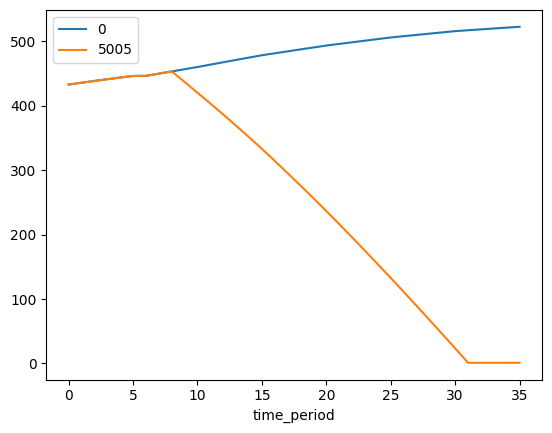

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR